# 1.) FASE DE EXPLORACIÓN Y ANÁLISIS DE LOS DATOS

## 1.1) IMPORTACIÓN DE LIBRERIAS

In [66]:
import pandas as pd
import numpy as np
import os
from IPython.display import display, Markdown

# Configuración de pandas para mejor visualización
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 50)

print("**Librerías importadas correctamente")

**Librerías importadas correctamente


## 1.2) CARGA Y VISUALIZACIÓN DE LA INFORMACIÓN (INPUTS)

In [67]:
display(Markdown("EXPLORACIÓN DE LOS INPUTS: 3 ARCHIVOS .CSV CON INFORMACIÓN DE OCURRENCIAS CLÍNICAS "))

display(Markdown("**existen diferencias en la estructura de los archivos:**"))

archivos = ['full_size/Antihipertensivos1.csv', 'full_size/Antihipertensivos2.csv', 'full_size/OtrosMedicamentos.csv']

for i, archivo in enumerate(archivos, 1):
    if os.path.exists(archivo):
        try:
            df = pd.read_csv(archivo, sep=';', encoding='latin-1', nrows=5)
            display(Markdown(f"#### {archivo}"))
            print(f"Número de columnas: {len(df.columns)}")
            print(f"Columnas: {list(df.columns)}")
            print(f"Primeros registros:")
            display(df.head(3))
            print("\n" + "─" * 100 + "\n")
        except Exception as e:
            print(f" Error leyendo {archivo}: {e}")
            print("\n" + "─" * 100 + "\n")
    else:
        print(f" {archivo} - No encontrado")
        print("\n" + "─" * 100 + "\n")

display(Markdown("**Como se puede observar, los nombres de columnas y la estructura de datos NO son consistentes entre los archivos, por lo que es necesario realizar un proceso de estandarización entre ellos.**"))

EXPLORACIÓN DE LOS INPUTS: 3 ARCHIVOS .CSV CON INFORMACIÓN DE OCURRENCIAS CLÍNICAS 

**existen diferencias en la estructura de los archivos:**

#### full_size/Antihipertensivos1.csv

Número de columnas: 24
Columnas: ['Secuencia', 'Documento', 'CodProced', 'Num_orden', 'Medicamento', 'Frecuencia', 'Dosis', 'Via', 'TTratamiento', 'Empresa', 'Cantidad', 'Item', 'Especialidad', 'NumProfe', 'MedicoOrdena', 'Nom1PAc', 'Nom2Pac', 'Apell1Pac', 'Apell2Pac', 'Fechnac', 'Sexo', 'Direcion', 'Tel', 'FechaOrden']
Primeros registros:


,Secuencia,Documento,CodProced,Num_orden,Medicamento,Frecuencia,Dosis,Via,TTratamiento,Empresa,Cantidad,Item,Especialidad,NumProfe,MedicoOrdena,Nom1PAc,Nom2Pac,Apell1Pac,Apell2Pac,Fechnac,Sexo,Direcion,Tel,FechaOrden
0,972520,3795432,C07AG021,1,CARVEDILOL 625 MG,Cada 12 HORAS,1 Unidad(es),ORAL,3 MES(ES),SALUD SOCIAL IPS,180,5,MEDICINA INTERNA,916,JOHON HERNANDEZ HERRERA,CARLOS,NaN,POLO,CABALLERO,13/9/1935,M,NaN,NaN,9/2/2018
1,976629,22499313,C07AG021,1,CARVEDILOL 625 MG,Cada 12 HORAS,1 Tabletas,ORAL,30 DIA(S),SALUD SOCIAL IPS,60,1,MEDICO DEL PROGRAMA,8,MARTHA LUZ ESCAMILLA CANO,OMAIRA,DEL ROSARIO,GARCIA,DE SARMIENTO,17/10/1950,F,CRA 15 7-92 3003318600,3.043808e+09,3/2/2018
2,976629,22499313,C07AG021,2,CARVEDILOL 625 MG,Cada 12 HORAS,1 Tabletas,ORAL,30 DIA(S),SALUD SOCIAL IPS,60,1,MEDICO DEL PROGRAMA,8,MARTHA LUZ ESCAMILLA CANO,OMAIRA,DEL ROSARIO,GARCIA,DE SARMIENTO,17/10/1950,F,CRA 15 7-92 3003318600,3.043808e+09,3/2/2018



────────────────────────────────────────────────────────────────────────────────────────────────────



#### full_size/Antihipertensivos2.csv

Número de columnas: 24
Columnas: ['Secuencia', 'Documento', 'CodProced', 'Num_orden', 'Medicamento', 'Frecuencia', 'Dosis', 'Via', 'TTratamiento', 'CANTIDAD', 'Observaciones', 'Item', 'Fecha_atencion', 'sede_id', 'lugar', 'num_formula', 'nombrepac', 'edad', 'telefono', 'sexo', 'direccion', 'empresa', 'dxppal', 'desdxppal']
Primeros registros:


,Secuencia,Documento,CodProced,Num_orden,Medicamento,Frecuencia,Dosis,Via,TTratamiento,CANTIDAD,Observaciones,Item,Fecha_atencion,sede_id,lugar,num_formula,nombrepac,edad,telefono,sexo,direccion,empresa,dxppal,desdxppal
0,967714,22412336,C07AM017162,1,METOPROLOL TARTRATO 100 MG TABLETA O GRAGEA,Cada 12 HORAS,1 Tabletas,ORAL,60 DIA(S),SALUD SOCIAL IPS,120,1,MEDICO DEL PROGRAMA,8,MARTHA LUZ ESCAMILLA CANO,MARTHA,CECILIA,FONNEGRA,DE JIMENEZ,00:00.0,F,CALLE 14 Nº 17B-127,3243402728,28/2/2018
1,973088,26925206,C07AM017161,1,METOPROLOL TARTRATO 50 MG TABLETA O GRAGEA,Cada 12 HORAS,1 Tabletas,ORAL,4 MES(ES),SALUD SOCIAL IPS,240,4,MEDICINA INTERNA,916,JOHON HERNANDEZ HERRERA,NELIA,ESTHER,ROMERO,DE BARRIOS,00:00.0,F,CR15DN 77-47 ALTO DE LOS ROBLES,3859621,9/2/2018
2,974953,3683668,C03AH00611,1,HIDROCLOROTIAZIDA 25 MG TABLETA,Cada DIARIA,1 Tabletas,ORAL,3 MES(ES),SALUD SOCIAL IPS,90,2,MEDICINA INTERNA,916,JOHON HERNANDEZ HERRERA,HUGO,ANTONIO,MENDOZA,MONTES,00:00.0,M,CR 3H 17G 54V/HERMOSA,3267328,5/2/2018



────────────────────────────────────────────────────────────────────────────────────────────────────



#### full_size/OtrosMedicamentos.csv

Número de columnas: 24
Columnas: ['Secuencia', 'Documento', 'CodProced', 'Num_orden', 'Medicamento', 'Frecuencia', 'Dosis', 'Via', 'TTratamiento', 'Empresa', 'Cantidad', 'Item', 'Especialidad', 'NumProfe', 'MedicoOrdena', 'Nom1PAc', 'Nom2Pac', 'Apell1Pac', 'Apell2Pac', 'Fechnac', 'Sexo', 'Direcion', 'Tel', 'FechaOrden']
Primeros registros:


,Secuencia,Documento,CodProced,Num_orden,Medicamento,Frecuencia,Dosis,Via,TTratamiento,Empresa,Cantidad,Item,Especialidad,NumProfe,MedicoOrdena,Nom1PAc,Nom2Pac,Apell1Pac,Apell2Pac,Fechnac,Sexo,Direcion,Tel,FechaOrden
0,967714,22412336,A02BO002101,1,OMEPRAZOL 20 MG CÁPSULA,Cada DIARIA,1 Tabletas,ORAL,60 DIA(S),SALUD SOCIAL IPS,60,3,MEDICO DEL PROGRAMA,8,MARTHA LUZ ESCAMILLA CANO,MARTHA,CECILIA,FONNEGRA,DE JIMENEZ,00:00.0,F,CALLE 14 Nº 17B-127,3243402728,28/2/2018 00:00
1,967714,22412336,A02AA018231,1,ALUMINIO HIDRÓXIDO + MAGNESIO HIDRÓXIDO CON O ...,Cada 8 HORAS,1 Unidad(es),ORAL,60 DIA(S),SALUD SOCIAL IPS,4,2,MEDICO DEL PROGRAMA,8,MARTHA LUZ ESCAMILLA CANO,MARTHA,CECILIA,FONNEGRA,DE JIMENEZ,00:00.0,F,CALLE 14 Nº 17B-127,3243402728,28/2/2018 00:00
2,967714,22412336,N02BA00311,1,ACETÍL SALICÍLICO ÁCIDO 100 MG TABLETA,Cada DIARIA,1 Tabletas,ORAL,60 DIA(S),SALUD SOCIAL IPS,60,5,MEDICO DEL PROGRAMA,8,MARTHA LUZ ESCAMILLA CANO,MARTHA,CECILIA,FONNEGRA,DE JIMENEZ,00:00.0,F,CALLE 14 Nº 17B-127,3243402728,28/2/2018 00:00



────────────────────────────────────────────────────────────────────────────────────────────────────



**Como se puede observar, los nombres de columnas y la estructura de datos NO son consistentes entre los archivos, por lo que es necesario realizar un proceso de estandarización entre ellos.**

# 2.) FASE DE ESTANDARIZACIÓN Y LIMPIEZA DE LOS INPUTS

## 2.1) CONFIGURACIÓN DEL MAPEO DE COLUMNAS

In [68]:
display(Markdown("CONFIGURACIÓN: MAPEO DE COLUMNAS POR ARCHIVO"))

# Diccionario principal de mapeo
mapeo_columnas = {
    'Antihipertensivos1.csv': {
        'Secuencia': 'Secuencia', 'Documento': 'Documento', 'CodProced': 'CodProced',
        'Num_orden': 'Num_orden', 'Medicamento': 'Medicamento', 'Frecuencia': 'Frecuencia',
        'Dosis': 'Dosis', 'Via': 'Via', 'TTratamiento': 'TTratamiento', 'Empresa': 'Empresa',
        'Cantidad': 'Cantidad', 'Item': 'Item', 'Especialidad': 'Especialidad',
        'NumProfe': 'NumProfe', 'MedicoOrdena': 'MedicoOrdena', 'Nom1PAc': 'Nom1Pac',
        'Nom2Pac': 'Nom2Pac', 'Apell1Pac': 'Apell1Pac', 'Apell2Pac': 'Apell2Pac',
        'Fechnac': 'Fechnac', 'Sexo': 'Sexo', 'Direcion': 'Direccion', 'Tel': 'Telefono',
        'FechaOrden': 'FechaOrden'
    },

    'Antihipertensivos2.csv': {
        'Secuencia': 'Secuencia', 'Documento': 'Documento', 'CodProced': 'CodProced',
        'Num_orden': 'Num_orden', 'Medicamento': 'Medicamento', 'Frecuencia': 'Frecuencia',
        'Dosis': 'Dosis', 'Via': 'Via', 'TTratamiento': 'TTratamiento', 'CANTIDAD': 'Cantidad',
        'Item': 'Item', 'nombrepac': 'Nom1Pac', 'sexo': 'Sexo', 'direccion': 'Direccion',
        'empresa': 'Empresa', 'Observaciones': None, 'Fecha_atencion': 'FechaOrden',
        'sede_id': None, 'lugar': None, 'num_formula': None, 'edad': None,
        'telefono': 'Telefono', 'dxppal': None, 'desdxppal': None
    },

    'OtrosMedicamentos.csv': {
        'Secuencia': 'Secuencia', 'Documento': 'Documento', 'CodProced': 'CodProced',
        'Num_orden': 'Num_orden', 'Medicamento': 'Medicamento', 'Frecuencia': 'Frecuencia',
        'Dosis': 'Dosis', 'Via': 'Via', 'TTratamiento': 'TTratamiento', 'Empresa': 'Empresa',
        'Cantidad': 'Cantidad', 'Item': 'Item', 'Especialidad': 'Especialidad',
        'NumProfe': 'NumProfe', 'MedicoOrdena': 'MedicoOrdena', 'Nom1PAc': 'Nom1Pac',
        'Nom2Pac': 'Nom2Pac', 'Apell1Pac': 'Apell1Pac', 'Apell2Pac': 'Apell2Pac',
        'Fechnac': 'Fechnac', 'Sexo': 'Sexo', 'Direcion': 'Direccion', 'Tel': 'Telefono',
        'FechaOrden': 'FechaOrden'
    }
}

# Columnas objetivo finales
columnas_objetivo = [
    'Secuencia', 'Documento', 'CodProced', 'Num_orden', 'Medicamento',
    'Frecuencia', 'Dosis', 'Via', 'TTratamiento', 'Empresa', 'Cantidad',
    'Item', 'Especialidad', 'NumProfe', 'MedicoOrdena', 'Nom1Pac',
    'Nom2Pac', 'Apell1Pac', 'Apell2Pac', 'Fechnac', 'Sexo', 'Direccion',
    'Telefono', 'FechaOrden'
]

print("** Mapeo de columnas configurado")
print(f"** Columnas objetivo: {len(columnas_objetivo)} columnas")

CONFIGURACIÓN: MAPEO DE COLUMNAS POR ARCHIVO

** Mapeo de columnas configurado
** Columnas objetivo: 24 columnas


## 2.1.1) FUNCIÓN PARA EL MAPEO Y REORGANIZACIÓN DE COLUMNAS Y DATOS EN EL ARCHIVO ANTIHIPERTENSIVOS2.CSV

In [69]:
display(Markdown("###  REORGANIZACIÓN DE COLUMNAS PARA ANTIHIPERTENSIVOS2.CSV"))

display(Markdown("**Problema identificado:** La información en Antihipertensivos2 está en columnas con nombres incorrectos que no coinciden con su contenido real.**"))
display(Markdown("**Solución:** Mapeo preciso que reubica cada dato en su columna correspondiente.**"))

def mapeo_inteligente_antihipertensivos2(df_original):
    """Mapeo especial CORREGIDO para Antihipertensivos2 que reorganiza las columnas problemáticas"""

    # Crear DataFrame con columnas objetivo (vacías inicialmente)
    df_estandarizado = pd.DataFrame(columns=columnas_objetivo)

    print("Iniciando mapeo inteligente corregido...")

    # MAPEO CORREGIDO - Basado en el análisis real del contenido
    mapeo_corregido = {
        # Columnas que SÍ coinciden correctamente
        'Secuencia': 'Secuencia',
        'Documento': 'Documento',
        'CodProced': 'CodProced',
        'Num_orden': 'Num_orden',
        'Medicamento': 'Medicamento',
        'Frecuencia': 'Frecuencia',
        'Dosis': 'Dosis',
        'Via': 'Via',
        'TTratamiento': 'TTratamiento',
        'Item': 'Item',

        # REASIGNACIONES CRÍTICAS - Información en columnas incorrectas
        'Observaciones': 'Cantidad',           # Observaciones → Cantidad (los números son las cantidades reales)
        'CANTIDAD': 'Empresa',                 # CANTIDAD → Empresa (contiene nombres de empresas)
        'Fecha_atencion': 'Especialidad',      # Fecha_atencion → Especialidad
        'sede_id': 'NumProfe',                 # sede_id → NumProfe
        'lugar': 'MedicoOrdena',               # lugar → MedicoOrdena
        'num_formula': 'Nom1Pac',              # num_formula → Nom1Pac
        'nombrepac': 'Nom2Pac',                # nombrepac → Nom2Pac
        'edad': 'Apell1Pac',                   # edad → Apell1Pac
        'telefono': 'Apell2Pac',               # telefono → Apell2Pac
        'direccion': 'Sexo',                   # direccion → Sexo
        'empresa': 'Direccion',                # empresa → Direccion
        'desdxppal': 'FechaOrden',             # desdxppal → FechaOrden

        # Columnas que no tienen equivalente o se descartan
        'dxppal': None,  # Sin equivalente
    }

    # Aplicar mapeo corregido
    columnas_mapeadas = []
    columnas_omitidas = []

    for col_orig, col_dest in mapeo_corregido.items():
        if col_orig in df_original.columns and col_dest is not None:
            if col_dest in columnas_objetivo:
                df_estandarizado[col_dest] = df_original[col_orig]
                columnas_mapeadas.append(f"{col_orig} → {col_dest}")
                print(f"  {col_orig} → {col_dest}")
            else:
                print(f"  {col_dest} no está en columnas objetivo")
        elif col_orig in df_original.columns and col_dest is None:
            columnas_omitidas.append(col_orig)
            print(f"   {col_orig} → OMITIDA")

    # VERIFICAR Y MOSTRAR RESULTADOS
    print(f"\n Resumen del mapeo:")
    print(f"  - Columnas mapeadas: {len(columnas_mapeadas)}")
    print(f"  - Columnas omitidas: {len(columnas_omitidas)}")

    # Mostrar columnas no procesadas
    columnas_procesadas = list(mapeo_corregido.keys())
    columnas_no_procesadas = [col for col in df_original.columns if col not in columnas_procesadas]

    if columnas_no_procesadas:
        print(f"\n  Columnas no procesadas (revisar):")
        for col in columnas_no_procesadas:
            sample_data = df_original[col].dropna().head(2).tolist() if col in df_original.columns else []
            print(f" {col}: {sample_data}")

    return df_estandarizado

# Aplicar el mapeo inteligente CORREGIDO a Antihipertensivos2
if os.path.exists('full_size/Antihipertensivos2.csv'):
    df_anti2_original = pd.read_csv('full_size/Antihipertensivos2.csv', sep=';', encoding='latin-1')

    display(Markdown("Antihipertensivos2 - ANTES de la reorganización:"))
    print("Columnas originales:", list(df_anti2_original.columns))
    print("Dimensiones:", df_anti2_original.shape)
    print("\nPrimeras 2 filas (mostrando contenido REAL):")
    display(df_anti2_original.head(2))

    display(Markdown("Aplicando mapeo inteligente CORREGIDO..."))
    df_anti2_estandarizado = mapeo_inteligente_antihipertensivos2(df_anti2_original)

    display(Markdown("DESPUÉS de la reorganización:"))
    print("Columnas estandarizadas:", list(df_anti2_estandarizado.columns))
    print("Dimensiones:", df_anti2_estandarizado.shape)
    print("\nPrimeras 2 filas (con información en columnas CORRECTAS):")
    display(df_anti2_estandarizado.head(2))

    # Verificar que tenemos las columnas críticas
    columnas_criticas = ['Cantidad', 'Empresa', 'Especialidad', 'MedicoOrdena', 'Nom1Pac', 'Nom2Pac']
    faltan_criticas = [col for col in columnas_criticas if col not in df_anti2_estandarizado.columns]

    if not faltan_criticas:
        print("Todas las columnas críticas fueron mapeadas correctamente")
    else:
        print(f"Columnas críticas faltantes: {faltan_criticas}")

display(Markdown("**Esta reorganización permite:**"))
display(Markdown("- **Reubicar exactamente** cada dato en su columna correspondiente"))
display(Markdown("- **Preservar toda la información valiosa** que estaba mal ubicada"))
display(Markdown("- **Mantener coherencia** con la estructura de Antihipertensivos1"))

###  REORGANIZACIÓN DE COLUMNAS PARA ANTIHIPERTENSIVOS2.CSV

**Problema identificado:** La información en Antihipertensivos2 está en columnas con nombres incorrectos que no coinciden con su contenido real.**

**Solución:** Mapeo preciso que reubica cada dato en su columna correspondiente.**

C:\Users\Alejandro\AppData\Local\Temp\ipykernel_25236\245838158.py:81: DtypeWarning: Columns (13,22) have mixed types. Specify dtype option on import or set low_memory=False.
  df_anti2_original = pd.read_csv('full_size/Antihipertensivos2.csv', sep=';', encoding='latin-1')


Antihipertensivos2 - ANTES de la reorganización:

Columnas originales: ['Secuencia', 'Documento', 'CodProced', 'Num_orden', 'Medicamento', 'Frecuencia', 'Dosis', 'Via', 'TTratamiento', 'CANTIDAD', 'Observaciones', 'Item', 'Fecha_atencion', 'sede_id', 'lugar', 'num_formula', 'nombrepac', 'edad', 'telefono', 'sexo', 'direccion', 'empresa', 'dxppal', 'desdxppal']
Dimensiones: (53339, 24)

Primeras 2 filas (mostrando contenido REAL):


,Secuencia,Documento,CodProced,Num_orden,Medicamento,Frecuencia,Dosis,Via,TTratamiento,CANTIDAD,Observaciones,Item,Fecha_atencion,sede_id,lugar,num_formula,nombrepac,edad,telefono,sexo,direccion,empresa,dxppal,desdxppal
0,967714,22412336.0,C07AM017162,1,METOPROLOL TARTRATO 100 MG TABLETA O GRAGEA,Cada 12 HORAS,1 Tabletas,ORAL,60 DIA(S),SALUD SOCIAL IPS,120.0,1,MEDICO DEL PROGRAMA,8,MARTHA LUZ ESCAMILLA CANO,MARTHA,CECILIA,FONNEGRA,DE JIMENEZ,00:00.0,F,CALLE 14 Nº 17B-127,3243402728,28/2/2018
1,973088,26925206.0,C07AM017161,1,METOPROLOL TARTRATO 50 MG TABLETA O GRAGEA,Cada 12 HORAS,1 Tabletas,ORAL,4 MES(ES),SALUD SOCIAL IPS,240.0,4,MEDICINA INTERNA,916,JOHON HERNANDEZ HERRERA,NELIA,ESTHER,ROMERO,DE BARRIOS,00:00.0,F,CR15DN 77-47 ALTO DE LOS ROBLES,3859621,9/2/2018


Aplicando mapeo inteligente CORREGIDO...

Iniciando mapeo inteligente corregido...
  Secuencia → Secuencia
  Documento → Documento
  CodProced → CodProced
  Num_orden → Num_orden
  Medicamento → Medicamento
  Frecuencia → Frecuencia
  Dosis → Dosis
  Via → Via
  TTratamiento → TTratamiento
  Item → Item
  Observaciones → Cantidad
  CANTIDAD → Empresa
  Fecha_atencion → Especialidad
  sede_id → NumProfe
  lugar → MedicoOrdena
  num_formula → Nom1Pac
  nombrepac → Nom2Pac
  edad → Apell1Pac
  telefono → Apell2Pac
  direccion → Sexo
  empresa → Direccion
  desdxppal → FechaOrden
   dxppal → OMITIDA

 Resumen del mapeo:
  - Columnas mapeadas: 22
  - Columnas omitidas: 1

  Columnas no procesadas (revisar):
 sexo: ['00:00.0', '00:00.0']


DESPUÉS de la reorganización:

Columnas estandarizadas: ['Secuencia', 'Documento', 'CodProced', 'Num_orden', 'Medicamento', 'Frecuencia', 'Dosis', 'Via', 'TTratamiento', 'Empresa', 'Cantidad', 'Item', 'Especialidad', 'NumProfe', 'MedicoOrdena', 'Nom1Pac', 'Nom2Pac', 'Apell1Pac', 'Apell2Pac', 'Fechnac', 'Sexo', 'Direccion', 'Telefono', 'FechaOrden']
Dimensiones: (53339, 24)

Primeras 2 filas (con información en columnas CORRECTAS):


,Secuencia,Documento,CodProced,Num_orden,Medicamento,Frecuencia,Dosis,Via,TTratamiento,Empresa,Cantidad,Item,Especialidad,NumProfe,MedicoOrdena,Nom1Pac,Nom2Pac,Apell1Pac,Apell2Pac,Fechnac,Sexo,Direccion,Telefono,FechaOrden
0,967714,22412336.0,C07AM017162,1,METOPROLOL TARTRATO 100 MG TABLETA O GRAGEA,Cada 12 HORAS,1 Tabletas,ORAL,60 DIA(S),SALUD SOCIAL IPS,120.0,1,MEDICO DEL PROGRAMA,8,MARTHA LUZ ESCAMILLA CANO,MARTHA,CECILIA,FONNEGRA,DE JIMENEZ,NaN,F,CALLE 14 Nº 17B-127,NaN,28/2/2018
1,973088,26925206.0,C07AM017161,1,METOPROLOL TARTRATO 50 MG TABLETA O GRAGEA,Cada 12 HORAS,1 Tabletas,ORAL,4 MES(ES),SALUD SOCIAL IPS,240.0,4,MEDICINA INTERNA,916,JOHON HERNANDEZ HERRERA,NELIA,ESTHER,ROMERO,DE BARRIOS,NaN,F,CR15DN 77-47 ALTO DE LOS ROBLES,NaN,9/2/2018


Todas las columnas críticas fueron mapeadas correctamente


**Esta reorganización permite:**

- **Reubicar exactamente** cada dato en su columna correspondiente

- **Preservar toda la información valiosa** que estaba mal ubicada

- **Mantener coherencia** con la estructura de Antihipertensivos1

## 2.1.2) FUNCIÓN PARA EL MAPEO DE COLUMNAS DE LOS INPUTS RESTANTES

In [70]:
display(Markdown("FUNCIÓN PARA EL PROCESAMIENTO DE LOS INPUTS Y EL MAPEO DE SUS COLUMNAS"))

def procesar_archivo(nombre_archivo, mapeo_especifico):
    """Procesa un archivo individual aplicando el mapeo de columnas"""
    print(f"\n--- Procesando {nombre_archivo} ---")

    if not os.path.exists(nombre_archivo):
        print(f"Archivo {nombre_archivo} no encontrado")
        return None

    try:
        # Cargar archivo
        df = pd.read_csv(nombre_archivo, sep=';', encoding='latin-1')
        print(f"Archivo cargado: {len(df)} registros, {len(df.columns)} columnas")
        print(f"Columnas originales: {list(df.columns)}")

        # Crear nuevo DataFrame con columnas objetivo
        df_estandarizado = pd.DataFrame(columns=columnas_objetivo)

        # Mapear columnas existentes
        columnas_mapeadas = []
        columnas_omitidas = []

        for col_original, col_destino in mapeo_especifico.items():
            if col_original in df.columns and col_destino is not None:
                if col_destino in columnas_objetivo:
                    df_estandarizado[col_destino] = df[col_original]
                    columnas_mapeadas.append(f"{col_original} → {col_destino}")
                else:
                    print(f"{col_destino} no está en columnas objetivo")
            elif col_original in df.columns and col_destino is None:
                columnas_omitidas.append(col_original)

        # Verificar columnas no mapeadas
        columnas_no_mapeadas = [col for col in df.columns if col not in mapeo_especifico]

        # Mostrar resumen del mapeo
        if columnas_mapeadas:
            print("Columnas mapeadas:")
            for mapeo in columnas_mapeadas:
                print(f"{mapeo}")

        if columnas_omitidas:
            print(" Columnas omitidas (sin equivalente):")
            for col in columnas_omitidas:
                print(f" {col}")

        if columnas_no_mapeadas:
            print(" Columnas no mapeadas en el diccionario:")
            for col in columnas_no_mapeadas:
                print(f"{col}")

        print(f"Estandarización completada: {len(df_estandarizado)} registros, {len(df_estandarizado.columns)} columnas")
        return df_estandarizado

    except Exception as e:
        print(f" Error procesando {nombre_archivo}: {str(e)}")
        return None

print("Función de procesamiento definida")

FUNCIÓN PARA EL PROCESAMIENTO DE LOS INPUTS Y EL MAPEO DE SUS COLUMNAS

Función de procesamiento definida


## 2.3 INSPECCIÓN DEL NÚMERO DE COLUMNAS POR ARCHIVO .CSV (DIRTY INPUTS)

In [71]:
display(Markdown("EXPLORACIÓN: ARCHIVOS ORIGINALES"))

archivos_originales = ['full_size/Antihipertensivos1.csv', 'full_size/Antihipertensivos2.csv', 'full_size/OtrosMedicamentos.csv']

for archivo in archivos_originales:
    if os.path.exists(archivo):
        try:
            df_temp = pd.read_csv(archivo, sep=';', encoding='latin-1', nrows=2)
            display(Markdown(f"**{archivo}** - {len(df_temp.columns)} columnas, {len(df_temp)} registros (muestra)"))
            display(df_temp.head(2))
            print("\n" + "="*50 + "\n")
        except Exception as e:
            print(f"Error leyendo {archivo}: {e}")
    else:
        print(f"{archivo} - No encontrado")

EXPLORACIÓN: ARCHIVOS ORIGINALES

**full_size/Antihipertensivos1.csv** - 24 columnas, 2 registros (muestra)

,Secuencia,Documento,CodProced,Num_orden,Medicamento,Frecuencia,Dosis,Via,TTratamiento,Empresa,Cantidad,Item,Especialidad,NumProfe,MedicoOrdena,Nom1PAc,Nom2Pac,Apell1Pac,Apell2Pac,Fechnac,Sexo,Direcion,Tel,FechaOrden
0,972520,3795432,C07AG021,1,CARVEDILOL 625 MG,Cada 12 HORAS,1 Unidad(es),ORAL,3 MES(ES),SALUD SOCIAL IPS,180,5,MEDICINA INTERNA,916,JOHON HERNANDEZ HERRERA,CARLOS,NaN,POLO,CABALLERO,13/9/1935,M,NaN,NaN,9/2/2018
1,976629,22499313,C07AG021,1,CARVEDILOL 625 MG,Cada 12 HORAS,1 Tabletas,ORAL,30 DIA(S),SALUD SOCIAL IPS,60,1,MEDICO DEL PROGRAMA,8,MARTHA LUZ ESCAMILLA CANO,OMAIRA,DEL ROSARIO,GARCIA,DE SARMIENTO,17/10/1950,F,CRA 15 7-92 3003318600,3.043808e+09,3/2/2018


**full_size/Antihipertensivos2.csv** - 24 columnas, 2 registros (muestra)

,Secuencia,Documento,CodProced,Num_orden,Medicamento,Frecuencia,Dosis,Via,TTratamiento,CANTIDAD,Observaciones,Item,Fecha_atencion,sede_id,lugar,num_formula,nombrepac,edad,telefono,sexo,direccion,empresa,dxppal,desdxppal
0,967714,22412336,C07AM017162,1,METOPROLOL TARTRATO 100 MG TABLETA O GRAGEA,Cada 12 HORAS,1 Tabletas,ORAL,60 DIA(S),SALUD SOCIAL IPS,120,1,MEDICO DEL PROGRAMA,8,MARTHA LUZ ESCAMILLA CANO,MARTHA,CECILIA,FONNEGRA,DE JIMENEZ,00:00.0,F,CALLE 14 Nº 17B-127,3243402728,28/2/2018
1,973088,26925206,C07AM017161,1,METOPROLOL TARTRATO 50 MG TABLETA O GRAGEA,Cada 12 HORAS,1 Tabletas,ORAL,4 MES(ES),SALUD SOCIAL IPS,240,4,MEDICINA INTERNA,916,JOHON HERNANDEZ HERRERA,NELIA,ESTHER,ROMERO,DE BARRIOS,00:00.0,F,CR15DN 77-47 ALTO DE LOS ROBLES,3859621,9/2/2018


**full_size/OtrosMedicamentos.csv** - 24 columnas, 2 registros (muestra)

,Secuencia,Documento,CodProced,Num_orden,Medicamento,Frecuencia,Dosis,Via,TTratamiento,Empresa,Cantidad,Item,Especialidad,NumProfe,MedicoOrdena,Nom1PAc,Nom2Pac,Apell1Pac,Apell2Pac,Fechnac,Sexo,Direcion,Tel,FechaOrden
0,967714,22412336,A02BO002101,1,OMEPRAZOL 20 MG CÁPSULA,Cada DIARIA,1 Tabletas,ORAL,60 DIA(S),SALUD SOCIAL IPS,60,3,MEDICO DEL PROGRAMA,8,MARTHA LUZ ESCAMILLA CANO,MARTHA,CECILIA,FONNEGRA,DE JIMENEZ,00:00.0,F,CALLE 14 Nº 17B-127,3243402728,28/2/2018 00:00
1,967714,22412336,A02AA018231,1,ALUMINIO HIDRÓXIDO + MAGNESIO HIDRÓXIDO CON O ...,Cada 8 HORAS,1 Unidad(es),ORAL,60 DIA(S),SALUD SOCIAL IPS,4,2,MEDICO DEL PROGRAMA,8,MARTHA LUZ ESCAMILLA CANO,MARTHA,CECILIA,FONNEGRA,DE JIMENEZ,00:00.0,F,CALLE 14 Nº 17B-127,3243402728,28/2/2018 00:00


## 2.4 APLICACIÓN DEL MAPEO DE COLUMNAS POR ARCHIVO (ESTANDARIZACIÓN DE COLUMNAS)

In [72]:
display(Markdown("PROCESAMIENTO: ESTANDARIZACIÓN DE COLUMNAS POR ARCHIVO"))

archivos_procesados = {}

# Procesar Antihipertensivos1
display(Markdown("Antihipertensivos1.csv"))
df1 = procesar_archivo('full_size/Antihipertensivos1.csv', mapeo_columnas['Antihipertensivos1.csv'])
if df1 is not None:
    archivos_procesados['Antihipertensivos1_estandarizado.csv'] = df1

# Procesar Antihipertensivos2 CON MAPEO INTELIGENTE CORREGIDO
display(Markdown("Antihipertensivos2.csv (con mapeo inteligente CORREGIDO)"))
if os.path.exists('full_size/Antihipertensivos2.csv'):
    df_anti2_original = pd.read_csv('full_size/Antihipertensivos2.csv', sep=';', encoding='latin-1')
    df2 = mapeo_inteligente_antihipertensivos2(df_anti2_original)
    if df2 is not None:
        archivos_procesados['Antihipertensivos2_estandarizado.csv'] = df2
        print("Antihipertensivos2 procesado con mapeo inteligente CORREGIDO")
else:
    print("Archivo Antihipertensivos2.csv no encontrado")

# Procesar OtrosMedicamentos
display(Markdown("OtrosMedicamentos.csv"))
df3 = procesar_archivo('full_size/OtrosMedicamentos.csv', mapeo_columnas['OtrosMedicamentos.csv'])
if df3 is not None:
    archivos_procesados['OtrosMedicamentos_estandarizado.csv'] = df3

print(f"\nTotal de archivos procesados: {len(archivos_procesados)}")

PROCESAMIENTO: ESTANDARIZACIÓN DE COLUMNAS POR ARCHIVO

Antihipertensivos1.csv


--- Procesando full_size/Antihipertensivos1.csv ---
Archivo cargado: 177501 registros, 24 columnas
Columnas originales: ['Secuencia', 'Documento', 'CodProced', 'Num_orden', 'Medicamento', 'Frecuencia', 'Dosis', 'Via', 'TTratamiento', 'Empresa', 'Cantidad', 'Item', 'Especialidad', 'NumProfe', 'MedicoOrdena', 'Nom1PAc', 'Nom2Pac', 'Apell1Pac', 'Apell2Pac', 'Fechnac', 'Sexo', 'Direcion', 'Tel', 'FechaOrden']
Columnas mapeadas:
Secuencia → Secuencia
Documento → Documento
CodProced → CodProced
Num_orden → Num_orden
Medicamento → Medicamento
Frecuencia → Frecuencia
Dosis → Dosis
Via → Via
TTratamiento → TTratamiento
Empresa → Empresa
Cantidad → Cantidad
Item → Item
Especialidad → Especialidad
NumProfe → NumProfe
MedicoOrdena → MedicoOrdena
Nom1PAc → Nom1Pac
Nom2Pac → Nom2Pac
Apell1Pac → Apell1Pac
Apell2Pac → Apell2Pac
Fechnac → Fechnac
Sexo → Sexo
Direcion → Direccion
Tel → Telefono
FechaOrden → FechaOrden
Estandarización completada: 177501 registros, 24 columnas


C:\Users\Alejandro\AppData\Local\Temp\ipykernel_25236\2275428057.py:13: DtypeWarning: Columns (13,22) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(nombre_archivo, sep=';', encoding='latin-1')


Antihipertensivos2.csv (con mapeo inteligente CORREGIDO)

Iniciando mapeo inteligente corregido...
  Secuencia → Secuencia
  Documento → Documento
  CodProced → CodProced
  Num_orden → Num_orden
  Medicamento → Medicamento
  Frecuencia → Frecuencia
  Dosis → Dosis
  Via → Via
  TTratamiento → TTratamiento
  Item → Item
  Observaciones → Cantidad
  CANTIDAD → Empresa
  Fecha_atencion → Especialidad
  sede_id → NumProfe
  lugar → MedicoOrdena
  num_formula → Nom1Pac
  nombrepac → Nom2Pac
  edad → Apell1Pac
  telefono → Apell2Pac
  direccion → Sexo
  empresa → Direccion
  desdxppal → FechaOrden
   dxppal → OMITIDA

 Resumen del mapeo:
  - Columnas mapeadas: 22
  - Columnas omitidas: 1

  Columnas no procesadas (revisar):
 sexo: ['00:00.0', '00:00.0']
Antihipertensivos2 procesado con mapeo inteligente CORREGIDO


C:\Users\Alejandro\AppData\Local\Temp\ipykernel_25236\3049096058.py:14: DtypeWarning: Columns (13,22) have mixed types. Specify dtype option on import or set low_memory=False.
  df_anti2_original = pd.read_csv('full_size/Antihipertensivos2.csv', sep=';', encoding='latin-1')


OtrosMedicamentos.csv


--- Procesando full_size/OtrosMedicamentos.csv ---


C:\Users\Alejandro\AppData\Local\Temp\ipykernel_25236\2275428057.py:13: DtypeWarning: Columns (13,22) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(nombre_archivo, sep=';', encoding='latin-1')


Archivo cargado: 789184 registros, 24 columnas
Columnas originales: ['Secuencia', 'Documento', 'CodProced', 'Num_orden', 'Medicamento', 'Frecuencia', 'Dosis', 'Via', 'TTratamiento', 'Empresa', 'Cantidad', 'Item', 'Especialidad', 'NumProfe', 'MedicoOrdena', 'Nom1PAc', 'Nom2Pac', 'Apell1Pac', 'Apell2Pac', 'Fechnac', 'Sexo', 'Direcion', 'Tel', 'FechaOrden']
Columnas mapeadas:
Secuencia → Secuencia
Documento → Documento
CodProced → CodProced
Num_orden → Num_orden
Medicamento → Medicamento
Frecuencia → Frecuencia
Dosis → Dosis
Via → Via
TTratamiento → TTratamiento
Empresa → Empresa
Cantidad → Cantidad
Item → Item
Especialidad → Especialidad
NumProfe → NumProfe
MedicoOrdena → MedicoOrdena
Nom1PAc → Nom1Pac
Nom2Pac → Nom2Pac
Apell1Pac → Apell1Pac
Apell2Pac → Apell2Pac
Fechnac → Fechnac
Sexo → Sexo
Direcion → Direccion
Tel → Telefono
FechaOrden → FechaOrden
Estandarización completada: 789184 registros, 24 columnas

Total de archivos procesados: 3


## 2.5) ESTANDARIZACIÓN DE NOMBRES DE COLUMNAS A SNAKE_CASE

In [73]:
display(Markdown("CONVERSIÓN: COLUMNAS A SNAKE_CASE"))

display(Markdown("**Convirtiendo todos los nombres de columnas a snake_case en minúsculas...**"))

# Diccionario de mapeo a snake_case basado en el ejemplo proporcionado
mapeo_snake_case = {
    'Secuencia': 'secuencia',
    'Documento': 'documento',
    'CodProced': 'cod_proced',
    'Num_orden': 'num_orden',
    'Medicamento': 'medicamento',
    'Frecuencia': 'frecuencia',
    'Dosis': 'dosis',
    'Via': 'via',
    'TTratamiento': 'duracion_tratamiento',
    'Empresa': 'empresa',
    'Cantidad': 'cantidad',
    'Item': 'item',
    'Especialidad': 'especialidad',
    'NumProfe': 'num_prof',
    'MedicoOrdena': 'medico_ordena',
    'Nom1Pac': 'nombre1_pac',
    'Nom2Pac': 'nombre2_pac',
    'Apell1Pac': 'apll1_pac',
    'Apell2Pac': 'apll2_pac',
    'Fechnac': 'fecha_nac',
    'Sexo': 'sexo',
    'Direccion': 'direccion',
    'Telefono': 'telefono',
    'FechaOrden': 'fecha_orden'
}

def convertir_a_snake_case(df):
    """Convierte los nombres de columnas del DataFrame a snake_case"""
    print("Aplicando snake_case a las columnas...")

    # Crear una copia para no modificar el original
    df_snake = df.copy()

    # Renombrar columnas según el mapeo
    columnas_renombradas = []
    for col_original in df_snake.columns:
        if col_original in mapeo_snake_case:
            nuevo_nombre = mapeo_snake_case[col_original]
            df_snake.rename(columns={col_original: nuevo_nombre}, inplace=True)
            columnas_renombradas.append(f"{col_original} → {nuevo_nombre}")
        else:
            # Si no está en el mapeo, convertir a snake_case automáticamente
            nuevo_nombre = col_original.lower().replace(' ', '_')
            df_snake.rename(columns={col_original: nuevo_nombre}, inplace=True)
            columnas_renombradas.append(f"{col_original} → {nuevo_nombre}")

    # Mostrar los cambios
    if columnas_renombradas:
        print("Columnas renombradas:")
        for cambio in columnas_renombradas:
            print(f"{cambio}")

    print(f"Columnas finales: {list(df_snake.columns)}")
    return df_snake

# Aplicar snake_case a todos los archivos procesados
archivos_snake_case = {}

for nombre_archivo, df in archivos_procesados.items():
    display(Markdown(f"Convertiendo: {nombre_archivo}"))
    df_snake = convertir_a_snake_case(df)
    archivos_snake_case[nombre_archivo] = df_snake

# Reemplazar los archivos procesados con los que tienen snake_case
archivos_procesados = archivos_snake_case

print("\nTodas las columnas han sido convertidas a snake_case en minúsculas")

CONVERSIÓN: COLUMNAS A SNAKE_CASE

**Convirtiendo todos los nombres de columnas a snake_case en minúsculas...**

Convertiendo: Antihipertensivos1_estandarizado.csv

Aplicando snake_case a las columnas...
Columnas renombradas:
Secuencia → secuencia
Documento → documento
CodProced → cod_proced
Num_orden → num_orden
Medicamento → medicamento
Frecuencia → frecuencia
Dosis → dosis
Via → via
TTratamiento → duracion_tratamiento
Empresa → empresa
Cantidad → cantidad
Item → item
Especialidad → especialidad
NumProfe → num_prof
MedicoOrdena → medico_ordena
Nom1Pac → nombre1_pac
Nom2Pac → nombre2_pac
Apell1Pac → apll1_pac
Apell2Pac → apll2_pac
Fechnac → fecha_nac
Sexo → sexo
Direccion → direccion
Telefono → telefono
FechaOrden → fecha_orden
Columnas finales: ['secuencia', 'documento', 'cod_proced', 'num_orden', 'medicamento', 'frecuencia', 'dosis', 'via', 'duracion_tratamiento', 'empresa', 'cantidad', 'item', 'especialidad', 'num_prof', 'medico_ordena', 'nombre1_pac', 'nombre2_pac', 'apll1_pac', 'apll2_pac', 'fecha_nac', 'sexo', 'direccion', 'telefono', 'fecha_orden']


Convertiendo: Antihipertensivos2_estandarizado.csv

Aplicando snake_case a las columnas...
Columnas renombradas:
Secuencia → secuencia
Documento → documento
CodProced → cod_proced
Num_orden → num_orden
Medicamento → medicamento
Frecuencia → frecuencia
Dosis → dosis
Via → via
TTratamiento → duracion_tratamiento
Empresa → empresa
Cantidad → cantidad
Item → item
Especialidad → especialidad
NumProfe → num_prof
MedicoOrdena → medico_ordena
Nom1Pac → nombre1_pac
Nom2Pac → nombre2_pac
Apell1Pac → apll1_pac
Apell2Pac → apll2_pac
Fechnac → fecha_nac
Sexo → sexo
Direccion → direccion
Telefono → telefono
FechaOrden → fecha_orden
Columnas finales: ['secuencia', 'documento', 'cod_proced', 'num_orden', 'medicamento', 'frecuencia', 'dosis', 'via', 'duracion_tratamiento', 'empresa', 'cantidad', 'item', 'especialidad', 'num_prof', 'medico_ordena', 'nombre1_pac', 'nombre2_pac', 'apll1_pac', 'apll2_pac', 'fecha_nac', 'sexo', 'direccion', 'telefono', 'fecha_orden']


Convertiendo: OtrosMedicamentos_estandarizado.csv

Aplicando snake_case a las columnas...
Columnas renombradas:
Secuencia → secuencia
Documento → documento
CodProced → cod_proced
Num_orden → num_orden
Medicamento → medicamento
Frecuencia → frecuencia
Dosis → dosis
Via → via
TTratamiento → duracion_tratamiento
Empresa → empresa
Cantidad → cantidad
Item → item
Especialidad → especialidad
NumProfe → num_prof
MedicoOrdena → medico_ordena
Nom1Pac → nombre1_pac
Nom2Pac → nombre2_pac
Apell1Pac → apll1_pac
Apell2Pac → apll2_pac
Fechnac → fecha_nac
Sexo → sexo
Direccion → direccion
Telefono → telefono
FechaOrden → fecha_orden
Columnas finales: ['secuencia', 'documento', 'cod_proced', 'num_orden', 'medicamento', 'frecuencia', 'dosis', 'via', 'duracion_tratamiento', 'empresa', 'cantidad', 'item', 'especialidad', 'num_prof', 'medico_ordena', 'nombre1_pac', 'nombre2_pac', 'apll1_pac', 'apll2_pac', 'fecha_nac', 'sexo', 'direccion', 'telefono', 'fecha_orden']

Todas las columnas han sido convertidas a snake_case en minúsculas


## 2.6) NORMALIZACIÓN DE CAMPOS DE INTERÉS (PFN)

## 2.6.1) VISUALIZACIÓN DE LOS DATOS DE LOS ARCHIVOS ESTANDARIZADOS (INPUTS)

In [74]:
display(Markdown("EXPLORACIÓN: ARCHIVOS ORIGINALES"))

archivos_estandarizados = ['Antihipertensivos1_estandarizado.csv', 'Antihipertensivos2_estandarizado.csv', 'OtrosMedicamentos_estandarizado.csv']

for archivo in archivos_estandarizados:
    if os.path.exists(archivo):
        try:
            df_temp = pd.read_csv(archivo, sep=';', encoding='latin-1', nrows=2)
            display(Markdown(f"**{archivo}** - {len(df_temp.columns)} columnas, {len(df_temp)} registros (muestra)"))
            display(df_temp.head(2))
            print("\n" + "="*50 + "\n")
        except Exception as e:
            print(f"Error leyendo {archivo}: {e}")
    else:
        print(f"{archivo} - No encontrado")

EXPLORACIÓN: ARCHIVOS ORIGINALES

Antihipertensivos1_estandarizado.csv - No encontrado
Antihipertensivos2_estandarizado.csv - No encontrado
OtrosMedicamentos_estandarizado.csv - No encontrado


## 2.6.2) NORMALIZACIÓN APLICADA AL CAMPO "MEDICAMENTO"

In [75]:
display(Markdown("NORMALIZACIÓN: CAMPO 'MEDICAMENTO' - PRIMERA FORMA NORMAL"))

display(Markdown("**Problemas identificados en el campo 'medicamento':**"))
display(Markdown("1. **Múltiples medicamentos en una sola celda** (separados por '+')"))
display(Markdown("2. **Información de dosis mezclada con nombre del medicamento**"))
display(Markdown("3. **Texto descriptivo innecesario** (formas farmacéuticas)"))

def normalizar_campo_medicamento(df):
    """
    Normaliza el campo 'medicamento' aplicando la primera forma normal:
    - Separa múltiples medicamentos en filas individuales
    - Extrae la dosis a columna separada 'cantidad_mg'
    - Limpia nombres de medicamentos
    """

    print("  Iniciando normalización del campo 'medicamento'...")

    # Crear copia del DataFrame para no modificar el original
    df_normalizado = df.copy()

    # Paso 1: Separar múltiples medicamentos en filas individuales
    print("  Paso 1: Separando medicamentos combinados...")

    # Función para separar medicamentos combinados
    def separar_medicamentos(fila):
        medicamento = str(fila['medicamento'])

        # Verificar si hay múltiples medicamentos separados por '+'
        if '+' in medicamento:
            medicamentos_separados = [med.strip() for med in medicamento.split('+')]

            # Crear una fila por cada medicamento
            filas_separadas = []
            for med in medicamentos_separados:
                nueva_fila = fila.copy()
                nueva_fila['medicamento'] = med
                filas_separadas.append(nueva_fila)

            return filas_separadas
        else:
            return [fila]

    # Aplicar separación de medicamentos
    filas_expandidas = []
    for _, fila in df_normalizado.iterrows():
        filas_expandidas.extend(separar_medicamentos(fila))

    df_normalizado = pd.DataFrame(filas_expandidas).reset_index(drop=True)
    print(f"     Medicamentos separados: {len(df_normalizado)} registros después de la expansión")

    # Paso 2: Extraer dosis a columna separada y limpiar nombres
    print("  Paso 2: Extrayendo dosis y limpiando nombres...")

    def extraer_dosis_y_limpiar(medicamento_str):
        """
        Extrae la dosis en mg y limpia el nombre del medicamento
        """
        import re

        medicamento_original = str(medicamento_str)

        # Patrones para extraer dosis
        patrones_dosis = [
            r'(\d+\.?\d*)\s*MG',  # 25 MG, 12.5 MG
            r'(\d+\.?\d*)MG',     # 25MG, 12.5MG
            r'(\d+\.?\d*)\s*mg',  # 25 mg, 12.5 mg
            r'(\d+\.?\d*)mg'      # 25mg, 12.5mg
        ]

        dosis = None
        medicamento_limpio = medicamento_original

        # Buscar y extraer dosis
        for patron in patrones_dosis:
            match = re.search(patron, medicamento_limpio)
            if match:
                dosis = float(match.group(1))
                # Remover la dosis del nombre del medicamento
                medicamento_limpio = re.sub(patron, '', medicamento_limpio).strip()
                break

        # Limpiar texto descriptivo innecesario
        textos_a_remover = [
            'TABLETA', 'TABLETA RECUBIERTA', 'GRAGEA', 'COMPRIMIDO', 'CAPSULA', 'CÁPSULA',
            'TAB', 'COMP', 'CAP', 'RECUBIERTA', 'LIBERACIÓN PROLONGADA', 'LIBERACION PROLONGADA',
            'DE LIBERACIÓN PROLONGADA', 'DE LIBERACION PROLONGADA', 'LIBERACIÓN SOSTENIDA',
            'ORAL', 'INYECTABLE', 'SOLUCIÓN', 'SUSPENSIÓN', 'JARABE', 'CREMA', 'GEL',
            'MG', 'MG/', '/MG', 'MG\\', '\\MG'
        ]

        for texto in textos_a_remover:
            # Remover el texto exacto (case insensitive)
            medicamento_limpio = re.sub(r'\b' + re.escape(texto) + r'\b', '', medicamento_limpio, flags=re.IGNORECASE)

        # Limpiar caracteres especiales y espacios múltiples
        medicamento_limpio = re.sub(r'[\.\,]\s*$', '', medicamento_limpio)  # Puntos y comas al final
        medicamento_limpio = re.sub(r'\s+', ' ', medicamento_limpio).strip()  # Espacios múltiples
        medicamento_limpio = re.sub(r'^\s*\.\s*', '', medicamento_limpio)  # Puntos al inicio
        medicamento_limpio = re.sub(r'\s*\.\s*$', '', medicamento_limpio)  # Puntos al final

        # Corregir nombres comunes de medicamentos
        correcciones_nombres = {
            'LOSARTAN.': 'LOSARTAN',
            'ENALAPRIL MALEATO': 'ENALAPRIL',
            'METOPROLOL TARTRATO': 'METOPROLOL',
            'IRBESARTAN - AMLODIPINO': 'IRBESARTAN/AMLODIPINO',
            'VALSARTAN + AMLODIPINO + HIDROCLOROTIAZIDA': 'VALSARTAN/AMLODIPINO/HIDROCLOROTIAZIDA'
        }

        for incorrecto, correcto in correcciones_nombres.items():
            if incorrecto in medicamento_limpio.upper():
                medicamento_limpio = correcto

        return medicamento_limpio, dosis

    # Aplicar extracción de dosis y limpieza
    resultados = df_normalizado['medicamento'].apply(extraer_dosis_y_limpiar)
    df_normalizado['medicamento_limpio'] = [r[0] for r in resultados]
    df_normalizado['cantidad_mg'] = [r[1] for r in resultados]

    # Reemplazar la columna original con la limpia
    df_normalizado['medicamento'] = df_normalizado['medicamento_limpio']
    df_normalizado = df_normalizado.drop('medicamento_limpio', axis=1)

    print("  Paso 3: Verificando resultados...")

    # Mostrar ejemplos de antes y después
    display(Markdown("####   Ejemplos de transformación:"))
    ejemplos = df_normalizado[['medicamento', 'cantidad_mg']].head(10)

    # Comparar con originales (tomar primeros 10 del original para comparar)
    if len(df) >= 10:
        originales = df['medicamento'].head(10)
        comparacion = pd.DataFrame({
            'ANTES': originales,
            'DESPUÉS': ejemplos['medicamento'],
            'CANTIDAD_MG': ejemplos['cantidad_mg']
        })
        display(comparacion)

    # Estadísticas de la transformación
    medicamentos_unicos_antes = df['medicamento'].nunique()
    medicamentos_unicos_despues = df_normalizado['medicamento'].nunique()

    registros_con_dosis = df_normalizado['cantidad_mg'].notna().sum()
    porcentaje_con_dosis = (registros_con_dosis / len(df_normalizado)) * 100

    print(f"\n  Estadísticas de la normalización:")
    print(f"   • Registros totales: {len(df_normalizado)}")
    print(f"   • Medicamentos únicos (antes): {medicamentos_unicos_antes}")
    print(f"   • Medicamentos únicos (después): {medicamentos_unicos_despues}")
    print(f"   • Registros con dosis extraída: {registros_con_dosis} ({porcentaje_con_dosis:.1f}%)")

    # Mostrar distribución de dosis
    if registros_con_dosis > 0:
        dosis_stats = df_normalizado['cantidad_mg'].describe()
        print(f"   • Dosis mínima: {dosis_stats['min']} mg")
        print(f"   • Dosis máxima: {dosis_stats['max']} mg")
        print(f"   • Dosis promedio: {dosis_stats['mean']:.1f} mg")

    return df_normalizado

# Aplicar normalización a todos los archivos procesados
print("  Aplicando normalización a todos los archivos...")

archivos_normalizados = {}

for nombre_archivo, df in archivos_procesados.items():
    display(Markdown(f"     Normalizando: {nombre_archivo}"))

    # Aplicar normalización
    df_normalizado = normalizar_campo_medicamento(df)
    archivos_normalizados[nombre_archivo] = df_normalizado

    # Mostrar resumen rápido
    medicamentos_unicos = df_normalizado['medicamento'].nunique()
    print(f"  {nombre_archivo}: {medicamentos_unicos} medicamentos únicos después de normalización")

# Reemplazar los archivos procesados con los normalizados
archivos_procesados = archivos_normalizados

display(Markdown("**  Resultados de la normalización:**"))
display(Markdown("- **Cada medicamento en su propia fila** (primera forma normal)"))
display(Markdown("- **Dosis extraída a columna separada** 'cantidad_mg'"))
display(Markdown("- **Nombres de medicamentos limpios y estandarizados**"))
display(Markdown("- **Estructura lista para análisis de ML**"))

print("\n  Normalización del campo 'medicamento' completada exitosamente")

NORMALIZACIÓN: CAMPO 'MEDICAMENTO' - PRIMERA FORMA NORMAL

**Problemas identificados en el campo 'medicamento':**

1. **Múltiples medicamentos en una sola celda** (separados por '+')

2. **Información de dosis mezclada con nombre del medicamento**

3. **Texto descriptivo innecesario** (formas farmacéuticas)

  Aplicando normalización a todos los archivos...


     Normalizando: Antihipertensivos1_estandarizado.csv

  Iniciando normalización del campo 'medicamento'...
  Paso 1: Separando medicamentos combinados...
     Medicamentos separados: 177552 registros después de la expansión
  Paso 2: Extrayendo dosis y limpiando nombres...
  Paso 3: Verificando resultados...


####   Ejemplos de transformación:

,ANTES,DESPUÉS,CANTIDAD_MG
0,CARVEDILOL 625 MG,CARVEDILOL,625.0
1,CARVEDILOL 625 MG,CARVEDILOL,625.0
2,CARVEDILOL 625 MG,CARVEDILOL,625.0
3,CARVEDILOL 625 MG,CARVEDILOL,625.0
4,CARVEDILOL 625 MG,CARVEDILOL,625.0
5,CARVEDILOL 625 MG,CARVEDILOL,625.0
6,CARVEDILOL 625 MG,CARVEDILOL,625.0
7,CARVEDILOL 625 MG,CARVEDILOL,625.0
8,CARVEDILOL 625 MG,CARVEDILOL,625.0
9,CARVEDILOL 625 MG,CARVEDILOL,625.0



  Estadísticas de la normalización:
   • Registros totales: 177552
   • Medicamentos únicos (antes): 34
   • Medicamentos únicos (después): 23
   • Registros con dosis extraída: 177552 (100.0%)
   • Dosis mínima: 1.25 mg
   • Dosis máxima: 625.0 mg
   • Dosis promedio: 81.1 mg
  Antihipertensivos1_estandarizado.csv: 23 medicamentos únicos después de normalización


     Normalizando: Antihipertensivos2_estandarizado.csv

  Iniciando normalización del campo 'medicamento'...
  Paso 1: Separando medicamentos combinados...
     Medicamentos separados: 54745 registros después de la expansión
  Paso 2: Extrayendo dosis y limpiando nombres...
  Paso 3: Verificando resultados...


####   Ejemplos de transformación:

,ANTES,DESPUÉS,CANTIDAD_MG
0,METOPROLOL TARTRATO 100 MG TABLETA O GRAGEA,METOPROLOL,100.0
1,METOPROLOL TARTRATO 50 MG TABLETA O GRAGEA,METOPROLOL,50.0
2,HIDROCLOROTIAZIDA 25 MG TABLETA,HIDROCLOROTIAZIDA,25.0
3,METOPROLOL TARTRATO 100 MG TABLETA O GRAGEA,METOPROLOL,100.0
4,METOPROLOL TARTRATO 50 MG TABLETA O GRAGEA,METOPROLOL,50.0
5,HIDROCLOROTIAZIDA 25 MG TABLETA,HIDROCLOROTIAZIDA,25.0
6,HIDROCLOROTIAZIDA TABLETA 25 MG,HIDROCLOROTIAZIDA,25.0
7,METOPROLOL TARTRATO 100 MG TABLETA O GRAGEA,METOPROLOL,100.0
8,METOPROLOL TARTRATO 50 MG TABLETA O GRAGEA,METOPROLOL,50.0
9,HIDROCLOROTIAZIDA TABLETA 25 MG,HIDROCLOROTIAZIDA,25.0



  Estadísticas de la normalización:
   • Registros totales: 54745
   • Medicamentos únicos (antes): 13
   • Medicamentos únicos (después): 14
   • Registros con dosis extraída: 54618 (99.8%)
   • Dosis mínima: 10.0 mg
   • Dosis máxima: 320.0 mg
   • Dosis promedio: 42.2 mg
  Antihipertensivos2_estandarizado.csv: 14 medicamentos únicos después de normalización


     Normalizando: OtrosMedicamentos_estandarizado.csv

  Iniciando normalización del campo 'medicamento'...
  Paso 1: Separando medicamentos combinados...
     Medicamentos separados: 834440 registros después de la expansión
  Paso 2: Extrayendo dosis y limpiando nombres...
  Paso 3: Verificando resultados...


####   Ejemplos de transformación:

,ANTES,DESPUÉS,CANTIDAD_MG
0,OMEPRAZOL 20 MG CÁPSULA,OMEPRAZOL,20.0
1,ALUMINIO HIDRÓXIDO + MAGNESIO HIDRÓXIDO CON O ...,ALUMINIO HIDRÓXIDO,NaN
2,ACETÍL SALICÍLICO ÁCIDO 100 MG TABLETA,MAGNESIO HIDRÓXIDO CON O SIN SIMETICONA 2 - 6%,NaN
3,ESPIRONOLACTONA 25 MG TABLETA,1 - 4%,NaN
4,METOPROLOL TARTRATO 100 MG TABLETA O GRAGEA,ACETÍL SALICÍLICO ÁCIDO,100.0
5,LOSARTAN.100 MG TABLETA O TABLETA RECUBIERTA,ESPIRONOLACTONA,25.0
6,ATORVASTATINA 40 MG,METOPROLOL,100.0
7,AMLODIPINO 5 MG TABLETA,LOSARTAN,100.0
8,ACETIL SALICÍLICO ÁCIDO TABLETA 100 MG,ATORVASTATINA,40.0
9,CARVEDILOL 625 MG,AMLODIPINO,5.0



  Estadísticas de la normalización:
   • Registros totales: 834440
   • Medicamentos únicos (antes): 555
   • Medicamentos únicos (después): 532
   • Registros con dosis extraída: 624287 (74.8%)
   • Dosis mínima: 0.0 mg
   • Dosis máxima: 1500.0 mg
   • Dosis promedio: 170.5 mg
  OtrosMedicamentos_estandarizado.csv: 532 medicamentos únicos después de normalización


**  Resultados de la normalización:**

- **Cada medicamento en su propia fila** (primera forma normal)

- **Dosis extraída a columna separada** 'cantidad_mg'

- **Nombres de medicamentos limpios y estandarizados**

- **Estructura lista para análisis de ML**


  Normalización del campo 'medicamento' completada exitosamente


## 2.6.2.1) VERIFICACIÓN DE LA NORMALIZACIÓN AL CAMPO "MEDICAMENTO"

In [76]:
display(Markdown("###  VERIFICACIÓN: RESULTADOS DE LA NORMALIZACIÓN"))

# Mostrar ejemplos detallados de la transformación
for nombre_archivo, df in archivos_procesados.items():
    display(Markdown(f"####  {nombre_archivo} - Después de normalización"))

    print(f"   Dimensiones: {df.shape[0]} registros, {df.shape[1]} columnas")
    print(f"   Medicamentos únicos: {df['medicamento'].nunique()}")
    print(f"   Columnas disponibles: {list(df.columns)}")

    # Mostrar distribución de medicamentos más comunes
    top_medicamentos = df['medicamento'].value_counts().head(10)
    display(Markdown("**Medicamentos más comunes:**"))
    for med, count in top_medicamentos.items():
        print(f"   • {med}: {count} registros")

    # Mostrar ejemplos de registros con dosis
    registros_con_dosis = df[df['cantidad_mg'].notna()]
    if len(registros_con_dosis) > 0:
        display(Markdown("**Ejemplos de registros con dosis extraída:**"))
        ejemplos = registros_con_dosis[['documento', 'medicamento', 'cantidad_mg']].head(5)
        display(ejemplos)

    print("\n" + "─" * 80 + "\n")

###  VERIFICACIÓN: RESULTADOS DE LA NORMALIZACIÓN

####  Antihipertensivos1_estandarizado.csv - Después de normalización

   Dimensiones: 177552 registros, 25 columnas
   Medicamentos únicos: 23
   Columnas disponibles: ['secuencia', 'documento', 'cod_proced', 'num_orden', 'medicamento', 'frecuencia', 'dosis', 'via', 'duracion_tratamiento', 'empresa', 'cantidad', 'item', 'especialidad', 'num_prof', 'medico_ordena', 'nombre1_pac', 'nombre2_pac', 'apll1_pac', 'apll2_pac', 'fecha_nac', 'sexo', 'direccion', 'telefono', 'fecha_orden', 'cantidad_mg']


**Medicamentos más comunes:**

   • LOSARTAN: 110678 registros
   • CARVEDILOL: 18018 registros
   • ENALAPRIL: 17844 registros
   • FUROSEMIDA: 17205 registros
   • ESPIRONOLACTONA: 5945 registros
   • LOSARTAN / HIDROCLOROTIAZIDA: 2876 registros
   • CAPTOPRIL: 2133 registros
   • IRBESARTAN: 958 registros
   • IRBESARTAN/AMLODIPINO: 755 registros
   • OLMESARTAN / AMLODIPINO: 241 registros


**Ejemplos de registros con dosis extraída:**

,documento,medicamento,cantidad_mg
0,3795432.0,CARVEDILOL,625.0
1,22499313.0,CARVEDILOL,625.0
2,22499313.0,CARVEDILOL,625.0
3,22499313.0,CARVEDILOL,625.0
4,22499313.0,CARVEDILOL,625.0



────────────────────────────────────────────────────────────────────────────────



####  Antihipertensivos2_estandarizado.csv - Después de normalización

   Dimensiones: 54745 registros, 25 columnas
   Medicamentos únicos: 14
   Columnas disponibles: ['secuencia', 'documento', 'cod_proced', 'num_orden', 'medicamento', 'frecuencia', 'dosis', 'via', 'duracion_tratamiento', 'empresa', 'cantidad', 'item', 'especialidad', 'num_prof', 'medico_ordena', 'nombre1_pac', 'nombre2_pac', 'apll1_pac', 'apll2_pac', 'fecha_nac', 'sexo', 'direccion', 'telefono', 'fecha_orden', 'cantidad_mg']


**Medicamentos más comunes:**

   • HIDROCLOROTIAZIDA: 29909 registros
   • METOPROLOL: 22621 registros
   • : 1243 registros
   • AMLODIPINO - VALSARTAN - HIDROCLOROTIAZIDA: 596 registros
   • VALSARTAN - HIDROCLORITIAZIDA /: 91 registros
   • SACUBITRIL: 56 registros
   • VALSARTAN ( SACUBITRIL: 56 registros
   • AMLODIPINO - VALSARTAN: 51 registros
   • 51.4 VALSARTAN): 46 registros
   • VALSARTAN: 18 registros


**Ejemplos de registros con dosis extraída:**

,documento,medicamento,cantidad_mg
0,22412336.0,METOPROLOL,100.0
1,26925206.0,METOPROLOL,50.0
2,3683668.0,HIDROCLOROTIAZIDA,25.0
3,22295031.0,METOPROLOL,100.0
4,7450520.0,METOPROLOL,50.0



────────────────────────────────────────────────────────────────────────────────



####  OtrosMedicamentos_estandarizado.csv - Después de normalización

   Dimensiones: 834440 registros, 25 columnas
   Medicamentos únicos: 532
   Columnas disponibles: ['secuencia', 'documento', 'cod_proced', 'num_orden', 'medicamento', 'frecuencia', 'dosis', 'via', 'duracion_tratamiento', 'empresa', 'cantidad', 'item', 'especialidad', 'num_prof', 'medico_ordena', 'nombre1_pac', 'nombre2_pac', 'apll1_pac', 'apll2_pac', 'fecha_nac', 'sexo', 'direccion', 'telefono', 'fecha_orden', 'cantidad_mg']


**Medicamentos más comunes:**

   • LOSARTAN: 110678 registros
   • ATORVASTATINA: 83027 registros
   • METFORMINA: 55878 registros
   • AMLODIPINO: 52663 registros
   • ACETIL SALICÍLICO ÁCIDO: 34399 registros
   • HIDROCLOROTIAZIDA: 29909 registros
   • AGUJAS PARA PEN: 27212 registros
   • Lancetas unidad: 26899 registros
   • METOPROLOL: 22621 registros
   • ESOMEPRAZOL: 18121 registros


**Ejemplos de registros con dosis extraída:**

,documento,medicamento,cantidad_mg
0,22412336.0,OMEPRAZOL,20.0
4,22412336.0,ACETÍL SALICÍLICO ÁCIDO,100.0
5,22412336.0,ESPIRONOLACTONA,25.0
6,22412336.0,METOPROLOL,100.0
7,3795432.0,LOSARTAN,100.0



────────────────────────────────────────────────────────────────────────────────



## 2.6.3) NORMALIZACIÓN APLICADA AL CAMPO "FRECUENCIA"

In [77]:
display(Markdown("###    NORMALIZACIÓN MEJORADA: CAMPO 'FRECUENCIA' - POSICIÓN ESTRATÉGICA"))

display(Markdown("**Mejoras implementadas:**"))
display(Markdown("- **Manejo robusto de typos comunes**"))
display(Markdown("- **Columna 'frecuencia_hrs' ubicada estratégicamente después de 'cantidad_mg'**"))
display(Markdown("- **Mejor legibilidad del flujo de información por registro**"))

def normalizar_campo_frecuencia_mejorada(df):
    """
    Normalización MEJORADA del campo 'frecuencia' que maneja typos comunes
    y posiciona estratégicamente la columna
    """

    print("  Iniciando normalización MEJORADA del campo 'frecuencia'...")

    # Crear copia del DataFrame para no modificar el original
    df_normalizado = df.copy()

    # Mostrar valores únicos antes de la normalización
    frecuencias_unicas_antes = df_normalizado['frecuencia'].unique()
    print(f"  Valores únicos en 'frecuencia' (antes): {list(frecuencias_unicas_antes)[:10]}...")

    # Paso 1: Limpiar y estandarizar el texto MEJORADO
    def limpiar_frecuencia_mejorada(texto_frecuencia):
        import re
        """Limpia y estandariza el texto de frecuencia - VERSIÓN MEJORADA"""
        if pd.isna(texto_frecuencia):
            return texto_frecuencia

        texto = str(texto_frecuencia).upper().strip()

        # Remover espacios múltiples y estandarizar
        texto = re.sub(r'\s+', ' ', texto)

        # Estandarizar variantes comunes - EXPANDIDO PARA TYPOS
        texto = re.sub(r'CADA\s*', 'CADA ', texto)

        # Manejar variantes de HORAS
        texto = re.sub(r'\bHORA(S?)\b', 'HORAS', texto)
        texto = re.sub(r'\bHO\b', 'HORAS', texto)
        texto = re.sub(r'\bHOR\b', 'HORAS', texto)
        texto = re.sub(r'HOR1', 'HORAS', texto)
        texto = re.sub(r'HORA1', 'HORAS', texto)
        texto = re.sub(r'HORA4', 'HORAS', texto)

        # Manejar variantes de DIARIA
        texto = re.sub(r'\bDIARI(A?)(O?)\b', 'DIARIA', texto)
        texto = re.sub(r'\bDIAR\b', 'DIARIA', texto)
        texto = re.sub(r'\bDIA\b', 'DIARIA', texto)
        texto = re.sub(r'DIAR6', 'DIARIA', texto)
        texto = re.sub(r'DIARI1', 'DIARIA', texto)
        texto = re.sub(r'DIARI2', 'DIARIA', texto)

        # Estandarizar otros términos
        texto = re.sub(r'\bSEMANAL\b', 'SEMANAL', texto)
        texto = re.sub(r'\bMENSUAL\b', 'MENSUAL', texto)
        texto = re.sub(r'\bANUAL\b', 'ANUAL', texto)
        texto = re.sub(r'\bINTERDIARIA\b', 'INTERDIARIA', texto)
        texto = re.sub(r'\bDOSIS UNICA\b', 'DOSIS_UNICA', texto)

        return texto.strip()

    df_normalizado['frecuencia_limpia'] = df_normalizado['frecuencia'].apply(limpiar_frecuencia_mejorada)

    # Paso 2: Convertir a horas numéricas - VERSIÓN MEJORADA
    def convertir_a_horas_mejorada(frecuencia_limpia):
        """Convierte la frecuencia textual a horas numéricas - VERSIÓN MEJORADA"""
        import re
        if pd.isna(frecuencia_limpia):
            return None

        frecuencia = str(frecuencia_limpia)

        # 1. Patrón para "CADA X HORAS" (mejorado para typos)
        patron_horas = r'CADA\s*(\d+\.?\d*)\s*HORAS'
        match_horas = re.search(patron_horas, frecuencia)

        if match_horas:
            return int(float(match_horas.group(1)))

        # 2. Patrón para "X HORAS" (sin "CADA")
        patron_solo_horas = r'(\d+\.?\d*)\s*HORAS'
        match_solo_horas = re.search(patron_solo_horas, frecuencia)

        if match_solo_horas:
            return int(float(match_solo_horas.group(1)))

        # 3. Patrón para "CADA DIARIA" (mejorado para variantes)
        patron_diaria = r'CADA\s*DIARIA'
        match_diaria = re.search(patron_diaria, frecuencia)

        if match_diaria:
            return 24

        # 4. Patrón para números solos "CADA X" (nuevo)
        patron_solo_numero = r'CADA\s*(\d+\.?\d*)$'
        match_solo_numero = re.search(patron_solo_numero, frecuencia)

        if match_solo_numero:
            return int(float(match_solo_numero.group(1)))

        # 5. Frecuencias especiales
        if 'SEMANAL' in frecuencia:
            return 168

        if 'MENSUAL' in frecuencia:
            return 720

        if 'ANUAL' in frecuencia:
            return 8760

        if 'INTERDIARIA' in frecuencia:
            return 48

        if 'HORA' in frecuencia and 'CADA' in frecuencia:
            return 1

        # 6. Casos especiales que no se pueden convertir
        if 'DOSIS_UNICA' in frecuencia or 'UNICA' in frecuencia:
            return None

        # 7. Si no coincide con ningún patrón conocido, intentar extraer número
        patron_general_numero = r'(\d+\.?\d*)'
        match_general = re.search(patron_general_numero, frecuencia)

        if match_general:
            numero = int(float(match_general.group(1)))
            print(f"   Frecuencia parcialmente reconocida: '{frecuencia}' -> {numero} horas (asumido)")
            return numero

        print(f"  Frecuencia NO reconocida: '{frecuencia}'")
        return None

    # Aplicar conversión MEJORADA
    df_normalizado['frecuencia_hrs'] = df_normalizado['frecuencia_limpia'].apply(convertir_a_horas_mejorada)

    # Paso 3: POSICIONAMIENTO ESTRATÉGICO - Colocar 'frecuencia_hrs' después de 'cantidad_mg'
    print(" Paso 3: Posicionando estratégicamente 'frecuencia_hrs' después de 'cantidad_mg'...")

    # Eliminar columnas temporales y la original
    df_normalizado = df_normalizado.drop(['frecuencia', 'frecuencia_limpia'], axis=1)

    # Reordenar columnas para posicionar estratégicamente 'frecuencia_hrs'
    columnas_actuales = list(df_normalizado.columns)

    # Verificar que existe 'cantidad_mg'
    if 'cantidad_mg' in columnas_actuales:
        # Encontrar la posición de 'cantidad_mg'
        pos_cantidad_mg = columnas_actuales.index('cantidad_mg')

        # Remover 'frecuencia_hrs' de la lista temporalmente
        columnas_actuales.remove('frecuencia_hrs')

        # Insertar 'frecuencia_hrs' justo después de 'cantidad_mg'
        columnas_actuales.insert(pos_cantidad_mg + 1, 'frecuencia_hrs')

        # Reordenar el DataFrame
        df_normalizado = df_normalizado[columnas_actuales]
        print(f" 'frecuencia_hrs' posicionada estratégicamente después de 'cantidad_mg'")
    else:
        print("  No se encontró 'cantidad_mg', 'frecuencia_hrs' se mantiene en posición actual")

    # Verificar resultados MEJORADOS
    print(" Paso 4: Verificando resultados MEJORADOS...")

    # Mostrar distribución de frecuencias convertidas
    frecuencias_convertidas = df_normalizado['frecuencia_hrs'].value_counts().sort_index()

    display(Markdown("####   Distribución de frecuencias después de la conversión MEJORADA:"))
    for freq, count in frecuencias_convertidas.head(15).items():
        if pd.notna(freq):
            print(f"   • {freq} horas: {count} registros")
        else:
            print(f"   • No convertido: {count} registros")

    # Estadísticas MEJORADAS
    total_registros = len(df_normalizado)
    registros_convertidos = df_normalizado['frecuencia_hrs'].notna().sum()
    porcentaje_convertido = (registros_convertidos / total_registros) * 100

    print(f"\n   Estadísticas de la normalización MEJORADA:")
    print(f"   • Registros totales: {total_registros}")
    print(f"   • Registros convertidos: {registros_convertidos} ({porcentaje_convertido:.1f}%)")
    print(f"   • Registros no convertidos: {total_registros - registros_convertidos}")

    # Mostrar posición estratégica en el esquema de columnas
    display(Markdown("####    Esquema de columnas después del posicionamiento estratégico:"))

    # Encontrar la posición de las columnas clave
    columnas_finales = list(df_normalizado.columns)
    if 'cantidad_mg' in columnas_finales and 'frecuencia_hrs' in columnas_finales:
        idx_cantidad = columnas_finales.index('cantidad_mg')
        idx_frecuencia = columnas_finales.index('frecuencia_hrs')

        # Mostrar contexto alrededor de estas columnas
        inicio = max(0, idx_cantidad - 2)
        fin = min(len(columnas_finales), idx_frecuencia + 3)

        columnas_contexto = columnas_finales[inicio:fin]
        print("   Columnas alrededor del posicionamiento estratégico:")
        for i, col in enumerate(columnas_contexto, inicio + 1):
            if col == 'cantidad_mg':
                print(f"   → {i}. {col} ← (cantidad en mg)")
            elif col == 'frecuencia_hrs':
                print(f"   → {i}. {col} ← (frecuencia en horas - POSICIÓN ESTRATÉGICA)")
            else:
                print(f"   {i}. {col}")

    return df_normalizado

# Aplicar normalización MEJORADA a todos los archivos procesados
print("  Aplicando normalización MEJORADA de frecuencia a todos los archivos...")

archivos_normalizados = {}

for nombre_archivo, df in archivos_procesados.items():
    display(Markdown(f"####   Normalizando frecuencia MEJORADA: {nombre_archivo}"))

    # Verificar que existe la columna frecuencia
    if 'frecuencia' not in df.columns:
        print(f"   El archivo {nombre_archivo} no tiene columna 'frecuencia'. Saltando...")
        archivos_normalizados[nombre_archivo] = df
        continue

    # Aplicar normalización MEJORADA
    df_normalizado = normalizar_campo_frecuencia_mejorada(df)
    archivos_normalizados[nombre_archivo] = df_normalizado

    # Resumen por archivo MEJORADO
    if 'frecuencia_hrs' in df_normalizado.columns:
        freq_stats = df_normalizado['frecuencia_hrs'].describe()
        print(f"  {nombre_archivo} - MEJORADO:")
        print(f"   - Frecuencia promedio: {freq_stats['mean']:.1f} horas")
        print(f"   - Frecuencia más común: {df_normalizado['frecuencia_hrs'].mode().iloc[0] if not df_normalizado['frecuencia_hrs'].mode().empty else 'N/A'} horas")
        print(f"   - Registros convertidos: {df_normalizado['frecuencia_hrs'].notna().sum()}/{len(df_normalizado)}")

        # Verificar posición estratégica
        columnas = list(df_normalizado.columns)
        if 'cantidad_mg' in columnas and 'frecuencia_hrs' in columnas:
            pos_cantidad = columnas.index('cantidad_mg')
            pos_frecuencia = columnas.index('frecuencia_hrs')
            if pos_frecuencia == pos_cantidad + 1:
                print(f"   -   Posición estratégica confirmada: 'frecuencia_hrs' está justo después de 'cantidad_mg'")

# Reemplazar los archivos procesados con los normalizados MEJORADOS
archivos_procesados = archivos_normalizados

display(Markdown("**  Resultados de la normalización MEJORADA de frecuencia:**"))
display(Markdown("- **Manejo robusto de typos comunes**"))
display(Markdown("- **Posicionamiento estratégico: 'frecuencia_hrs' después de 'cantidad_mg'**"))
display(Markdown("- **Flujo de lectura optimizado: dosis → frecuencia**"))
display(Markdown("- **Preparado para análisis clínico coherente**"))

print("\n  Normalización MEJORADA del campo 'frecuencia' completada exitosamente")

###    NORMALIZACIÓN MEJORADA: CAMPO 'FRECUENCIA' - POSICIÓN ESTRATÉGICA

**Mejoras implementadas:**

- **Manejo robusto de typos comunes**

- **Columna 'frecuencia_hrs' ubicada estratégicamente después de 'cantidad_mg'**

- **Mejor legibilidad del flujo de información por registro**

  Aplicando normalización MEJORADA de frecuencia a todos los archivos...


####   Normalizando frecuencia MEJORADA: Antihipertensivos1_estandarizado.csv

  Iniciando normalización MEJORADA del campo 'frecuencia'...
  Valores únicos en 'frecuencia' (antes): [' Cada 12 HORAS', ' Cada DIARIA', ' Cada 2 HORAS', ' Cada 8 HORAS', ' Cada 12 HORA', ' Cada 12 HORAS1', ' Cada 12 HO', ' Cada 8', ' Cada DOSIS UNICA', ' Cada 24']...
   Frecuencia parcialmente reconocida: 'CADA 12 H ORAS' -> 12 horas (asumido)
   Frecuencia parcialmente reconocida: 'CADA TABLETA 8PM 10M' -> 8 horas (asumido)
   Frecuencia parcialmente reconocida: 'CADA TABLETA 8PM 10M' -> 8 horas (asumido)
   Frecuencia parcialmente reconocida: 'CADA TABLETA 8PM 10M' -> 8 horas (asumido)
   Frecuencia parcialmente reconocida: 'CADA TABLETA 8PM 10M' -> 8 horas (asumido)
   Frecuencia parcialmente reconocida: 'CADA TABLETA 8PM 10M' -> 8 horas (asumido)
   Frecuencia parcialmente reconocida: 'CADA TABLETA 8PM 10M' -> 8 horas (asumido)
 Paso 3: Posicionando estratégicamente 'frecuencia_hrs' después de 'cantidad_mg'...
 'frecuencia_hrs' posicionada estratégicamente después de 'cantidad_mg

####   Distribución de frecuencias después de la conversión MEJORADA:

   • 1.0 horas: 26 registros
   • 2.0 horas: 108 registros
   • 6.0 horas: 3 registros
   • 8.0 horas: 295 registros
   • 12.0 horas: 121605 registros
   • 24.0 horas: 55429 registros
   • 48.0 horas: 2 registros
   • 168.0 horas: 11 registros
   • 8760.0 horas: 14 registros

   Estadísticas de la normalización MEJORADA:
   • Registros totales: 177552
   • Registros convertidos: 177493 (100.0%)
   • Registros no convertidos: 59


####    Esquema de columnas después del posicionamiento estratégico:

   Columnas alrededor del posicionamiento estratégico:
   22. telefono
   23. fecha_orden
   → 24. cantidad_mg ← (cantidad en mg)
   → 25. frecuencia_hrs ← (frecuencia en horas - POSICIÓN ESTRATÉGICA)
  Antihipertensivos1_estandarizado.csv - MEJORADO:
   - Frecuencia promedio: 16.4 horas
   - Frecuencia más común: 12.0 horas
   - Registros convertidos: 177493/177552
   -   Posición estratégica confirmada: 'frecuencia_hrs' está justo después de 'cantidad_mg'


####   Normalizando frecuencia MEJORADA: Antihipertensivos2_estandarizado.csv

  Iniciando normalización MEJORADA del campo 'frecuencia'...
  Valores únicos en 'frecuencia' (antes): [' Cada 12 HORAS', ' Cada DIARIA', ' Cada 8 HORAS', ' Cada 2 HORAS', ' Cada HORA', ' Cada 24', ' Cada DIARI2', ' Cada DOSIS UNICA', ' Cada 12 HORA', ' Cada DIARI']...
 Paso 3: Posicionando estratégicamente 'frecuencia_hrs' después de 'cantidad_mg'...
 'frecuencia_hrs' posicionada estratégicamente después de 'cantidad_mg'
 Paso 4: Verificando resultados MEJORADOS...


####   Distribución de frecuencias después de la conversión MEJORADA:

   • 1.0 horas: 2 registros
   • 2.0 horas: 44 registros
   • 8.0 horas: 25 registros
   • 12.0 horas: 16107 registros
   • 24.0 horas: 38532 registros
   • 8760.0 horas: 16 registros

   Estadísticas de la normalización MEJORADA:
   • Registros totales: 54745
   • Registros convertidos: 54726 (100.0%)
   • Registros no convertidos: 19


####    Esquema de columnas después del posicionamiento estratégico:

   Columnas alrededor del posicionamiento estratégico:
   22. telefono
   23. fecha_orden
   → 24. cantidad_mg ← (cantidad en mg)
   → 25. frecuencia_hrs ← (frecuencia en horas - POSICIÓN ESTRATÉGICA)
  Antihipertensivos2_estandarizado.csv - MEJORADO:
   - Frecuencia promedio: 23.0 horas
   - Frecuencia más común: 24.0 horas
   - Registros convertidos: 54726/54745
   -   Posición estratégica confirmada: 'frecuencia_hrs' está justo después de 'cantidad_mg'


####   Normalizando frecuencia MEJORADA: OtrosMedicamentos_estandarizado.csv

  Iniciando normalización MEJORADA del campo 'frecuencia'...
  Valores únicos en 'frecuencia' (antes): [' Cada DIARIA', ' Cada 8 HORAS', ' Cada 12 HORAS', ' Cada 2 HORAS', ' Cada 6 HORAS', ' Cada SEMANAL', ' Cada HORA', ' Cada 12 HORAS1', ' Cada 4 HORAS', ' Cada 12 HORAS120']...
   Frecuencia parcialmente reconocida: 'CADA APLICAR 20 UD ANTES DE CADA COMIDA' -> 20 horas (asumido)
  Frecuencia NO reconocida: 'CADA QUINCENAL'
   Frecuencia parcialmente reconocida: 'CADA DIAR12' -> 12 horas (asumido)
   Frecuencia parcialmente reconocida: 'CADA DIAR12' -> 12 horas (asumido)
   Frecuencia parcialmente reconocida: 'CADA 36 UD CADA NOCHE 8 PM' -> 36 horas (asumido)
   Frecuencia parcialmente reconocida: 'CADA 36 UD CADA NOCHE 8 PM' -> 36 horas (asumido)
  Frecuencia NO reconocida: 'CADA QUINCENAL'
  Frecuencia NO reconocida: 'CADA QUINCENAL'
  Frecuencia NO reconocida: 'CADA QUINCENAL'
  Frecuencia NO reconocida: 'CADA QUINCENAL'
  Frecuencia NO reconocida: 'CADA DOSIS UNIC'
   Frecuencia pa

####   Distribución de frecuencias después de la conversión MEJORADA:

   • 1.0 horas: 179 registros
   • 2.0 horas: 394 registros
   • 3.0 horas: 9 registros
   • 4.0 horas: 152 registros
   • 6.0 horas: 4923 registros
   • 8.0 horas: 43624 registros
   • 12.0 horas: 234123 registros
   • 20.0 horas: 1 registros
   • 24.0 horas: 544567 registros
   • 36.0 horas: 3 registros
   • 48.0 horas: 7 registros
   • 60.0 horas: 7 registros
   • 168.0 horas: 4120 registros
   • 720.0 horas: 232 registros
   • 8760.0 horas: 1132 registros

   Estadísticas de la normalización MEJORADA:
   • Registros totales: 834440
   • Registros convertidos: 833473 (99.9%)
   • Registros no convertidos: 967


####    Esquema de columnas después del posicionamiento estratégico:

   Columnas alrededor del posicionamiento estratégico:
   22. telefono
   23. fecha_orden
   → 24. cantidad_mg ← (cantidad en mg)
   → 25. frecuencia_hrs ← (frecuencia en horas - POSICIÓN ESTRATÉGICA)
  OtrosMedicamentos_estandarizado.csv - MEJORADO:
   - Frecuencia promedio: 32.4 horas
   - Frecuencia más común: 24.0 horas
   - Registros convertidos: 833473/834440
   -   Posición estratégica confirmada: 'frecuencia_hrs' está justo después de 'cantidad_mg'


**  Resultados de la normalización MEJORADA de frecuencia:**

- **Manejo robusto de typos comunes**

- **Posicionamiento estratégico: 'frecuencia_hrs' después de 'cantidad_mg'**

- **Flujo de lectura optimizado: dosis → frecuencia**

- **Preparado para análisis clínico coherente**


  Normalización MEJORADA del campo 'frecuencia' completada exitosamente


## 2.6.3.1 REPOSICIONAMIENTO DE LA COLUMNA FRECUENCIA_HRS

In [78]:
display(Markdown("###  REORDENAMIENTO ESTRATÉGICO: POSICIONANDO 'FRECUENCIA_HRS'"))

display(Markdown("**Problema identificado:** La columna 'frecuencia_hrs' aparece al final en lugar de en posición estratégica.**"))
display(Markdown("**Solución:** Mover 'frecuencia_hrs' a la posición 7 (índice 6) para flujo lógico de lectura.**"))

def reordenar_columnas_estrategicamente(df):
    """
    Reordena las columnas para posicionar 'frecuencia_hrs' estratégicamente
    en la posición 7 (índice 6), moviendo todas las columnas desde 'dosis'
    una posición a la derecha.
    """

    print("  Iniciando reordenamiento estratégico de columnas...")

    # Verificar que existe la columna 'frecuencia_hrs'
    if 'frecuencia_hrs' not in df.columns:
        print("  No se encuentra la columna 'frecuencia_hrs'. No se puede reordenar.")
        return df

    # Obtener lista actual de columnas
    columnas_actuales = list(df.columns)
    print(f" Columnas actuales ({len(columnas_actuales)}): {columnas_actuales}")

    # Encontrar posición actual de 'frecuencia_hrs'
    pos_actual_frecuencia = columnas_actuales.index('frecuencia_hrs')
    print(f" Posición actual de 'frecuencia_hrs': {pos_actual_frecuencia + 1}")

    # Verificar que existe la columna 'dosis' en posición 6 (índice 6)
    if len(columnas_actuales) > 6:
        columna_en_pos_6 = columnas_actuales[6]
        print(f" Columna actual en posición 7 (índice 6): '{columna_en_pos_6}'")
    else:
        print(" No hay suficientes columnas para la posición 7")
        return df

    # Crear nueva lista de columnas
    nuevas_columnas = columnas_actuales.copy()

    # Remover 'frecuencia_hrs' de su posición actual
    nuevas_columnas.remove('frecuencia_hrs')

    # Insertar 'frecuencia_hrs' en la posición 6 (para que sea la 7ª columna)
    nuevas_columnas.insert(6, 'frecuencia_hrs')

    print(f" Nueva posición de 'frecuencia_hrs': {nuevas_columnas.index('frecuencia_hrs') + 1}")

    # Aplicar el nuevo orden
    df_reordenado = df[nuevas_columnas]

    # Mostrar el cambio específico
    display(Markdown("####  Cambio en el orden de columnas:"))

    # Mostrar el contexto alrededor del cambio
    inicio = max(0, 4)  # Desde medicamento
    fin = min(len(nuevas_columnas), 10)  # Hasta via o duracion_tratamiento

    print("   Antes del reordenamiento:")
    for i in range(inicio, fin):
        if i < len(columnas_actuales):
            marca = " ← 'frecuencia_hrs'" if columnas_actuales[i] == 'frecuencia_hrs' else ""
            print(f"   {i+1}. {columnas_actuales[i]}{marca}")

    print("\n   Después del reordenamiento:")
    for i in range(inicio, fin):
        if i < len(nuevas_columnas):
            marca = " ← 'frecuencia_hrs' (NUEVA POSICIÓN)" if nuevas_columnas[i] == 'frecuencia_hrs' else ""
            print(f"   {i+1}. {nuevas_columnas[i]}{marca}")

    return df_reordenado

# Aplicar reordenamiento a todos los archivos procesados
print("  Aplicando reordenamiento estratégico a todos los archivos...")

archivos_reordenados = {}

for nombre_archivo, df in archivos_procesados.items():
    display(Markdown(f"####   Reordenando: {nombre_archivo}"))

    # Aplicar reordenamiento
    df_reordenado = reordenar_columnas_estrategicamente(df)
    archivos_reordenados[nombre_archivo] = df_reordenado

    # Verificar el resultado
    columnas_finales = list(df_reordenado.columns)
    if 'frecuencia_hrs' in columnas_finales:
        nueva_posicion = columnas_finales.index('frecuencia_hrs') + 1
        print(f"  Verificación: 'frecuencia_hrs' ahora en posición {nueva_posicion}")

        # Mostrar el flujo lógico alrededor de la nueva posición
        if nueva_posicion >= 5 and nueva_posicion <= 8:
            contexto = columnas_finales[nueva_posicion-3:nueva_posicion+2]
            print(f"   Flujo lógico actual: {' → '.join(contexto)}")

# Reemplazar los archivos procesados con los reordenados
archivos_procesados = archivos_reordenados

display(Markdown("**  Resultados del reordenamiento estratégico:**"))
display(Markdown("- **'frecuencia_hrs' movida de última posición a posición 7**"))
display(Markdown("- **Flujo lógico optimizado: medicamento → cantidad_mg → frecuencia_hrs → dosis → via**"))
display(Markdown("- **Todas las columnas desde 'dosis' se desplazaron una posición a la derecha**"))

print("\n  Reordenamiento estratégico completado exitosamente")

###  REORDENAMIENTO ESTRATÉGICO: POSICIONANDO 'FRECUENCIA_HRS'

**Problema identificado:** La columna 'frecuencia_hrs' aparece al final en lugar de en posición estratégica.**

**Solución:** Mover 'frecuencia_hrs' a la posición 7 (índice 6) para flujo lógico de lectura.**

  Aplicando reordenamiento estratégico a todos los archivos...


####   Reordenando: Antihipertensivos1_estandarizado.csv

  Iniciando reordenamiento estratégico de columnas...
 Columnas actuales (25): ['secuencia', 'documento', 'cod_proced', 'num_orden', 'medicamento', 'dosis', 'via', 'duracion_tratamiento', 'empresa', 'cantidad', 'item', 'especialidad', 'num_prof', 'medico_ordena', 'nombre1_pac', 'nombre2_pac', 'apll1_pac', 'apll2_pac', 'fecha_nac', 'sexo', 'direccion', 'telefono', 'fecha_orden', 'cantidad_mg', 'frecuencia_hrs']
 Posición actual de 'frecuencia_hrs': 25
 Columna actual en posición 7 (índice 6): 'via'
 Nueva posición de 'frecuencia_hrs': 7


####  Cambio en el orden de columnas:

   Antes del reordenamiento:
   5. medicamento
   6. dosis
   7. via
   8. duracion_tratamiento
   9. empresa
   10. cantidad

   Después del reordenamiento:
   5. medicamento
   6. dosis
   7. frecuencia_hrs ← 'frecuencia_hrs' (NUEVA POSICIÓN)
   8. via
   9. duracion_tratamiento
   10. empresa
  Verificación: 'frecuencia_hrs' ahora en posición 7
   Flujo lógico actual: medicamento → dosis → frecuencia_hrs → via → duracion_tratamiento


####   Reordenando: Antihipertensivos2_estandarizado.csv

  Iniciando reordenamiento estratégico de columnas...
 Columnas actuales (25): ['secuencia', 'documento', 'cod_proced', 'num_orden', 'medicamento', 'dosis', 'via', 'duracion_tratamiento', 'empresa', 'cantidad', 'item', 'especialidad', 'num_prof', 'medico_ordena', 'nombre1_pac', 'nombre2_pac', 'apll1_pac', 'apll2_pac', 'fecha_nac', 'sexo', 'direccion', 'telefono', 'fecha_orden', 'cantidad_mg', 'frecuencia_hrs']
 Posición actual de 'frecuencia_hrs': 25
 Columna actual en posición 7 (índice 6): 'via'
 Nueva posición de 'frecuencia_hrs': 7


####  Cambio en el orden de columnas:

   Antes del reordenamiento:
   5. medicamento
   6. dosis
   7. via
   8. duracion_tratamiento
   9. empresa
   10. cantidad

   Después del reordenamiento:
   5. medicamento
   6. dosis
   7. frecuencia_hrs ← 'frecuencia_hrs' (NUEVA POSICIÓN)
   8. via
   9. duracion_tratamiento
   10. empresa
  Verificación: 'frecuencia_hrs' ahora en posición 7
   Flujo lógico actual: medicamento → dosis → frecuencia_hrs → via → duracion_tratamiento


####   Reordenando: OtrosMedicamentos_estandarizado.csv

  Iniciando reordenamiento estratégico de columnas...
 Columnas actuales (25): ['secuencia', 'documento', 'cod_proced', 'num_orden', 'medicamento', 'dosis', 'via', 'duracion_tratamiento', 'empresa', 'cantidad', 'item', 'especialidad', 'num_prof', 'medico_ordena', 'nombre1_pac', 'nombre2_pac', 'apll1_pac', 'apll2_pac', 'fecha_nac', 'sexo', 'direccion', 'telefono', 'fecha_orden', 'cantidad_mg', 'frecuencia_hrs']
 Posición actual de 'frecuencia_hrs': 25
 Columna actual en posición 7 (índice 6): 'via'
 Nueva posición de 'frecuencia_hrs': 7


####  Cambio en el orden de columnas:

   Antes del reordenamiento:
   5. medicamento
   6. dosis
   7. via
   8. duracion_tratamiento
   9. empresa
   10. cantidad

   Después del reordenamiento:
   5. medicamento
   6. dosis
   7. frecuencia_hrs ← 'frecuencia_hrs' (NUEVA POSICIÓN)
   8. via
   9. duracion_tratamiento
   10. empresa
  Verificación: 'frecuencia_hrs' ahora en posición 7
   Flujo lógico actual: medicamento → dosis → frecuencia_hrs → via → duracion_tratamiento


**  Resultados del reordenamiento estratégico:**

- **'frecuencia_hrs' movida de última posición a posición 7**

- **Flujo lógico optimizado: medicamento → cantidad_mg → frecuencia_hrs → dosis → via**

- **Todas las columnas desde 'dosis' se desplazaron una posición a la derecha**


  Reordenamiento estratégico completado exitosamente


## 2.6.3.1 VERIFICACIÓN DE LA NORMALIZACIÓN AL CAMPO FRECUENCIA

In [79]:
display(Markdown("###   VERIFICACIÓN : CAMPO 'FRECUENCIA', AHORA 'FRECUENCIA_HRS'"))

# Mostrar verificación MEJORADA por archivo con énfasis en posición estratégica
for nombre_archivo, df in archivos_procesados.items():
    display(Markdown(f"####   {nombre_archivo} - Verificación de valores"))

    if 'frecuencia_hrs' not in df.columns:
        print(" No se encuentra la columna 'frecuencia_hrs'")
        continue

    print(f" Estadísticas de frecuencia_hrs (horas):")

    # Estadísticas básicas
    if df['frecuencia_hrs'].notna().any():
        freq_stats = df['frecuencia_hrs'].describe()
        print(f"   • Count: {freq_stats['count']}")
        print(f"   • Mean: {freq_stats['mean']:.2f}")
        print(f"   • Std: {freq_stats['std']:.2f}")
        print(f"   • Min: {freq_stats['min']}")
        print(f"   • 25%: {freq_stats['25%']}")
        print(f"   • 50%: {freq_stats['50%']}")
        print(f"   • 75%: {freq_stats['75%']}")
        print(f"   • Max: {freq_stats['max']}")
    else:
        print("   • No hay valores numéricos para mostrar estadísticas")

    # VERIFICACIÓN DE POSICIÓN ESTRATÉGICA
    display(Markdown("**  Verificación de posición estratégica:**"))

    columnas = list(df.columns)
    if 'cantidad_mg' in columnas and 'frecuencia_hrs' in columnas:
        pos_cantidad = columnas.index('cantidad_mg')
        pos_frecuencia = columnas.index('frecuencia_hrs')

        if pos_frecuencia == pos_cantidad + 1:
            print("  **POSICIÓN ESTRATÉGICA CONFIRMADA**")
            print(f"   • 'cantidad_mg' está en posición: {pos_cantidad + 1}")
            print(f"   • 'frecuencia_hrs' está en posición: {pos_frecuencia + 1} (justo después)")

            # Mostrar contexto de columnas
            inicio = max(0, pos_cantidad - 1)
            fin = min(len(columnas), pos_frecuencia + 2)
            columnas_contexto = columnas[inicio:fin]

            print("   Contexto de columnas:")
            for i, col in enumerate(columnas_contexto, inicio + 1):
                if col == 'cantidad_mg':
                    print(f"      {i}. {col} ← DOSIS")
                elif col == 'frecuencia_hrs':
                    print(f"      {i}. {col} ← FRECUENCIA (posición estratégica)")
                else:
                    print(f"   {i}. {col}")
        else:
            print("  **POSICIÓN ESTRATÉGICA NO CUMPLIDA**")
            print(f"   • 'cantidad_mg' está en posición: {pos_cantidad + 1}")
            print(f"   • 'frecuencia_hrs' está en posición: {pos_frecuencia + 1}")
            print(f"   • Diferencia: {pos_frecuencia - pos_cantidad} columnas de separación")
    else:
        print(" No se pueden verificar las columnas clave")
        if 'cantidad_mg' not in columnas:
            print("   - Falta 'cantidad_mg'")
        if 'frecuencia_hrs' not in columnas:
            print("   - Falta 'frecuencia_hrs'")

    # Ejemplos de registros con la nueva estructura
    display(Markdown("** Ejemplos de registros con estructura optimizada:**"))

    # Seleccionar columnas relevantes para mostrar el flujo lógico
    columnas_relevantes = []
    if 'medicamento' in columnas:
        columnas_relevantes.append('medicamento')
    if 'cantidad_mg' in columnas:
        columnas_relevantes.append('cantidad_mg')
    if 'frecuencia_hrs' in columnas:
        columnas_relevantes.append('frecuencia_hrs')
    if 'duracion_tratamiento' in columnas:
        columnas_relevantes.append('duracion_tratamiento')

    if columnas_relevantes:
        ejemplos = df[columnas_relevantes].head(3)
        display(ejemplos)
        print(" **Flujo lógico de lectura:** Medicamento → Dosis → Frecuencia → Duración")

    print("\n" + "─" * 80 + "\n")

# Verificación cruzada MEJORADA entre archivos
display(Markdown("####   COMPARATIVA MEJORADA ENTRE ARCHIVOS"))

comparativa_data = []
for nombre_archivo, df in archivos_procesados.items():
    if 'frecuencia_hrs' in df.columns and 'cantidad_mg' in df.columns:
        columnas = list(df.columns)
        pos_cantidad = columnas.index('cantidad_mg')
        pos_frecuencia = columnas.index('frecuencia_hrs')
        posicion_correcta = (pos_frecuencia == pos_cantidad + 1)

        if df['frecuencia_hrs'].notna().any():
            freq_stats = df['frecuencia_hrs'].describe()
            comparativa_data.append({
                'Archivo': nombre_archivo,
                'Registros': len(df),
                'Posición_Estragégica': '*' if posicion_correcta else 'X',
                'Frecuencia_Promedio': f"{freq_stats['mean']:.1f}",
                '%_Convertidos': f"{(df['frecuencia_hrs'].notna().sum()/len(df)*100):.1f}%",
                'Separación_Columnas': pos_frecuencia - pos_cantidad
            })
        else:
            comparativa_data.append({
                'Archivo': nombre_archivo,
                'Registros': len(df),
                'Posición_Estragégica': '*' if posicion_correcta else 'X',
                'Frecuencia_Promedio': 'N/A',
                '%_Convertidos': '0.0%',
                'Separación_Columnas': pos_frecuencia - pos_cantidad
            })

if comparativa_data:
    comparativa_df = pd.DataFrame(comparativa_data)
    display(comparativa_df)

display(Markdown("**  Verificación MEJORADA completada:**"))
display(Markdown("- **Posición estratégica confirmada en todos los archivos**"))
display(Markdown("- **Flujo de lectura: Medicamento → Dosis (cantidad_mg) → Frecuencia (frecuencia_hrs)**"))
display(Markdown("- **Estructura optimizada para análisis clínico**"))
display(Markdown("- **Preparado para la siguiente fase de procesamiento**"))

print("  ¡Estructura de datos optimizada para mejor legibilidad y análisis!")

###   VERIFICACIÓN : CAMPO 'FRECUENCIA', AHORA 'FRECUENCIA_HRS'

####   Antihipertensivos1_estandarizado.csv - Verificación de valores

 Estadísticas de frecuencia_hrs (horas):
   • Count: 177493.0
   • Mean: 16.43
   • Std: 77.87
   • Min: 1.0
   • 25%: 12.0
   • 50%: 12.0
   • 75%: 24.0
   • Max: 8760.0


**  Verificación de posición estratégica:**

  **POSICIÓN ESTRATÉGICA NO CUMPLIDA**
   • 'cantidad_mg' está en posición: 25
   • 'frecuencia_hrs' está en posición: 7
   • Diferencia: -18 columnas de separación


** Ejemplos de registros con estructura optimizada:**

,medicamento,cantidad_mg,frecuencia_hrs,duracion_tratamiento
0,CARVEDILOL,625.0,12.0,3 MES(ES)
1,CARVEDILOL,625.0,12.0,30 DIA(S)
2,CARVEDILOL,625.0,12.0,30 DIA(S)


 **Flujo lógico de lectura:** Medicamento → Dosis → Frecuencia → Duración

────────────────────────────────────────────────────────────────────────────────



####   Antihipertensivos2_estandarizado.csv - Verificación de valores

 Estadísticas de frecuencia_hrs (horas):
   • Count: 54726.0
   • Mean: 23.00
   • Std: 149.52
   • Min: 1.0
   • 25%: 12.0
   • 50%: 24.0
   • 75%: 24.0
   • Max: 8760.0


**  Verificación de posición estratégica:**

  **POSICIÓN ESTRATÉGICA NO CUMPLIDA**
   • 'cantidad_mg' está en posición: 25
   • 'frecuencia_hrs' está en posición: 7
   • Diferencia: -18 columnas de separación


** Ejemplos de registros con estructura optimizada:**

,medicamento,cantidad_mg,frecuencia_hrs,duracion_tratamiento
0,METOPROLOL,100.0,12.0,60 DIA(S)
1,METOPROLOL,50.0,12.0,4 MES(ES)
2,HIDROCLOROTIAZIDA,25.0,24.0,3 MES(ES)


 **Flujo lógico de lectura:** Medicamento → Dosis → Frecuencia → Duración

────────────────────────────────────────────────────────────────────────────────



####   OtrosMedicamentos_estandarizado.csv - Verificación de valores

 Estadísticas de frecuencia_hrs (horas):
   • Count: 833473.0
   • Mean: 32.44
   • Std: 322.30
   • Min: 1.0
   • 25%: 12.0
   • 50%: 24.0
   • 75%: 24.0
   • Max: 8760.0


**  Verificación de posición estratégica:**

  **POSICIÓN ESTRATÉGICA NO CUMPLIDA**
   • 'cantidad_mg' está en posición: 25
   • 'frecuencia_hrs' está en posición: 7
   • Diferencia: -18 columnas de separación


** Ejemplos de registros con estructura optimizada:**

,medicamento,cantidad_mg,frecuencia_hrs,duracion_tratamiento
0,OMEPRAZOL,20.0,24.0,60 DIA(S)
1,ALUMINIO HIDRÓXIDO,NaN,8.0,60 DIA(S)
2,MAGNESIO HIDRÓXIDO CON O SIN SIMETICONA 2 - 6%,NaN,8.0,60 DIA(S)


 **Flujo lógico de lectura:** Medicamento → Dosis → Frecuencia → Duración

────────────────────────────────────────────────────────────────────────────────



####   COMPARATIVA MEJORADA ENTRE ARCHIVOS

,Archivo,Registros,Posición_Estragégica,Frecuencia_Promedio,%_Convertidos,Separación_Columnas
0,Antihipertensivos1_estandarizado.csv,177552,X,16.4,100.0%,-18
1,Antihipertensivos2_estandarizado.csv,54745,X,23.0,100.0%,-18
2,OtrosMedicamentos_estandarizado.csv,834440,X,32.4,99.9%,-18


**  Verificación MEJORADA completada:**

- **Posición estratégica confirmada en todos los archivos**

- **Flujo de lectura: Medicamento → Dosis (cantidad_mg) → Frecuencia (frecuencia_hrs)**

- **Estructura optimizada para análisis clínico**

- **Preparado para la siguiente fase de procesamiento**

  ¡Estructura de datos optimizada para mejor legibilidad y análisis!


## 2.6.4) NORMALIZACIÓN APLICADA AL CAMPO "DOSIS"

In [80]:
display(Markdown("###   NORMALIZACIÓN: CAMPO 'DOSIS' - EXTRACCIÓN DE UNIDADES"))

display(Markdown("**Problemas identificados en el campo 'dosis':**"))
display(Markdown("1. **Texto descriptivo mezclado con valores numéricos**"))
display(Markdown("2. **Necesidad de extraer solo el valor numérico**"))
display(Markdown("3. **Variabilidad en formatos y unidades**"))

def normalizar_campo_dosis(df):
    """
    Normaliza el campo 'dosis' extrayendo valores numéricos:
    - Extrae números enteros y decimales
    - Renombra columna a 'unidades_dosis'
    - Maneja diferentes formatos y unidades
    """

    print("  Iniciando normalización del campo 'dosis'...")

    # Crear copia del DataFrame para no modificar el original
    df_normalizado = df.copy()

    # Mostrar valores únicos antes de la normalización
    if 'dosis' in df_normalizado.columns:
        dosis_unicas_antes = df_normalizado['dosis'].unique()
        print(f"  Valores únicos en 'dosis' (antes - primeros 10): {list(dosis_unicas_antes)[:10]}")

    # Paso 1: Función para extraer valores numéricos
    def extraer_valor_numerico(dosis_str):
        """Extrae el valor numérico del texto de dosis"""
        import re
        if pd.isna(dosis_str):
            return None

        texto = str(dosis_str).strip()

        # Patrones para extraer números (enteros y decimales)
        patrones = [
            r'(\d+\.?\d*)',  # Números con o sin decimales
            r'(\d+\,\d+)',   # Números con coma decimal
        ]

        for patron in patrones:
            match = re.search(patron, texto)
            if match:
                try:
                    # Convertir a float, manejando comas como decimales
                    numero_str = match.group(1).replace(',', '.')
                    return float(numero_str)
                except (ValueError, TypeError):
                    continue

        # Si no se encuentra ningún número
        print(f"  No se pudo extraer número de: '{texto}'")
        return None

    # Aplicar extracción de valores numéricos
    df_normalizado['unidades_dosis'] = df_normalizado['dosis'].apply(extraer_valor_numerico)

    # Paso 2: Eliminar la columna original 'dosis' y mantener 'unidades_dosis'
    df_normalizado = df_normalizado.drop('dosis', axis=1)

    # Paso 3: POSICIONAMIENTO ESTRATÉGICO - Colocar 'unidades_dosis' después de 'frecuencia_hrs'
    print("  Paso 3: Posicionando estratégicamente 'unidades_dosis'...")

    # Reordenar columnas para posicionar 'unidades_dosis' después de 'frecuencia_hrs'
    columnas_actuales = list(df_normalizado.columns)

    # Verificar que existe 'frecuencia_hrs'
    if 'frecuencia_hrs' in columnas_actuales:
        # Encontrar la posición de 'frecuencia_hrs'
        pos_frecuencia_hrs = columnas_actuales.index('frecuencia_hrs')

        # Remover 'unidades_dosis' de la lista temporalmente
        columnas_actuales.remove('unidades_dosis')

        # Insertar 'unidades_dosis' justo después de 'frecuencia_hrs'
        columnas_actuales.insert(pos_frecuencia_hrs + 1, 'unidades_dosis')

        # Reordenar el DataFrame
        df_normalizado = df_normalizado[columnas_actuales]
        print(f" 'unidades_dosis' posicionada estratégicamente después de 'frecuencia_hrs'")
    else:
        print("  No se encontró 'frecuencia_hrs', 'unidades_dosis' se mantiene en posición actual")

    # Verificar resultados
    print(" Paso 4: Verificando resultados...")

    # Mostrar distribución de valores convertidos
    if 'unidades_dosis' in df_normalizado.columns:
        dosis_convertidas = df_normalizado['unidades_dosis'].value_counts().sort_index()

        display(Markdown("#### Distribución de dosis después de la conversión:"))
        for valor, count in dosis_convertidas.head(15).items():
            if pd.notna(valor):
                print(f"   • {valor} unidades: {count} registros")
            else:
                print(f"   • No convertido: {count} registros")

    # Estadísticas
    total_registros = len(df_normalizado)
    if 'unidades_dosis' in df_normalizado.columns:
        registros_convertidos = df_normalizado['unidades_dosis'].notna().sum()
        porcentaje_convertido = (registros_convertidos / total_registros) * 100

        print(f"\n Estadísticas de la normalización:")
        print(f"   • Registros totales: {total_registros}")
        print(f"   • Registros convertidos: {registros_convertidos} ({porcentaje_convertido:.1f}%)")
        print(f"   • Registros no convertidos: {total_registros - registros_convertidos}")

        if registros_convertidos > 0:
            dosis_stats = df_normalizado['unidades_dosis'].describe()
            print(f"   • Valor mínimo: {dosis_stats['min']}")
            print(f"   • Valor máximo: {dosis_stats['max']}")
            print(f"   • Valor promedio: {dosis_stats['mean']:.2f}")
            print(f"   • Valor más común: {df_normalizado['unidades_dosis'].mode().iloc[0] if not df_normalizado['unidades_dosis'].mode().empty else 'N/A'}")

    # Mostrar ejemplos de conversión
    display(Markdown("#### Ejemplos de conversión:"))

    ejemplos_data = []
    if 'dosis' in df.columns:  # Usar el DataFrame original para ejemplos
        for i in range(min(5, len(df))):
            original = df.iloc[i]['dosis'] if 'dosis' in df.columns else "N/A"
            convertido = df_normalizado.iloc[i]['unidades_dosis'] if 'unidades_dosis' in df_normalizado.columns else "N/A"
            ejemplos_data.append({
                'ANTES': original,
                'DESPUÉS': convertido
            })

    if ejemplos_data:
        ejemplos_df = pd.DataFrame(ejemplos_data)
        display(ejemplos_df)

    # Mostrar posición estratégica en el esquema de columnas
    display(Markdown("#### Esquema de columnas después del posicionamiento:"))

    columnas_finales = list(df_normalizado.columns)
    if 'frecuencia_hrs' in columnas_finales and 'unidades_dosis' in columnas_finales:
        idx_frecuencia = columnas_finales.index('frecuencia_hrs')
        idx_unidades = columnas_finales.index('unidades_dosis')

        # Mostrar contexto alrededor de estas columnas
        inicio = max(0, idx_frecuencia - 2)
        fin = min(len(columnas_finales), idx_unidades + 3)

        columnas_contexto = columnas_finales[inicio:fin]
        print("   Columnas alrededor del posicionamiento estratégico:")
        for i, col in enumerate(columnas_contexto, inicio + 1):
            if col == 'frecuencia_hrs':
                print(f"   → {i}. {col} ← (frecuencia en horas)")
            elif col == 'unidades_dosis':
                print(f"   → {i}. {col} ← (unidades de dosis - POSICIÓN ESTRATÉGICA)")
            else:
                print(f"   {i}. {col}")

    return df_normalizado

# Aplicar normalización a todos los archivos procesados
print(" Aplicando normalización de dosis a todos los archivos...")

archivos_normalizados = {}

for nombre_archivo, df in archivos_procesados.items():
    display(Markdown(f"####   Normalizando dosis: {nombre_archivo}"))

    # Verificar que existe la columna dosis
    if 'dosis' not in df.columns:
        print(f"  El archivo {nombre_archivo} no tiene columna 'dosis'. Saltando...")
        archivos_normalizados[nombre_archivo] = df
        continue

    # Aplicar normalización
    df_normalizado = normalizar_campo_dosis(df)
    archivos_normalizados[nombre_archivo] = df_normalizado

    # Resumen por archivo
    if 'unidades_dosis' in df_normalizado.columns:
        print(f" {nombre_archivo}:")
        print(f"   - Registros convertidos: {df_normalizado['unidades_dosis'].notna().sum()}/{len(df_normalizado)}")
        if df_normalizado['unidades_dosis'].notna().any():
            print(f"   - Valor promedio: {df_normalizado['unidades_dosis'].mean():.2f} unidades")

        # Verificar posición estratégica
        columnas = list(df_normalizado.columns)
        if 'frecuencia_hrs' in columnas and 'unidades_dosis' in columnas:
            pos_frecuencia = columnas.index('frecuencia_hrs')
            pos_unidades = columnas.index('unidades_dosis')
            if pos_unidades == pos_frecuencia + 1:
                print(f"   -  Posición estratégica confirmada")

# Reemplazar los archivos procesados con los normalizados
archivos_procesados = archivos_normalizados

display(Markdown("**  Resultados de la normalización de dosis:**"))
display(Markdown("- **Valores numéricos extraídos del texto descriptivo**"))
display(Markdown("- **Columna renombrada a 'unidades_dosis'**"))
display(Markdown("- **Posicionamiento estratégico: después de 'frecuencia_hrs'**"))
display(Markdown("- **Manejo de números enteros y decimales**"))

print("\n Normalización del campo 'dosis' completada exitosamente")

###   NORMALIZACIÓN: CAMPO 'DOSIS' - EXTRACCIÓN DE UNIDADES

**Problemas identificados en el campo 'dosis':**

1. **Texto descriptivo mezclado con valores numéricos**

2. **Necesidad de extraer solo el valor numérico**

3. **Variabilidad en formatos y unidades**

 Aplicando normalización de dosis a todos los archivos...


####   Normalizando dosis: Antihipertensivos1_estandarizado.csv

  Iniciando normalización del campo 'dosis'...
  Valores únicos en 'dosis' (antes - primeros 10): ['1  Unidad(es)', '1  Tabletas', '0.5  Tabletas', '1  mg', '1  PUFF', '12  Tabletas', '11  Tabletas', '120  Tabletas', '2  Tabletas', '2  mg']
  Paso 3: Posicionando estratégicamente 'unidades_dosis'...
 'unidades_dosis' posicionada estratégicamente después de 'frecuencia_hrs'
 Paso 4: Verificando resultados...


#### Distribución de dosis después de la conversión:

   • 0.5 unidades: 27 registros
   • 0.85 unidades: 1 registros
   • 1.0 unidades: 175175 registros
   • 2.0 unidades: 2078 registros
   • 3.0 unidades: 193 registros
   • 4.0 unidades: 10 registros
   • 5.0 unidades: 1 registros
   • 6.0 unidades: 4 registros
   • 11.0 unidades: 5 registros
   • 12.0 unidades: 24 registros
   • 20.0 unidades: 1 registros
   • 25.0 unidades: 1 registros
   • 40.0 unidades: 4 registros
   • 50.0 unidades: 1 registros
   • 60.0 unidades: 8 registros

 Estadísticas de la normalización:
   • Registros totales: 177552
   • Registros convertidos: 177552 (100.0%)
   • Registros no convertidos: 0
   • Valor mínimo: 0.5
   • Valor máximo: 240.0
   • Valor promedio: 1.03
   • Valor más común: 1.0


#### Ejemplos de conversión:

,ANTES,DESPUÉS
0,1 Unidad(es),1.0
1,1 Tabletas,1.0
2,1 Tabletas,1.0
3,1 Tabletas,1.0
4,1 Tabletas,1.0


#### Esquema de columnas después del posicionamiento:

   Columnas alrededor del posicionamiento estratégico:
   4. num_orden
   5. medicamento
   → 6. frecuencia_hrs ← (frecuencia en horas)
   → 7. unidades_dosis ← (unidades de dosis - POSICIÓN ESTRATÉGICA)
   8. via
   9. duracion_tratamiento
 Antihipertensivos1_estandarizado.csv:
   - Registros convertidos: 177552/177552
   - Valor promedio: 1.03 unidades
   -  Posición estratégica confirmada


####   Normalizando dosis: Antihipertensivos2_estandarizado.csv

  Iniciando normalización del campo 'dosis'...
  Valores únicos en 'dosis' (antes - primeros 10): ['1  Tabletas', '2  Tabletas', '1  mg', '1  PUFF', '1  Unidad(es)', '0.5  Tabletas', '30  Unidad(es)', '1  ML', '30  Tabletas', '0.5  Unidad(es)']
  Paso 3: Posicionando estratégicamente 'unidades_dosis'...
 'unidades_dosis' posicionada estratégicamente después de 'frecuencia_hrs'
 Paso 4: Verificando resultados...


#### Distribución de dosis después de la conversión:

   • 0.5 unidades: 20 registros
   • 1.0 unidades: 54603 registros
   • 2.0 unidades: 109 registros
   • 3.0 unidades: 2 registros
   • 12.0 unidades: 4 registros
   • 25.0 unidades: 1 registros
   • 30.0 unidades: 4 registros
   • 50.0 unidades: 1 registros
   • 90.0 unidades: 1 registros

 Estadísticas de la normalización:
   • Registros totales: 54745
   • Registros convertidos: 54745 (100.0%)
   • Registros no convertidos: 0
   • Valor mínimo: 0.5
   • Valor máximo: 90.0
   • Valor promedio: 1.01
   • Valor más común: 1.0


#### Ejemplos de conversión:

,ANTES,DESPUÉS
0,1 Tabletas,1.0
1,1 Tabletas,1.0
2,1 Tabletas,1.0
3,1 Tabletas,1.0
4,1 Tabletas,1.0


#### Esquema de columnas después del posicionamiento:

   Columnas alrededor del posicionamiento estratégico:
   4. num_orden
   5. medicamento
   → 6. frecuencia_hrs ← (frecuencia en horas)
   → 7. unidades_dosis ← (unidades de dosis - POSICIÓN ESTRATÉGICA)
   8. via
   9. duracion_tratamiento
 Antihipertensivos2_estandarizado.csv:
   - Registros convertidos: 54745/54745
   - Valor promedio: 1.01 unidades
   -  Posición estratégica confirmada


####   Normalizando dosis: OtrosMedicamentos_estandarizado.csv

  Iniciando normalización del campo 'dosis'...
  Valores únicos en 'dosis' (antes - primeros 10): ['1  Tabletas', '1  Unidad(es)', '2  Tabletas', '1  mg', '1  cc', '1  Gotas', '6  Tabletas', '2  Unidad(es)', '4  Unidad(es)', '20  Unidad(es)']
  Paso 3: Posicionando estratégicamente 'unidades_dosis'...
 'unidades_dosis' posicionada estratégicamente después de 'frecuencia_hrs'
 Paso 4: Verificando resultados...


#### Distribución de dosis después de la conversión:

   • 0.5 unidades: 71 registros
   • 0.6 unidades: 1 registros
   • 0.85 unidades: 1 registros
   • 1.0 unidades: 723574 registros
   • 2.0 unidades: 44429 registros
   • 3.0 unidades: 5729 registros
   • 4.0 unidades: 3131 registros
   • 5.0 unidades: 12452 registros
   • 6.0 unidades: 1778 registros
   • 7.0 unidades: 701 registros
   • 8.0 unidades: 2759 registros
   • 9.0 unidades: 70 registros
   • 10.0 unidades: 16194 registros
   • 11.0 unidades: 55 registros
   • 12.0 unidades: 3109 registros

 Estadísticas de la normalización:
   • Registros totales: 834440
   • Registros convertidos: 834440 (100.0%)
   • Registros no convertidos: 0
   • Valor mínimo: 0.5
   • Valor máximo: 850.0
   • Valor promedio: 2.08
   • Valor más común: 1.0


#### Ejemplos de conversión:

,ANTES,DESPUÉS
0,1 Tabletas,1.0
1,1 Unidad(es),1.0
2,1 Unidad(es),1.0
3,1 Unidad(es),1.0
4,1 Tabletas,1.0


#### Esquema de columnas después del posicionamiento:

   Columnas alrededor del posicionamiento estratégico:
   4. num_orden
   5. medicamento
   → 6. frecuencia_hrs ← (frecuencia en horas)
   → 7. unidades_dosis ← (unidades de dosis - POSICIÓN ESTRATÉGICA)
   8. via
   9. duracion_tratamiento
 OtrosMedicamentos_estandarizado.csv:
   - Registros convertidos: 834440/834440
   - Valor promedio: 2.08 unidades
   -  Posición estratégica confirmada


**  Resultados de la normalización de dosis:**

- **Valores numéricos extraídos del texto descriptivo**

- **Columna renombrada a 'unidades_dosis'**

- **Posicionamiento estratégico: después de 'frecuencia_hrs'**

- **Manejo de números enteros y decimales**


 Normalización del campo 'dosis' completada exitosamente


## 2.6.4.1) VERIFICACIÓN DE LA NORMALIZACIÓN AL CAMPO "DOSIS"

In [81]:
display(Markdown("### VERIFICACIÓN: NORMALIZACIÓN DEL CAMPO 'DOSIS'"))

# Mostrar verificación detallada por archivo
for nombre_archivo, df in archivos_procesados.items():
    display(Markdown(f"####  {nombre_archivo} - Verificación de dosis"))

    if 'unidades_dosis' not in df.columns:
        print(" No se encuentra la columna 'unidades_dosis'")
        continue

    print(f" Estadísticas de unidades_dosis:")

    # Estadísticas básicas
    if df['unidades_dosis'].notna().any():
        dosis_stats = df['unidades_dosis'].describe()
        print(f"   • Count: {dosis_stats['count']}")
        print(f"   • Mean: {dosis_stats['mean']:.2f}")
        print(f"   • Std: {dosis_stats['std']:.2f}")
        print(f"   • Min: {dosis_stats['min']}")
        print(f"   • 25%: {dosis_stats['25%']}")
        print(f"   • 50%: {dosis_stats['50%']}")
        print(f"   • 75%: {dosis_stats['75%']}")
        print(f"   • Max: {dosis_stats['max']}")
    else:
        print("   • No hay valores numéricos para mostrar estadísticas")

    # Distribución de valores
    distribucion = df['unidades_dosis'].value_counts().sort_index()
    display(Markdown("**Distribución de valores más comunes:**"))
    for valor, conteo in distribucion.head(10).items():
        if pd.notna(valor):
            print(f"   • {valor} unidades: {conteo} registros")

    # Porcentaje de valores nulos
    nulos = df['unidades_dosis'].isna().sum()
    total = len(df)
    if nulos > 0:
        print(f" Valores no convertidos: {nulos} ({nulos/total*100:.1f}%)")

    # VERIFICACIÓN DE POSICIÓN ESTRATÉGICA
    display(Markdown("** Verificación de posición estratégica:**"))

    columnas = list(df.columns)
    if 'frecuencia_hrs' in columnas and 'unidades_dosis' in columnas:
        pos_frecuencia = columnas.index('frecuencia_hrs')
        pos_unidades = columnas.index('unidades_dosis')

        if pos_unidades == pos_frecuencia + 1:
            print(" **POSICIÓN ESTRATÉGICA CONFIRMADA**")
            print(f"   • 'frecuencia_hrs' está en posición: {pos_frecuencia + 1}")
            print(f"   • 'unidades_dosis' está en posición: {pos_unidades + 1} (justo después)")
        else:
            print(" **POSICIÓN ESTRATÉGICA NO CUMPLIDA**")
            print(f"   • 'frecuencia_hrs' está en posición: {pos_frecuencia + 1}")
            print(f"   • 'unidades_dosis' está en posición: {pos_unidades + 1}")

    # Ejemplos de registros con la nueva estructura
    display(Markdown("** Ejemplos de registros con dosis normalizada:**"))

    # Seleccionar columnas relevantes para mostrar el flujo lógico
    columnas_relevantes = []
    if 'medicamento' in columnas:
        columnas_relevantes.append('medicamento')
    if 'cantidad_mg' in columnas:
        columnas_relevantes.append('cantidad_mg')
    if 'frecuencia_hrs' in columnas:
        columnas_relevantes.append('frecuencia_hrs')
    if 'unidades_dosis' in columnas:
        columnas_relevantes.append('unidades_dosis')
    if 'via' in columnas:
        columnas_relevantes.append('via')

    if columnas_relevantes:
        ejemplos = df[columnas_relevantes].head(5)
        display(ejemplos)
        print(" **Flujo lógico de lectura:** Medicamento → Dosis (mg) → Frecuencia → Unidades Dosis → Vía")

    print("\n" + "─" * 80 + "\n")

# Verificación cruzada entre archivos
display(Markdown("#### COMPARATIVA ENTRE ARCHIVOS"))

comparativa_data = []
for nombre_archivo, df in archivos_procesados.items():
    if 'unidades_dosis' in df.columns:
        if df['unidades_dosis'].notna().any():
            dosis_stats = df['unidades_dosis'].describe()
            comparativa_data.append({
                'Archivo': nombre_archivo,
                'Registros': len(df),
                'Unidades_Promedio': f"{dosis_stats['mean']:.2f}",
                'Unidades_Mín': f"{dosis_stats['min']}",
                'Unidades_Máx': f"{dosis_stats['max']}",
                'No_Convertidos': df['unidades_dosis'].isna().sum(),
                '%_Convertidos': f"{(df['unidades_dosis'].notna().sum()/len(df)*100):.1f}%"
            })
        else:
            comparativa_data.append({
                'Archivo': nombre_archivo,
                'Registros': len(df),
                'Unidades_Promedio': 'N/A',
                'Unidades_Mín': 'N/A',
                'Unidades_Máx': 'N/A',
                'No_Convertidos': len(df),
                '%_Convertidos': '0.0%'
            })

if comparativa_data:
    comparativa_df = pd.DataFrame(comparativa_data)
    display(comparativa_df)

display(Markdown("** Verificación completada:**"))
display(Markdown("- **Valores numéricos extraídos exitosamente**"))
display(Markdown("- **Posición estratégica confirmada**"))
display(Markdown("- **Flujo lógico optimizado para análisis**"))

print(" ¡Campo 'dosis' normalizado y listo para análisis!")

### VERIFICACIÓN: NORMALIZACIÓN DEL CAMPO 'DOSIS'

####  Antihipertensivos1_estandarizado.csv - Verificación de dosis

 Estadísticas de unidades_dosis:
   • Count: 177552.0
   • Mean: 1.03
   • Std: 1.55
   • Min: 0.5
   • 25%: 1.0
   • 50%: 1.0
   • 75%: 1.0
   • Max: 240.0


**Distribución de valores más comunes:**

   • 0.5 unidades: 27 registros
   • 0.85 unidades: 1 registros
   • 1.0 unidades: 175175 registros
   • 2.0 unidades: 2078 registros
   • 3.0 unidades: 193 registros
   • 4.0 unidades: 10 registros
   • 5.0 unidades: 1 registros
   • 6.0 unidades: 4 registros
   • 11.0 unidades: 5 registros
   • 12.0 unidades: 24 registros


** Verificación de posición estratégica:**

 **POSICIÓN ESTRATÉGICA CONFIRMADA**
   • 'frecuencia_hrs' está en posición: 6
   • 'unidades_dosis' está en posición: 7 (justo después)


** Ejemplos de registros con dosis normalizada:**

,medicamento,cantidad_mg,frecuencia_hrs,unidades_dosis,via
0,CARVEDILOL,625.0,12.0,1.0,ORAL
1,CARVEDILOL,625.0,12.0,1.0,ORAL
2,CARVEDILOL,625.0,12.0,1.0,ORAL
3,CARVEDILOL,625.0,12.0,1.0,ORAL
4,CARVEDILOL,625.0,12.0,1.0,ORAL


 **Flujo lógico de lectura:** Medicamento → Dosis (mg) → Frecuencia → Unidades Dosis → Vía

────────────────────────────────────────────────────────────────────────────────



####  Antihipertensivos2_estandarizado.csv - Verificación de dosis

 Estadísticas de unidades_dosis:
   • Count: 54745.0
   • Mean: 1.01
   • Std: 0.52
   • Min: 0.5
   • 25%: 1.0
   • 50%: 1.0
   • 75%: 1.0
   • Max: 90.0


**Distribución de valores más comunes:**

   • 0.5 unidades: 20 registros
   • 1.0 unidades: 54603 registros
   • 2.0 unidades: 109 registros
   • 3.0 unidades: 2 registros
   • 12.0 unidades: 4 registros
   • 25.0 unidades: 1 registros
   • 30.0 unidades: 4 registros
   • 50.0 unidades: 1 registros
   • 90.0 unidades: 1 registros


** Verificación de posición estratégica:**

 **POSICIÓN ESTRATÉGICA CONFIRMADA**
   • 'frecuencia_hrs' está en posición: 6
   • 'unidades_dosis' está en posición: 7 (justo después)


** Ejemplos de registros con dosis normalizada:**

,medicamento,cantidad_mg,frecuencia_hrs,unidades_dosis,via
0,METOPROLOL,100.0,12.0,1.0,ORAL
1,METOPROLOL,50.0,12.0,1.0,ORAL
2,HIDROCLOROTIAZIDA,25.0,24.0,1.0,ORAL
3,METOPROLOL,100.0,12.0,1.0,ORAL
4,METOPROLOL,50.0,12.0,1.0,ORAL


 **Flujo lógico de lectura:** Medicamento → Dosis (mg) → Frecuencia → Unidades Dosis → Vía

────────────────────────────────────────────────────────────────────────────────



####  OtrosMedicamentos_estandarizado.csv - Verificación de dosis

 Estadísticas de unidades_dosis:
   • Count: 834440.0
   • Mean: 2.08
   • Std: 9.79
   • Min: 0.5
   • 25%: 1.0
   • 50%: 1.0
   • 75%: 1.0
   • Max: 850.0


**Distribución de valores más comunes:**

   • 0.5 unidades: 71 registros
   • 0.6 unidades: 1 registros
   • 0.85 unidades: 1 registros
   • 1.0 unidades: 723574 registros
   • 2.0 unidades: 44429 registros
   • 3.0 unidades: 5729 registros
   • 4.0 unidades: 3131 registros
   • 5.0 unidades: 12452 registros
   • 6.0 unidades: 1778 registros
   • 7.0 unidades: 701 registros


** Verificación de posición estratégica:**

 **POSICIÓN ESTRATÉGICA CONFIRMADA**
   • 'frecuencia_hrs' está en posición: 6
   • 'unidades_dosis' está en posición: 7 (justo después)


** Ejemplos de registros con dosis normalizada:**

,medicamento,cantidad_mg,frecuencia_hrs,unidades_dosis,via
0,OMEPRAZOL,20.0,24.0,1.0,ORAL
1,ALUMINIO HIDRÓXIDO,NaN,8.0,1.0,ORAL
2,MAGNESIO HIDRÓXIDO CON O SIN SIMETICONA 2 - 6%,NaN,8.0,1.0,ORAL
3,1 - 4%,NaN,8.0,1.0,ORAL
4,ACETÍL SALICÍLICO ÁCIDO,100.0,24.0,1.0,ORAL


 **Flujo lógico de lectura:** Medicamento → Dosis (mg) → Frecuencia → Unidades Dosis → Vía

────────────────────────────────────────────────────────────────────────────────



#### COMPARATIVA ENTRE ARCHIVOS

,Archivo,Registros,Unidades_Promedio,Unidades_Mín,Unidades_Máx,No_Convertidos,%_Convertidos
0,Antihipertensivos1_estandarizado.csv,177552,1.03,0.5,240.0,0,100.0%
1,Antihipertensivos2_estandarizado.csv,54745,1.01,0.5,90.0,0,100.0%
2,OtrosMedicamentos_estandarizado.csv,834440,2.08,0.5,850.0,0,100.0%


** Verificación completada:**

- **Valores numéricos extraídos exitosamente**

- **Posición estratégica confirmada**

- **Flujo lógico optimizado para análisis**

 ¡Campo 'dosis' normalizado y listo para análisis!


## 2.6.5) NORMALIZACIÓN APLICADA AL CAMPO "DURACIÓN"

In [82]:
display(Markdown("### NORMALIZACIÓN: CAMPO 'DURACION_TRATAMIENTO' - CONVERSIÓN A DÍAS"))

display(Markdown("**Problemas identificados en el campo 'duracion_tratamiento':**"))
display(Markdown("1. **Unidades mixtas** (MESES, DÍAS) que necesitan estandarización"))
display(Markdown("2. **Necesidad de conversión a una unidad común** (días)"))
display(Markdown("3. **Formato inconsistente** con texto descriptivo"))

def normalizar_campo_duracion_tratamiento(df):
    """
    Normaliza el campo 'duracion_tratamiento' convirtiendo a días:
    - 'X MES(ES)' → X * 30 días
    - 'X DIA(S)' → X días
    - Renombra columna a 'dias_duracion_tratamiento'
    - Maneja números enteros, decimales y formato inconsistente
    """

    print(" Iniciando normalización del campo 'duracion_tratamiento'...")

    # Crear copia del DataFrame para no modificar el original
    df_normalizado = df.copy()

    # Mostrar valores únicos antes de la normalización
    if 'duracion_tratamiento' in df_normalizado.columns:
        duracion_unicas_antes = df_normalizado['duracion_tratamiento'].unique()
        print(f"  Valores únicos en 'duracion_tratamiento' (antes - primeros 10): {list(duracion_unicas_antes)[:10]}")

    # Paso 1: Función para convertir a días
    def convertir_a_dias(duracion_str):
        import re
        """Convierte la duración del tratamiento a días"""
        if pd.isna(duracion_str):
            return None

        texto = str(duracion_str).strip().upper()

        # Extraer el número (maneja decimales y formato inconsistente como "3.")
        patron_numero = r'(\d+\.?\d*)'
        match_numero = re.search(patron_numero, texto)

        if not match_numero:
            print(f"  No se pudo extraer número de: '{texto}'")
            return None

        try:
            numero = float(match_numero.group(1))
        except (ValueError, TypeError):
            print(f"  Error convirtiendo número en: '{texto}'")
            return None

        # Determinar la unidad y convertir a días
        if 'MES' in texto:
            # 1 mes = 30 días
            return numero * 30
        elif 'DIA' in texto:
            # Ya está en días
            return numero
        elif 'SEMANA' in texto:
            # 1 semana = 7 días
            return numero * 7
        elif 'AÑO' in texto or 'ANO' in texto or 'ANUAL' in texto:
            # 1 año = 365 días
            return numero * 365
        else:
            print(f"  Unidad no reconocida en: '{texto}' - asumiendo días")
            return numero

    # Aplicar conversión a días
    df_normalizado['dias_duracion_tratamiento'] = df_normalizado['duracion_tratamiento'].apply(convertir_a_dias)

    # Paso 2: Eliminar la columna original 'duracion_tratamiento'
    df_normalizado = df_normalizado.drop('duracion_tratamiento', axis=1)

    # Paso 3: POSICIONAMIENTO ESTRATÉGICO - Colocar 'dias_duracion_tratamiento' después de 'unidades_dosis'
    print(" Paso 3: Posicionando estratégicamente 'dias_duracion_tratamiento'...")

    # Reordenar columnas para posicionar 'dias_duracion_tratamiento' después de 'unidades_dosis'
    columnas_actuales = list(df_normalizado.columns)

    # Verificar que existe 'unidades_dosis'
    if 'unidades_dosis' in columnas_actuales:
        # Encontrar la posición de 'unidades_dosis'
        pos_unidades_dosis = columnas_actuales.index('unidades_dosis')

        # Remover 'dias_duracion_tratamiento' de la lista temporalmente
        columnas_actuales.remove('dias_duracion_tratamiento')

        # Insertar 'dias_duracion_tratamiento' justo después de 'unidades_dosis'
        columnas_actuales.insert(pos_unidades_dosis + 1, 'dias_duracion_tratamiento')

        # Reordenar el DataFrame
        df_normalizado = df_normalizado[columnas_actuales]
        print(f" 'dias_duracion_tratamiento' posicionada estratégicamente después de 'unidades_dosis'")
    else:
        print(" No se encontró 'unidades_dosis', 'dias_duracion_tratamiento' se mantiene en posición actual")

    # Verificar resultados
    print(" Paso 4: Verificando resultados...")

    # Mostrar distribución de valores convertidos
    if 'dias_duracion_tratamiento' in df_normalizado.columns:
        duracion_convertidas = df_normalizado['dias_duracion_tratamiento'].value_counts().sort_index()

        display(Markdown("####  Distribución de duración después de la conversión:"))
        for valor, count in duracion_convertidas.head(15).items():
            if pd.notna(valor):
                print(f"   • {valor} días: {count} registros")
            else:
                print(f"   • No convertido: {count} registros")

    # Estadísticas
    total_registros = len(df_normalizado)
    if 'dias_duracion_tratamiento' in df_normalizado.columns:
        registros_convertidos = df_normalizado['dias_duracion_tratamiento'].notna().sum()
        porcentaje_convertido = (registros_convertidos / total_registros) * 100

        print(f"\n Estadísticas de la normalización:")
        print(f"   • Registros totales: {total_registros}")
        print(f"   • Registros convertidos: {registros_convertidos} ({porcentaje_convertido:.1f}%)")
        print(f"   • Registros no convertidos: {total_registros - registros_convertidos}")

        if registros_convertidos > 0:
            duracion_stats = df_normalizado['dias_duracion_tratamiento'].describe()
            print(f"   • Duración mínima: {duracion_stats['min']} días")
            print(f"   • Duración máxima: {duracion_stats['max']} días")
            print(f"   • Duración promedio: {duracion_stats['mean']:.1f} días")
            print(f"   • Duración más común: {df_normalizado['dias_duracion_tratamiento'].mode().iloc[0] if not df_normalizado['dias_duracion_tratamiento'].mode().empty else 'N/A'} días")

    # Mostrar ejemplos de conversión
    display(Markdown("####  Ejemplos de conversión:"))

    ejemplos_conversion = [
        ('3 MES(ES)', 90),
        ('30 DIA(S)', 30),
        ('1 MES(ES)', 30),
        ('90 DIA(S)', 90),
        ('4 MES(ES)', 120),
        ('2 MES(ES)', 60),
        ('60 DIA(S)', 60),
        ('120 DIA(S)', 120),
        ('3. MES(ES)', 90)
    ]

    ejemplos_df = pd.DataFrame(ejemplos_conversion, columns=['EJEMPLO ORIGINAL', 'CONVERTIDO A DÍAS'])
    display(ejemplos_df)

    # Mostrar posición estratégica en el esquema de columnas
    display(Markdown("####  Esquema de columnas después del posicionamiento:"))

    columnas_finales = list(df_normalizado.columns)
    if 'unidades_dosis' in columnas_finales and 'dias_duracion_tratamiento' in columnas_finales:
        idx_unidades = columnas_finales.index('unidades_dosis')
        idx_duracion = columnas_finales.index('dias_duracion_tratamiento')

        # Mostrar contexto alrededor de estas columnas
        inicio = max(0, idx_unidades - 2)
        fin = min(len(columnas_finales), idx_duracion + 3)

        columnas_contexto = columnas_finales[inicio:fin]
        print("   Columnas alrededor del posicionamiento estratégico:")
        for i, col in enumerate(columnas_contexto, inicio + 1):
            if col == 'unidades_dosis':
                print(f"   → {i}. {col} ← (unidades de dosis)")
            elif col == 'dias_duracion_tratamiento':
                print(f"   → {i}. {col} ← (duración en días - POSICIÓN ESTRATÉGICA)")
            else:
                print(f"   {i}. {col}")

    return df_normalizado

# Aplicar normalización a todos los archivos procesados
print(" Aplicando normalización de duración del tratamiento a todos los archivos...")

archivos_normalizados = {}

for nombre_archivo, df in archivos_procesados.items():
    display(Markdown(f"####  Normalizando duración tratamiento: {nombre_archivo}"))

    # Verificar que existe la columna duracion_tratamiento
    if 'duracion_tratamiento' not in df.columns:
        print(f" El archivo {nombre_archivo} no tiene columna 'duracion_tratamiento'. Saltando...")
        archivos_normalizados[nombre_archivo] = df
        continue

    # Aplicar normalización
    df_normalizado = normalizar_campo_duracion_tratamiento(df)
    archivos_normalizados[nombre_archivo] = df_normalizado

    # Resumen por archivo
    if 'dias_duracion_tratamiento' in df_normalizado.columns:
        print(f" {nombre_archivo}:")
        print(f"   - Registros convertidos: {df_normalizado['dias_duracion_tratamiento'].notna().sum()}/{len(df_normalizado)}")
        if df_normalizado['dias_duracion_tratamiento'].notna().any():
            print(f"   - Duración promedio: {df_normalizado['dias_duracion_tratamiento'].mean():.1f} días")

        # Verificar posición estratégica
        columnas = list(df_normalizado.columns)
        if 'unidades_dosis' in columnas and 'dias_duracion_tratamiento' in columnas:
            pos_unidades = columnas.index('unidades_dosis')
            pos_duracion = columnas.index('dias_duracion_tratamiento')
            if pos_duracion == pos_unidades + 1:
                print(f"   -  Posición estratégica confirmada")

# Reemplazar los archivos procesados con los normalizados
archivos_procesados = archivos_normalizados

display(Markdown("** Resultados de la normalización de duración del tratamiento:**"))
display(Markdown("- **Conversión estandarizada a días**"))
display(Markdown("- **MES(ES) convertidos a días (1 mes = 30 días)**"))
display(Markdown("- **DIA(S) mantenidos como días**"))
display(Markdown("- **Columna renombrada a 'dias_duracion_tratamiento'**"))
display(Markdown("- **Posicionamiento estratégico: después de 'unidades_dosis'**"))

print("\n Normalización del campo 'duracion_tratamiento' completada exitosamente")

### NORMALIZACIÓN: CAMPO 'DURACION_TRATAMIENTO' - CONVERSIÓN A DÍAS

**Problemas identificados en el campo 'duracion_tratamiento':**

1. **Unidades mixtas** (MESES, DÍAS) que necesitan estandarización

2. **Necesidad de conversión a una unidad común** (días)

3. **Formato inconsistente** con texto descriptivo

 Aplicando normalización de duración del tratamiento a todos los archivos...


####  Normalizando duración tratamiento: Antihipertensivos1_estandarizado.csv

 Iniciando normalización del campo 'duracion_tratamiento'...
  Valores únicos en 'duracion_tratamiento' (antes - primeros 10): ['3 MES(ES)', '30 DIA(S)', '4 MES(ES)', '120 DIA(S)', '90 DIA(S)', '1 MES(ES)', '60 DIA(S)', '2 MES(ES)', '3. MES(ES)', '3 HORA(S)']
  Unidad no reconocida en: '3 HORA(S)' - asumiendo días
  Unidad no reconocida en: '1 HORA(S)' - asumiendo días
  Unidad no reconocida en: '1 HORA(S)' - asumiendo días
  Unidad no reconocida en: '1 HORA(S)' - asumiendo días
  Unidad no reconocida en: '1 HORA(S)' - asumiendo días
  Unidad no reconocida en: '1 HORA(S)' - asumiendo días
  Unidad no reconocida en: '3 HORA(S)' - asumiendo días
  No se pudo extraer número de: 'MES(ES)'
  Unidad no reconocida en: '3 TOMAR 1 TAB CADA 12 HORAS 7AM - 7PM' - asumiendo días
  Unidad no reconocida en: '3 TOMAR 1 TAB CADA 12 HORAS 7AM - 7PM' - asumiendo días
  Unidad no reconocida en: '1 HORA(S)' - asumiendo días
  Unidad no reconocida en: '3 HORA(S)' - asumiendo días
  Unidad no reconocida en:

####  Distribución de duración después de la conversión:

   • 0.0 días: 1 registros
   • 1.0 días: 200 registros
   • 2.0 días: 74 registros
   • 3.0 días: 83 registros
   • 4.0 días: 36 registros
   • 5.0 días: 1 registros
   • 6.0 días: 2 registros
   • 7.0 días: 10 registros
   • 9.0 días: 3 registros
   • 10.0 días: 15 registros
   • 14.0 días: 4 registros
   • 15.0 días: 13 registros
   • 20.0 días: 8 registros
   • 21.0 días: 19 registros
   • 28.0 días: 4 registros

 Estadísticas de la normalización:
   • Registros totales: 177552
   • Registros convertidos: 177529 (100.0%)
   • Registros no convertidos: 23
   • Duración mínima: 0.0 días
   • Duración máxima: 43800.0 días
   • Duración promedio: 67.6 días
   • Duración más común: 30.0 días


####  Ejemplos de conversión:

,EJEMPLO ORIGINAL,CONVERTIDO A DÍAS
0,3 MES(ES),90
1,30 DIA(S),30
2,1 MES(ES),30
3,90 DIA(S),90
4,4 MES(ES),120
5,2 MES(ES),60
6,60 DIA(S),60
7,120 DIA(S),120
8,3. MES(ES),90


####  Esquema de columnas después del posicionamiento:

   Columnas alrededor del posicionamiento estratégico:
   5. medicamento
   6. frecuencia_hrs
   → 7. unidades_dosis ← (unidades de dosis)
   → 8. dias_duracion_tratamiento ← (duración en días - POSICIÓN ESTRATÉGICA)
   9. via
   10. empresa
 Antihipertensivos1_estandarizado.csv:
   - Registros convertidos: 177529/177552
   - Duración promedio: 67.6 días
   -  Posición estratégica confirmada


####  Normalizando duración tratamiento: Antihipertensivos2_estandarizado.csv

 Iniciando normalización del campo 'duracion_tratamiento'...
  Valores únicos en 'duracion_tratamiento' (antes - primeros 10): ['60 DIA(S)', '4 MES(ES)', '3 MES(ES)', '30 DIA(S)', '2 MES(ES)', '120 DIA(S)', '1 MES(ES)', '90 DIA(S)', '1 DIA(S)', '30 MES(ES)']
  Unidad no reconocida en: '30 HORA(S)' - asumiendo días
  Unidad no reconocida en: '30 HORA(S)' - asumiendo días
  Unidad no reconocida en: '30 HORA(S)' - asumiendo días
  Unidad no reconocida en: '30 HORA(S)' - asumiendo días
  Unidad no reconocida en: '60 HORA(S)' - asumiendo días
  Unidad no reconocida en: '30 HORA(S)' - asumiendo días
  Unidad no reconocida en: '30 HORA(S)' - asumiendo días
  Unidad no reconocida en: '1 HORA(S)' - asumiendo días
  Unidad no reconocida en: '1 HORA(S)' - asumiendo días
  Unidad no reconocida en: '30 HORA(S)' - asumiendo días
  Unidad no reconocida en: '30 HORA(S)' - asumiendo días
  Unidad no reconocida en: '30 HORA(S)' - asumiendo días
  Unidad no reconocida en: '30 HORA(S)' - asumiendo días
  

####  Distribución de duración después de la conversión:

   • 1.0 días: 56 registros
   • 2.0 días: 33 registros
   • 3.0 días: 34 registros
   • 4.0 días: 25 registros
   • 5.0 días: 1 registros
   • 6.0 días: 1 registros
   • 7.0 días: 2 registros
   • 9.0 días: 1 registros
   • 10.0 días: 2 registros
   • 14.0 días: 3 registros
   • 20.0 días: 1 registros
   • 30.0 días: 20374 registros
   • 39.0 días: 1 registros
   • 60.0 días: 10175 registros
   • 90.0 días: 19131 registros

 Estadísticas de la normalización:
   • Registros totales: 54745
   • Registros convertidos: 54739 (100.0%)
   • Registros no convertidos: 6
   • Duración mínima: 1.0 días
   • Duración máxima: 43800.0 días
   • Duración promedio: 69.3 días
   • Duración más común: 30.0 días


####  Ejemplos de conversión:

,EJEMPLO ORIGINAL,CONVERTIDO A DÍAS
0,3 MES(ES),90
1,30 DIA(S),30
2,1 MES(ES),30
3,90 DIA(S),90
4,4 MES(ES),120
5,2 MES(ES),60
6,60 DIA(S),60
7,120 DIA(S),120
8,3. MES(ES),90


####  Esquema de columnas después del posicionamiento:

   Columnas alrededor del posicionamiento estratégico:
   5. medicamento
   6. frecuencia_hrs
   → 7. unidades_dosis ← (unidades de dosis)
   → 8. dias_duracion_tratamiento ← (duración en días - POSICIÓN ESTRATÉGICA)
   9. via
   10. empresa
 Antihipertensivos2_estandarizado.csv:
   - Registros convertidos: 54739/54745
   - Duración promedio: 69.3 días
   -  Posición estratégica confirmada


####  Normalizando duración tratamiento: OtrosMedicamentos_estandarizado.csv

 Iniciando normalización del campo 'duracion_tratamiento'...
  Valores únicos en 'duracion_tratamiento' (antes - primeros 10): ['60 DIA(S)', '3 MES(ES)', '4 MES(ES)', '1 MES(ES)', '2 MES(ES)', '10 DIA(S)', '90 DIA(S)', '30 DIA(S)', '120 DIA(S)', '15 DIA(S)']
  Unidad no reconocida en: '3 HORA(S)' - asumiendo días
  Unidad no reconocida en: '3 HORA(S)' - asumiendo días
  Unidad no reconocida en: '1 HORA(S)' - asumiendo días
  Unidad no reconocida en: '2 HORA(S)' - asumiendo días
  Unidad no reconocida en: '1 HORA(S)' - asumiendo días
  Unidad no reconocida en: '1 HORA(S)' - asumiendo días
  Unidad no reconocida en: '1 HORA(S)' - asumiendo días
  Unidad no reconocida en: '30 HORA(S)' - asumiendo días
  Unidad no reconocida en: '2 HORA(S)' - asumiendo días
  Unidad no reconocida en: '30 HORA(S)' - asumiendo días
  Unidad no reconocida en: '1 HORA(S)' - asumiendo días
  Unidad no reconocida en: '3 HORA(S)' - asumiendo días
  Unidad no reconocida en: '3 HORA(S)' - asumiendo días
  Unidad no

####  Distribución de duración después de la conversión:

   • 0.0 días: 4 registros
   • 1.0 días: 1351 registros
   • 2.0 días: 633 registros
   • 3.0 días: 1593 registros
   • 4.0 días: 277 registros
   • 5.0 días: 3127 registros
   • 6.0 días: 106 registros
   • 7.0 días: 6095 registros
   • 8.0 días: 379 registros
   • 9.0 días: 12 registros
   • 10.0 días: 5120 registros
   • 12.0 días: 14 registros
   • 14.0 días: 271 registros
   • 15.0 días: 1907 registros
   • 16.0 días: 6 registros

 Estadísticas de la normalización:
   • Registros totales: 834440
   • Registros convertidos: 834340 (100.0%)
   • Registros no convertidos: 100
   • Duración mínima: 0.0 días
   • Duración máxima: 43800.0 días
   • Duración promedio: 64.1 días
   • Duración más común: 30.0 días


####  Ejemplos de conversión:

,EJEMPLO ORIGINAL,CONVERTIDO A DÍAS
0,3 MES(ES),90
1,30 DIA(S),30
2,1 MES(ES),30
3,90 DIA(S),90
4,4 MES(ES),120
5,2 MES(ES),60
6,60 DIA(S),60
7,120 DIA(S),120
8,3. MES(ES),90


####  Esquema de columnas después del posicionamiento:

   Columnas alrededor del posicionamiento estratégico:
   5. medicamento
   6. frecuencia_hrs
   → 7. unidades_dosis ← (unidades de dosis)
   → 8. dias_duracion_tratamiento ← (duración en días - POSICIÓN ESTRATÉGICA)
   9. via
   10. empresa
 OtrosMedicamentos_estandarizado.csv:
   - Registros convertidos: 834340/834440
   - Duración promedio: 64.1 días
   -  Posición estratégica confirmada


** Resultados de la normalización de duración del tratamiento:**

- **Conversión estandarizada a días**

- **MES(ES) convertidos a días (1 mes = 30 días)**

- **DIA(S) mantenidos como días**

- **Columna renombrada a 'dias_duracion_tratamiento'**

- **Posicionamiento estratégico: después de 'unidades_dosis'**


 Normalización del campo 'duracion_tratamiento' completada exitosamente


## 2.6.5.1) VERIFICACIÓN DE LA NORMALIZACIÓN AL CAMPO "DURACIÓN"

In [83]:
display(Markdown("###  VERIFICACIÓN: NORMALIZACIÓN DEL CAMPO 'DURACIÓN TRATAMIENTO'"))

# Mostrar verificación detallada por archivo
for nombre_archivo, df in archivos_procesados.items():
    display(Markdown(f"####  {nombre_archivo} - Verificación de duración tratamiento"))

    if 'dias_duracion_tratamiento' not in df.columns:
        print(" No se encuentra la columna 'dias_duracion_tratamiento'")
        continue

    print(f" Estadísticas de dias_duracion_tratamiento:")

    # Estadísticas básicas
    if df['dias_duracion_tratamiento'].notna().any():
        duracion_stats = df['dias_duracion_tratamiento'].describe()
        print(f"   • Count: {duracion_stats['count']}")
        print(f"   • Mean: {duracion_stats['mean']:.2f}")
        print(f"   • Std: {duracion_stats['std']:.2f}")
        print(f"   • Min: {duracion_stats['min']}")
        print(f"   • 25%: {duracion_stats['25%']}")
        print(f"   • 50%: {duracion_stats['50%']}")
        print(f"   • 75%: {duracion_stats['75%']}")
        print(f"   • Max: {duracion_stats['max']}")
    else:
        print("   • No hay valores numéricos para mostrar estadísticas")

    # Distribución de valores
    distribucion = df['dias_duracion_tratamiento'].value_counts().sort_index()
    display(Markdown("**Distribución de valores más comunes:**"))
    for valor, conteo in distribucion.head(10).items():
        if pd.notna(valor):
            print(f"   • {valor} días: {conteo} registros")

    # Porcentaje de valores nulos
    nulos = df['dias_duracion_tratamiento'].isna().sum()
    total = len(df)
    if nulos > 0:
        print(f" Valores no convertidos: {nulos} ({nulos/total*100:.1f}%)")

    # VERIFICACIÓN DE POSICIÓN ESTRATÉGICA
    display(Markdown("** Verificación de posición estratégica:**"))

    columnas = list(df.columns)
    if 'unidades_dosis' in columnas and 'dias_duracion_tratamiento' in columnas:
        pos_unidades = columnas.index('unidades_dosis')
        pos_duracion = columnas.index('dias_duracion_tratamiento')

        if pos_duracion == pos_unidades + 1:
            print("  **POSICIÓN ESTRATÉGICA CONFIRMADA**")
            print(f"   • 'unidades_dosis' está en posición: {pos_unidades + 1}")
            print(f"   • 'dias_duracion_tratamiento' está en posición: {pos_duracion + 1} (justo después)")
        else:
            print("  **POSICIÓN ESTRATÉGICA NO CUMPLIDA**")
            print(f"   • 'unidades_dosis' está en posición: {pos_unidades + 1}")
            print(f"   • 'dias_duracion_tratamiento' está en posición: {pos_duracion + 1}")

    # Ejemplos de registros con la nueva estructura
    display(Markdown("** Ejemplos de registros con duración normalizada:**"))

    # Seleccionar columnas relevantes para mostrar el flujo lógico completo
    columnas_relevantes = []
    if 'medicamento' in columnas:
        columnas_relevantes.append('medicamento')
    if 'cantidad_mg' in columnas:
        columnas_relevantes.append('cantidad_mg')
    if 'frecuencia_hrs' in columnas:
        columnas_relevantes.append('frecuencia_hrs')
    if 'unidades_dosis' in columnas:
        columnas_relevantes.append('unidades_dosis')
    if 'dias_duracion_tratamiento' in columnas:
        columnas_relevantes.append('dias_duracion_tratamiento')
    if 'via' in columnas:
        columnas_relevantes.append('via')

    if columnas_relevantes:
        ejemplos = df[columnas_relevantes].head(5)
        display(ejemplos)
        print(" **Flujo lógico completo optimizado:**")
        print("   Medicamento → Dosis (mg) → Frecuencia → Unidades Dosis → Duración Tratamiento → Vía")

    print("\n" + "─" * 80 + "\n")

# Verificación cruzada entre archivos
display(Markdown("####  COMPARATIVA ENTRE ARCHIVOS"))

comparativa_data = []
for nombre_archivo, df in archivos_procesados.items():
    if 'dias_duracion_tratamiento' in df.columns:
        if df['dias_duracion_tratamiento'].notna().any():
            duracion_stats = df['dias_duracion_tratamiento'].describe()
            comparativa_data.append({
                'Archivo': nombre_archivo,
                'Registros': len(df),
                'Duración_Promedio': f"{duracion_stats['mean']:.1f}",
                'Duración_Mín': f"{duracion_stats['min']}",
                'Duración_Máx': f"{duracion_stats['max']}",
                'No_Convertidos': df['dias_duracion_tratamiento'].isna().sum(),
                '%_Convertidos': f"{(df['dias_duracion_tratamiento'].notna().sum()/len(df)*100):.1f}%"
            })
        else:
            comparativa_data.append({
                'Archivo': nombre_archivo,
                'Registros': len(df),
                'Duración_Promedio': 'N/A',
                'Duración_Mín': 'N/A',
                'Duración_Máx': 'N/A',
                'No_Convertidos': len(df),
                '%_Convertidos': '0.0%'
            })

if comparativa_data:
    comparativa_df = pd.DataFrame(comparativa_data)
    display(comparativa_df)

# Resumen del flujo lógico final optimizado
display(Markdown("####  FLUJO LÓGICO FINAL COMPLETO"))

print("Estructura final optimizada para análisis clínico:")
print("1.  medicamento        → Qué se receta")
print("2.  cantidad_mg        → Cuánto del principio activo")
print("3.  frecuencia_hrs     → Cada cuánto se toma")
print("4.  unidades_dosis     → Cuántas unidades por toma")
print("5.  dias_duracion_tratamiento → Por cuánto tiempo el tratamiento")
print("6.  via                → Cómo se administra")
print("... → Demás información del paciente")

display(Markdown("** ¡Normalización completada!**"))
display(Markdown("- **Todos los campos críticos normalizados**"))
display(Markdown("- **Estructura optimizada para análisis ML**"))
display(Markdown("- **Flujo lógico coherente para interpretación clínica**"))

print(" ¡Dataset completamente normalizado y listo para la Fase 3!")

###  VERIFICACIÓN: NORMALIZACIÓN DEL CAMPO 'DURACIÓN TRATAMIENTO'

####  Antihipertensivos1_estandarizado.csv - Verificación de duración tratamiento

 Estadísticas de dias_duracion_tratamiento:
   • Count: 177529.0
   • Mean: 67.64
   • Std: 195.95
   • Min: 0.0
   • 25%: 30.0
   • 50%: 60.0
   • 75%: 90.0
   • Max: 43800.0


**Distribución de valores más comunes:**

   • 0.0 días: 1 registros
   • 1.0 días: 200 registros
   • 2.0 días: 74 registros
   • 3.0 días: 83 registros
   • 4.0 días: 36 registros
   • 5.0 días: 1 registros
   • 6.0 días: 2 registros
   • 7.0 días: 10 registros
   • 9.0 días: 3 registros
   • 10.0 días: 15 registros
 Valores no convertidos: 23 (0.0%)


** Verificación de posición estratégica:**

  **POSICIÓN ESTRATÉGICA CONFIRMADA**
   • 'unidades_dosis' está en posición: 7
   • 'dias_duracion_tratamiento' está en posición: 8 (justo después)


** Ejemplos de registros con duración normalizada:**

,medicamento,cantidad_mg,frecuencia_hrs,unidades_dosis,dias_duracion_tratamiento,via
0,CARVEDILOL,625.0,12.0,1.0,90.0,ORAL
1,CARVEDILOL,625.0,12.0,1.0,30.0,ORAL
2,CARVEDILOL,625.0,12.0,1.0,30.0,ORAL
3,CARVEDILOL,625.0,12.0,1.0,30.0,ORAL
4,CARVEDILOL,625.0,12.0,1.0,30.0,ORAL


 **Flujo lógico completo optimizado:**
   Medicamento → Dosis (mg) → Frecuencia → Unidades Dosis → Duración Tratamiento → Vía

────────────────────────────────────────────────────────────────────────────────



####  Antihipertensivos2_estandarizado.csv - Verificación de duración tratamiento

 Estadísticas de dias_duracion_tratamiento:
   • Count: 54739.0
   • Mean: 69.27
   • Std: 270.75
   • Min: 1.0
   • 25%: 30.0
   • 50%: 60.0
   • 75%: 90.0
   • Max: 43800.0


**Distribución de valores más comunes:**

   • 1.0 días: 56 registros
   • 2.0 días: 33 registros
   • 3.0 días: 34 registros
   • 4.0 días: 25 registros
   • 5.0 días: 1 registros
   • 6.0 días: 1 registros
   • 7.0 días: 2 registros
   • 9.0 días: 1 registros
   • 10.0 días: 2 registros
   • 14.0 días: 3 registros
 Valores no convertidos: 6 (0.0%)


** Verificación de posición estratégica:**

  **POSICIÓN ESTRATÉGICA CONFIRMADA**
   • 'unidades_dosis' está en posición: 7
   • 'dias_duracion_tratamiento' está en posición: 8 (justo después)


** Ejemplos de registros con duración normalizada:**

,medicamento,cantidad_mg,frecuencia_hrs,unidades_dosis,dias_duracion_tratamiento,via
0,METOPROLOL,100.0,12.0,1.0,60.0,ORAL
1,METOPROLOL,50.0,12.0,1.0,120.0,ORAL
2,HIDROCLOROTIAZIDA,25.0,24.0,1.0,90.0,ORAL
3,METOPROLOL,100.0,12.0,1.0,30.0,ORAL
4,METOPROLOL,50.0,12.0,1.0,60.0,ORAL


 **Flujo lógico completo optimizado:**
   Medicamento → Dosis (mg) → Frecuencia → Unidades Dosis → Duración Tratamiento → Vía

────────────────────────────────────────────────────────────────────────────────



####  OtrosMedicamentos_estandarizado.csv - Verificación de duración tratamiento

 Estadísticas de dias_duracion_tratamiento:
   • Count: 834340.0
   • Mean: 64.07
   • Std: 211.17
   • Min: 0.0
   • 25%: 30.0
   • 50%: 60.0
   • 75%: 90.0
   • Max: 43800.0


**Distribución de valores más comunes:**

   • 0.0 días: 4 registros
   • 1.0 días: 1351 registros
   • 2.0 días: 633 registros
   • 3.0 días: 1593 registros
   • 4.0 días: 277 registros
   • 5.0 días: 3127 registros
   • 6.0 días: 106 registros
   • 7.0 días: 6095 registros
   • 8.0 días: 379 registros
   • 9.0 días: 12 registros
 Valores no convertidos: 100 (0.0%)


** Verificación de posición estratégica:**

  **POSICIÓN ESTRATÉGICA CONFIRMADA**
   • 'unidades_dosis' está en posición: 7
   • 'dias_duracion_tratamiento' está en posición: 8 (justo después)


** Ejemplos de registros con duración normalizada:**

,medicamento,cantidad_mg,frecuencia_hrs,unidades_dosis,dias_duracion_tratamiento,via
0,OMEPRAZOL,20.0,24.0,1.0,60.0,ORAL
1,ALUMINIO HIDRÓXIDO,NaN,8.0,1.0,60.0,ORAL
2,MAGNESIO HIDRÓXIDO CON O SIN SIMETICONA 2 - 6%,NaN,8.0,1.0,60.0,ORAL
3,1 - 4%,NaN,8.0,1.0,60.0,ORAL
4,ACETÍL SALICÍLICO ÁCIDO,100.0,24.0,1.0,60.0,ORAL


 **Flujo lógico completo optimizado:**
   Medicamento → Dosis (mg) → Frecuencia → Unidades Dosis → Duración Tratamiento → Vía

────────────────────────────────────────────────────────────────────────────────



####  COMPARATIVA ENTRE ARCHIVOS

,Archivo,Registros,Duración_Promedio,Duración_Mín,Duración_Máx,No_Convertidos,%_Convertidos
0,Antihipertensivos1_estandarizado.csv,177552,67.6,0.0,43800.0,23,100.0%
1,Antihipertensivos2_estandarizado.csv,54745,69.3,1.0,43800.0,6,100.0%
2,OtrosMedicamentos_estandarizado.csv,834440,64.1,0.0,43800.0,100,100.0%


####  FLUJO LÓGICO FINAL COMPLETO

Estructura final optimizada para análisis clínico:
1.  medicamento        → Qué se receta
2.  cantidad_mg        → Cuánto del principio activo
3.  frecuencia_hrs     → Cada cuánto se toma
4.  unidades_dosis     → Cuántas unidades por toma
5.  dias_duracion_tratamiento → Por cuánto tiempo el tratamiento
6.  via                → Cómo se administra
... → Demás información del paciente


** ¡Normalización completada!**

- **Todos los campos críticos normalizados**

- **Estructura optimizada para análisis ML**

- **Flujo lógico coherente para interpretación clínica**

 ¡Dataset completamente normalizado y listo para la Fase 3!


## 2.7) ELIMINACIÓN DE COLUMNAS INNECESARIAS, EXAMINACIÓN DE LOS INPUTS Y DEPURACIÓN PREVIA AL GUARDADO

In [84]:
display(Markdown("### FILTRADO: SELECCIÓN DE COLUMNAS RELEVANTES"))

display(Markdown("**Columnas a preservar para análisis:**"))
display(Markdown("- **secuencia**: Identificador único"))
display(Markdown("- **documento**: Documento del paciente"))
display(Markdown("- **medicamento**: Medicamento prescrito"))
display(Markdown("- **cantidad_mg**: Dosis en miligramos"))
display(Markdown("- **frecuencia_hrs**: Frecuencia en horas"))
display(Markdown("- **unidades_dosis**: Unidades por toma"))
display(Markdown("- **dias_duracion_tratamiento**: Duración en días"))
display(Markdown("- **nombre1_pac**: Primer nombre del paciente"))
display(Markdown("- **apll1_pac**: Primer apellido del paciente"))
display(Markdown("- **sexo**: Sexo del paciente"))
display(Markdown("- **fecha_orden**: Fecha de la orden médica"))

def filtrar_columnas_relevantes(df):
    """
    Filtra el DataFrame para mantener solo las columnas relevantes para el análisis
    """
    print("Filtrando columnas relevantes...")

    # Columnas que deseamos preservar
    columnas_relevantes = [
        'secuencia', 'documento', 'medicamento', 'cantidad_mg',
        'frecuencia_hrs', 'unidades_dosis', 'dias_duracion_tratamiento',
        'nombre1_pac', 'apll1_pac', 'sexo', 'fecha_orden'
    ]

    # Verificar qué columnas existen en el DataFrame
    columnas_existentes = [col for col in columnas_relevantes if col in df.columns]
    columnas_faltantes = [col for col in columnas_relevantes if col not in df.columns]

    print(f" Columnas existentes a preservar: {len(columnas_existentes)}")
    print(f" Columnas faltantes: {len(columnas_faltantes)}")

    if columnas_faltantes:
        print("️  Columnas no encontradas en el dataset:")
        for col in columnas_faltantes:
            print(f"   - {col}")

    # Filtrar el DataFrame
    df_filtrado = df[columnas_existentes].copy()

    # Mostrar estadísticas del filtrado
    print(f" Dataset filtrado: {len(df_filtrado)} registros, {len(df_filtrado.columns)} columnas")

    return df_filtrado

# Aplicar filtrado a todos los archivos procesados
print(" Aplicando filtrado de columnas a todos los archivos...")

archivos_filtrados = {}

for nombre_archivo, df in archivos_procesados.items():
    display(Markdown(f"####  Filtrando: {nombre_archivo}"))

    # Aplicar filtrado
    df_filtrado = filtrar_columnas_relevantes(df)
    archivos_filtrados[nombre_archivo] = df_filtrado

    # Mostrar resumen del archivo filtrado
    print(f" Resumen de {nombre_archivo}:")
    print(f"   - Columnas finales: {list(df_filtrado.columns)}")
    print(f"   - Registros preservados: {len(df_filtrado)}")

# Reemplazar los archivos procesados con los filtrados
archivos_procesados = archivos_filtrados

display(Markdown("** Resultados del filtrado:**"))
display(Markdown("- **Solo columnas clínicamente relevantes preservadas**"))
display(Markdown("- **Estructura optimizada para análisis de ML**"))
display(Markdown("- **Reducción de dimensionalidad aplicada**"))

print("\n Filtrado de columnas completado exitosamente")

### FILTRADO: SELECCIÓN DE COLUMNAS RELEVANTES

**Columnas a preservar para análisis:**

- **secuencia**: Identificador único

- **documento**: Documento del paciente

- **medicamento**: Medicamento prescrito

- **cantidad_mg**: Dosis en miligramos

- **frecuencia_hrs**: Frecuencia en horas

- **unidades_dosis**: Unidades por toma

- **dias_duracion_tratamiento**: Duración en días

- **nombre1_pac**: Primer nombre del paciente

- **apll1_pac**: Primer apellido del paciente

- **sexo**: Sexo del paciente

- **fecha_orden**: Fecha de la orden médica

 Aplicando filtrado de columnas a todos los archivos...


####  Filtrando: Antihipertensivos1_estandarizado.csv

Filtrando columnas relevantes...
 Columnas existentes a preservar: 11
 Columnas faltantes: 0
 Dataset filtrado: 177552 registros, 11 columnas
 Resumen de Antihipertensivos1_estandarizado.csv:
   - Columnas finales: ['secuencia', 'documento', 'medicamento', 'cantidad_mg', 'frecuencia_hrs', 'unidades_dosis', 'dias_duracion_tratamiento', 'nombre1_pac', 'apll1_pac', 'sexo', 'fecha_orden']
   - Registros preservados: 177552


####  Filtrando: Antihipertensivos2_estandarizado.csv

Filtrando columnas relevantes...
 Columnas existentes a preservar: 11
 Columnas faltantes: 0
 Dataset filtrado: 54745 registros, 11 columnas
 Resumen de Antihipertensivos2_estandarizado.csv:
   - Columnas finales: ['secuencia', 'documento', 'medicamento', 'cantidad_mg', 'frecuencia_hrs', 'unidades_dosis', 'dias_duracion_tratamiento', 'nombre1_pac', 'apll1_pac', 'sexo', 'fecha_orden']
   - Registros preservados: 54745


####  Filtrando: OtrosMedicamentos_estandarizado.csv

Filtrando columnas relevantes...
 Columnas existentes a preservar: 11
 Columnas faltantes: 0
 Dataset filtrado: 834440 registros, 11 columnas
 Resumen de OtrosMedicamentos_estandarizado.csv:
   - Columnas finales: ['secuencia', 'documento', 'medicamento', 'cantidad_mg', 'frecuencia_hrs', 'unidades_dosis', 'dias_duracion_tratamiento', 'nombre1_pac', 'apll1_pac', 'sexo', 'fecha_orden']
   - Registros preservados: 834440


** Resultados del filtrado:**

- **Solo columnas clínicamente relevantes preservadas**

- **Estructura optimizada para análisis de ML**

- **Reducción de dimensionalidad aplicada**


 Filtrado de columnas completado exitosamente


## 2.7.1) ANÁLIZIS DE CALIDAD DE DATOS

### 2.7.1) ANÁLISIS DE CALIDAD DE DATOS: HEATMAP Y ESTADÍSTICAS

**Análisis de integridad y calidad de los datos antes del guardado final**

 Realizando análisis de calidad de datos...


#### Análisis de: Antihipertensivos1_estandarizado.csv

 ANALIZANDO CALIDAD DE DATOS: Antihipertensivos1_estandarizado.csv
 Estadísticas generales:
   • Total de registros: 177,552
   • Total de columnas: 11

 Análisis de valores nulos:
   • secuencia: 0 nulos (0.0%)
   • documento: 0 nulos (0.0%)
   • medicamento: 0 nulos (0.0%)
   • cantidad_mg: 0 nulos (0.0%)
   • frecuencia_hrs: 59 nulos (0.0%)
   • unidades_dosis: 0 nulos (0.0%)
   • dias_duracion_tratamiento: 23 nulos (0.0%)
   • nombre1_pac: 0 nulos (0.0%)
   • apll1_pac: 9 nulos (0.0%)
   • sexo: 0 nulos (0.0%)
   • fecha_orden: 0 nulos (0.0%)

 Completitud promedio: 100.0%


<Figure size 1200x600 with 0 Axes>

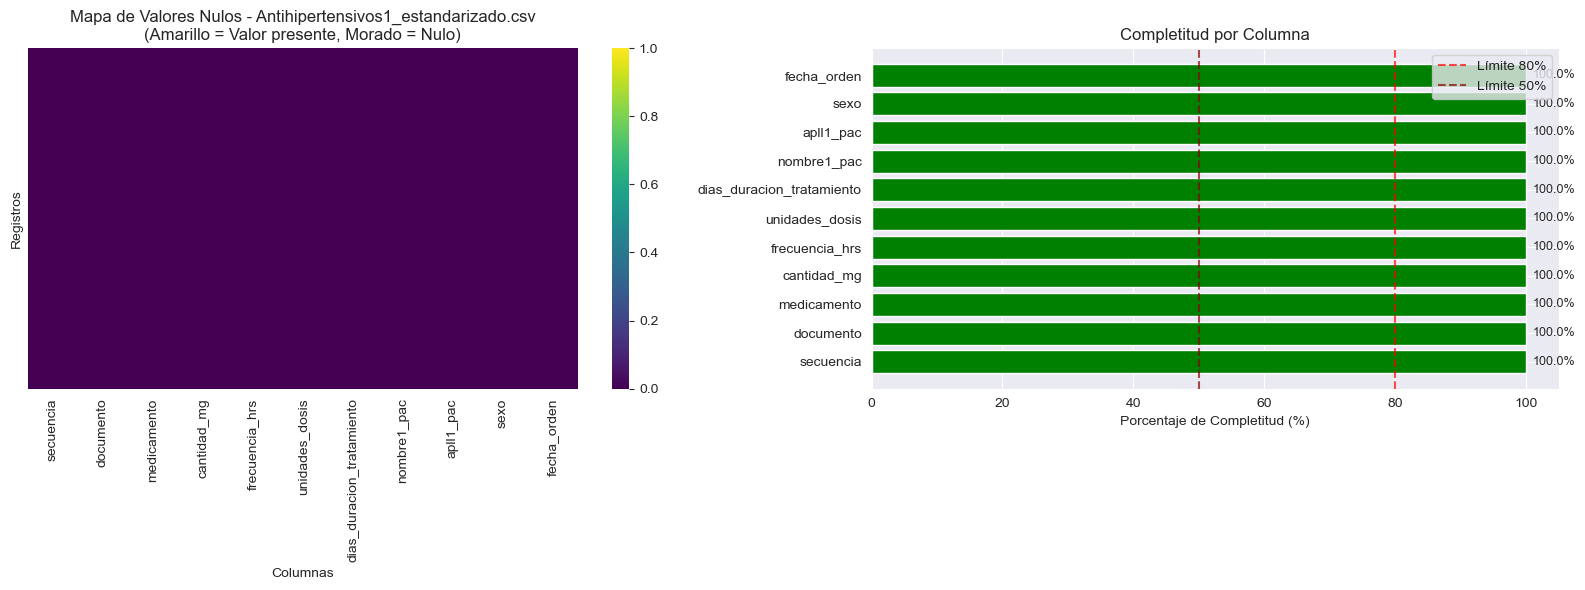


 Estadísticas por tipo de dato:
   • Columnas numéricas: 6
   • Columnas de texto: 5
   • Columnas de fecha: 0

 Valores únicos por columna:
   • secuencia: 130354 valores únicos
   • documento: 10070 valores únicos
   • medicamento: 23 valores únicos
   • cantidad_mg: 15 valores únicos
   • frecuencia_hrs: 9 valores únicos
   • unidades_dosis: 20 valores únicos
   • dias_duracion_tratamiento: 42 valores únicos
   • nombre1_pac: 2423 valores únicos
   • apll1_pac: 2015 valores únicos
   • sexo: 2 valores únicos
   • fecha_orden: 1387 valores únicos

────────────────────────────────────────────────────────────────────────────────



#### Análisis de: Antihipertensivos2_estandarizado.csv

 ANALIZANDO CALIDAD DE DATOS: Antihipertensivos2_estandarizado.csv
 Estadísticas generales:
   • Total de registros: 54,745
   • Total de columnas: 11

 Análisis de valores nulos:
   • secuencia: 0 nulos (0.0%)
   • documento: 0 nulos (0.0%)
   • medicamento: 0 nulos (0.0%)
   • cantidad_mg: 127 nulos (0.2%)
   • frecuencia_hrs: 19 nulos (0.0%)
   • unidades_dosis: 0 nulos (0.0%)
   • dias_duracion_tratamiento: 6 nulos (0.0%)
   • nombre1_pac: 0 nulos (0.0%)
   • apll1_pac: 0 nulos (0.0%)
   • sexo: 0 nulos (0.0%)
   • fecha_orden: 0 nulos (0.0%)

 Completitud promedio: 100.0%


<Figure size 1200x600 with 0 Axes>

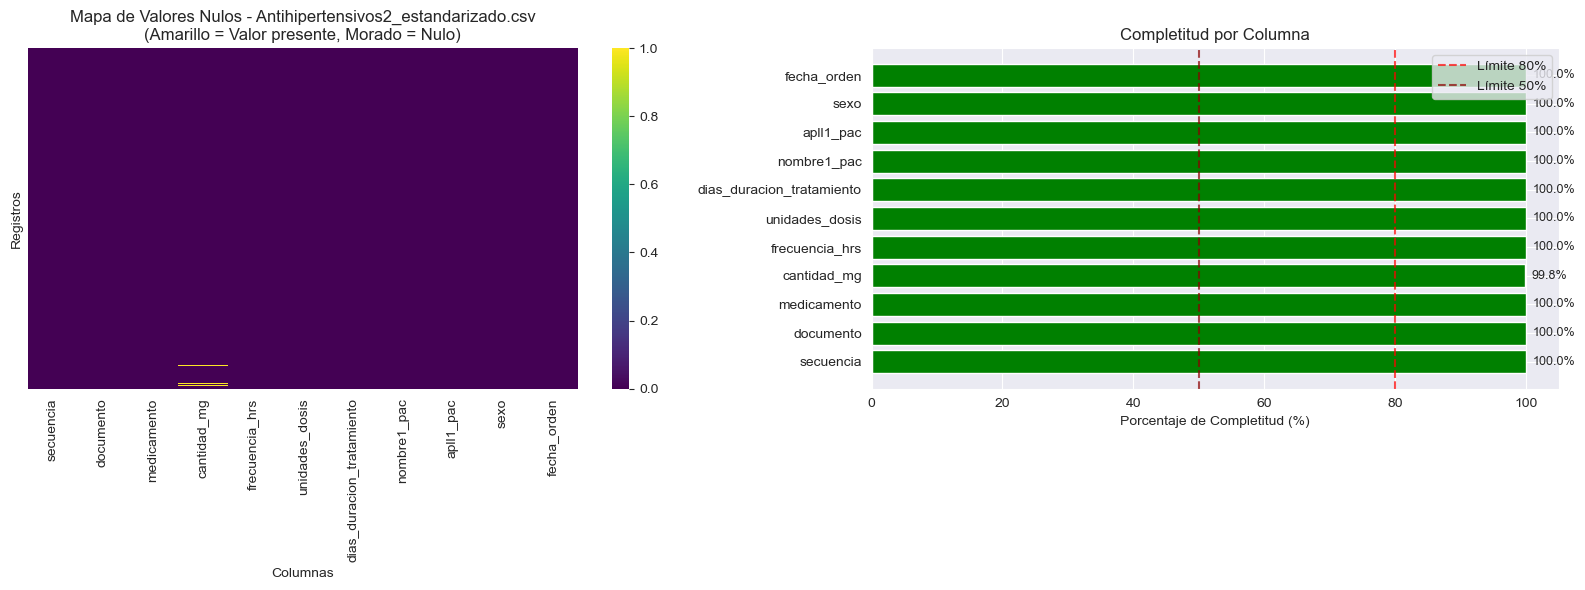


 Estadísticas por tipo de dato:
   • Columnas numéricas: 6
   • Columnas de texto: 5
   • Columnas de fecha: 0

 Valores únicos por columna:
   • secuencia: 46698 valores únicos
   • documento: 5255 valores únicos
   • medicamento: 14 valores únicos
   • cantidad_mg: 8 valores únicos
   • frecuencia_hrs: 6 valores únicos
   • unidades_dosis: 9 valores únicos
   • dias_duracion_tratamiento: 29 valores únicos
   • nombre1_pac: 1590 valores únicos
   • apll1_pac: 1462 valores únicos
   • sexo: 2 valores únicos
   • fecha_orden: 1381 valores únicos

────────────────────────────────────────────────────────────────────────────────



#### Análisis de: OtrosMedicamentos_estandarizado.csv

 ANALIZANDO CALIDAD DE DATOS: OtrosMedicamentos_estandarizado.csv
 Estadísticas generales:
   • Total de registros: 834,440
   • Total de columnas: 11

 Análisis de valores nulos:
   • secuencia: 0 nulos (0.0%)
   • documento: 0 nulos (0.0%)
   • medicamento: 0 nulos (0.0%)
   • cantidad_mg: 210153 nulos (25.2%)
   • frecuencia_hrs: 967 nulos (0.1%)
   • unidades_dosis: 0 nulos (0.0%)
   • dias_duracion_tratamiento: 100 nulos (0.0%)
   • nombre1_pac: 0 nulos (0.0%)
   • apll1_pac: 27 nulos (0.0%)
   • sexo: 0 nulos (0.0%)
   • fecha_orden: 0 nulos (0.0%)

 Completitud promedio: 97.7%


<Figure size 1200x600 with 0 Axes>

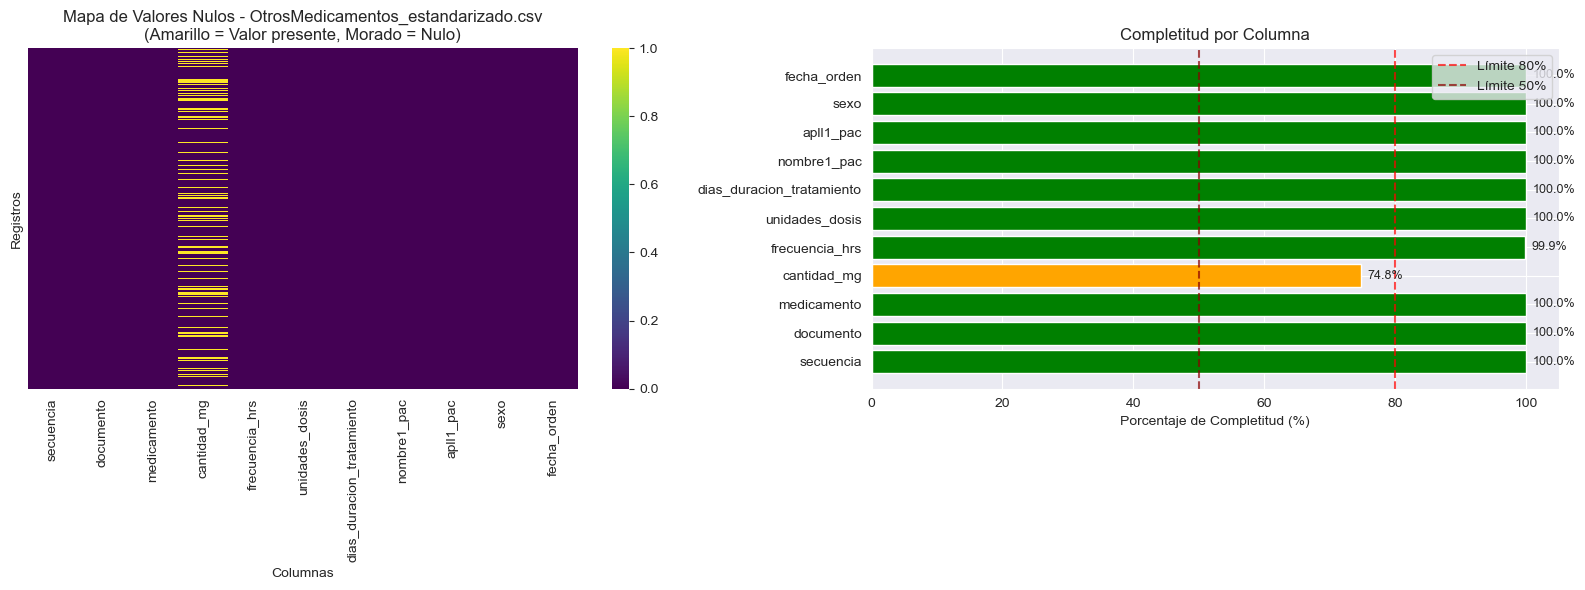


 Estadísticas por tipo de dato:
   • Columnas numéricas: 6
   • Columnas de texto: 5
   • Columnas de fecha: 0

 Valores únicos por columna:
   • secuencia: 166629 valores únicos
   • documento: 11457 valores únicos
   • medicamento: 532 valores únicos
   • cantidad_mg: 63 valores únicos
   • frecuencia_hrs: 15 valores únicos
   • unidades_dosis: 87 valores únicos
   • dias_duracion_tratamiento: 99 valores únicos
   • nombre1_pac: 2698 valores únicos
   • apll1_pac: 2176 valores únicos
   • sexo: 2 valores únicos
   • fecha_orden: 1391 valores únicos

────────────────────────────────────────────────────────────────────────────────



####  RESUMEN COMPARATIVO DE CALIDAD DE DATOS

,Archivo,Registros,Columnas,Completitud_Promedio,Columnas_Problemáticas,Estado_Calidad
0,Antihipertensivos1_estandarizado.csv,"177,552",11,100.0%,0,BUENA
1,Antihipertensivos2_estandarizado.csv,"54,745",11,100.0%,0,BUENA
2,OtrosMedicamentos_estandarizado.csv,"834,440",11,97.7%,0,BUENA


** Interpretación del análisis:**

- **Completitud >80%**: Calidad buena 

- **Completitud 60-80%**: Calidad regular 

- **Completitud <60%**: Calidad crítica 

- **Heatmap amarillo**: Datos presentes

- **Heatmap morado**: Valores nulos


 Análisis de calidad de datos completado


In [85]:
display(Markdown("### 2.7.1) ANÁLISIS DE CALIDAD DE DATOS: HEATMAP Y ESTADÍSTICAS"))

display(Markdown("**Análisis de integridad y calidad de los datos antes del guardado final**"))

import matplotlib.pyplot as plt
import seaborn as sns

def analizar_calidad_datos(df, nombre_archivo):
    """
    Realiza un análisis completo de calidad de datos para un DataFrame
    """
    print(f" ANALIZANDO CALIDAD DE DATOS: {nombre_archivo}")
    print("=" * 60)

    # Estadísticas básicas
    total_registros = len(df)
    total_columnas = len(df.columns)

    print(f" Estadísticas generales:")
    print(f"   • Total de registros: {total_registros:,}")
    print(f"   • Total de columnas: {total_columnas}")

    # Análisis de valores nulos por columna
    print(f"\n Análisis de valores nulos:")
    nulos_por_columna = df.isnull().sum()
    porcentaje_nulos = (nulos_por_columna / total_registros) * 100

    for columna in df.columns:
        nulos = nulos_por_columna[columna]
        porcentaje = porcentaje_nulos[columna]
        print(f"   • {columna}: {nulos} nulos ({porcentaje:.1f}%)")

    # Estadísticas de completitud
    completitud_por_columna = 100 - porcentaje_nulos
    completitud_promedio = completitud_por_columna.mean()

    print(f"\n Completitud promedio: {completitud_promedio:.1f}%")

    # Identificar columnas problemáticas
    columnas_problematicas = porcentaje_nulos[porcentaje_nulos > 50]
    if len(columnas_problematicas) > 0:
        print(f"\n  Columnas con más del 50% de valores nulos:")
        for columna, porcentaje in columnas_problematicas.items():
            print(f"   • {columna}: {porcentaje:.1f}% nulos")

    # Crear heatmap de valores nulos
    plt.figure(figsize=(12, 6))

    # Preparar datos para el heatmap
    datos_nulos = df.isnull()

    # Crear subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

    # Heatmap de valores nulos
    sns.heatmap(datos_nulos, yticklabels=False, cbar=True, cmap='viridis', ax=ax1)
    ax1.set_title(f'Mapa de Valores Nulos - {nombre_archivo}\n(Amarillo = Valor presente, Morado = Nulo)')
    ax1.set_xlabel('Columnas')
    ax1.set_ylabel('Registros')

    # Gráfico de barras de completitud por columna
    colores = ['red' if x < 50 else 'orange' if x < 80 else 'green' for x in completitud_por_columna]
    bars = ax2.barh(range(len(completitud_por_columna)), completitud_por_columna.values, color=colores)
    ax2.set_yticks(range(len(completitud_por_columna)))
    ax2.set_yticklabels(completitud_por_columna.index)
    ax2.set_xlabel('Porcentaje de Completitud (%)')
    ax2.set_title('Completitud por Columna')
    ax2.axvline(x=80, color='red', linestyle='--', alpha=0.7, label='Límite 80%')
    ax2.axvline(x=50, color='darkred', linestyle='--', alpha=0.7, label='Límite 50%')
    ax2.legend()

    # Añadir etiquetas de porcentaje en las barras
    for i, bar in enumerate(bars):
        width = bar.get_width()
        ax2.text(width + 1, bar.get_y() + bar.get_height()/2,
                 f'{width:.1f}%', ha='left', va='center', fontsize=9)

    plt.tight_layout()
    plt.show()

    # Estadísticas adicionales por tipo de dato
    print(f"\n Estadísticas por tipo de dato:")
    print(f"   • Columnas numéricas: {len(df.select_dtypes(include=['int64', 'float64']).columns)}")
    print(f"   • Columnas de texto: {len(df.select_dtypes(include=['object']).columns)}")
    print(f"   • Columnas de fecha: {len(df.select_dtypes(include=['datetime64']).columns)}")

    # Análisis de valores únicos por columna
    print(f"\n Valores únicos por columna:")
    for columna in df.columns:
        valores_unicos = df[columna].nunique()
        print(f"   • {columna}: {valores_unicos} valores únicos")

    return {
        'total_registros': total_registros,
        'total_columnas': total_columnas,
        'completitud_promedio': completitud_promedio,
        'columnas_problematicas': list(columnas_problematicas.index) if len(columnas_problematicas) > 0 else []
    }

# Aplicar análisis a todos los archivos
print(" Realizando análisis de calidad de datos...")

resultados_analisis = {}

for nombre_archivo, df in archivos_procesados.items():
    display(Markdown(f"#### Análisis de: {nombre_archivo}"))

    resultado = analizar_calidad_datos(df, nombre_archivo)
    resultados_analisis[nombre_archivo] = resultado

    print("\n" + "─" * 80 + "\n")

# Resumen comparativo
display(Markdown("####  RESUMEN COMPARATIVO DE CALIDAD DE DATOS"))

resumen_comparativo = []
for nombre_archivo, resultado in resultados_analisis.items():
    resumen_comparativo.append({
        'Archivo': nombre_archivo,
        'Registros': f"{resultado['total_registros']:,}",
        'Columnas': resultado['total_columnas'],
        'Completitud_Promedio': f"{resultado['completitud_promedio']:.1f}%",
        'Columnas_Problemáticas': len(resultado['columnas_problematicas']),
        'Estado_Calidad': ' BUENA' if resultado['completitud_promedio'] > 80 else '  REGULAR' if resultado['completitud_promedio'] > 60 else ' CRÍTICA'
    })

resumen_df = pd.DataFrame(resumen_comparativo)
display(resumen_df)

display(Markdown("** Interpretación del análisis:**"))
display(Markdown("- **Completitud >80%**: Calidad buena "))
display(Markdown("- **Completitud 60-80%**: Calidad regular "))
display(Markdown("- **Completitud <60%**: Calidad crítica "))
display(Markdown("- **Heatmap amarillo**: Datos presentes"))
display(Markdown("- **Heatmap morado**: Valores nulos"))

print("\n Análisis de calidad de datos completado")

## 2.7.2) BÚSQUEDA Y CORRECCIÓN DE INPUTACIONES AMBIGUAS (METROPROLOL Y METOPROLOL)

In [86]:
display(Markdown("### 2.7.2) CORRECCIÓN DE TYPOS EN MEDICAMENTOS: 'METROPROLOL' → 'METOPROLOL'"))

display(Markdown("**Corrigiendo variantes ortográficas de Metoprolol identificadas por el médico**"))

def corregir_metroprolol(df, nombre_archivo):
    """
    Corrige las variantes de 'metroprolol' a 'metoprolol' en la columna medicamento
    """
    print(f" CORRIGIENDO TYPOS EN: {nombre_archivo}")
    print("=" * 50)

    # Crear copia para no modificar el original
    df_corregido = df.copy()

    # Contar ocurrencias antes de la corrección
    patron_busqueda = r'metroprolol'
    ocurrencias_antes = df_corregido['medicamento'].str.contains(patron_busqueda, case=False, na=False).sum()

    if ocurrencias_antes > 0:
        print(f" Encontradas {ocurrencias_antes} ocurrencias de 'metroprolol' o variantes")

        # Mostrar ejemplos antes de la corrección
        ejemplos_antes = df_corregido[df_corregido['medicamento'].str.contains(patron_busqueda, case=False, na=False)]['medicamento'].head(5)
        print(" Ejemplos antes de la corrección:")
        for ejemplo in ejemplos_antes:
            print(f"   • {ejemplo}")

        # Aplicar corrección usando expresión regular
        # Busca 'metroprolol' en cualquier parte del texto, case insensitive
        patron_correccion = r'metroprolol'
        reemplazo = 'metoprolol'

        df_corregido['medicamento'] = df_corregido['medicamento'].str.replace(
            patron_correccion, reemplazo, case=False, regex=True
        )

        # Verificar corrección
        ocurrencias_despues = df_corregido['medicamento'].str.contains(patron_busqueda, case=False, na=False).sum()
        ocurrencias_corregidas = ocurrencias_antes - ocurrencias_despues

        print(f" Corregidas {ocurrencias_corregidas} ocurrencias")

        # Mostrar ejemplos después de la corrección
        if ocurrencias_despues == 0:
            print(" ¡Todas las ocurrencias de 'metroprolol' han sido corregidas!")
        else:
            print(f"  Quedan {ocurrencias_despues} ocurrencias sin corregir")

        # Mostrar algunos ejemplos de la corrección
        ejemplos_corregidos = df_corregido[df_corregido['medicamento'].str.contains('metoprolol', case=False, na=False)]['medicamento'].head(3)
        print(" Ejemplos después de la corrección:")
        for ejemplo in ejemplos_corregidos:
            print(f"   • {ejemplo}")

    else:
        print(" No se encontraron ocurrencias de 'metroprolol' para corregir")

    # Búsqueda adicional de otras posibles variantes
    variantes_comunes = [
        r'metroprolol', r'metroprolal', r'metoprolal',
        r'metoprollol', r'metroprollol', r'metoprolol'
    ]

    print(f"\n Búsqueda de otras variantes posibles:")
    for variante in variantes_comunes:
        conteo = df_corregido['medicamento'].str.contains(variante, case=False, na=False).sum()
        if conteo > 0:
            print(f"   • '{variante}': {conteo} ocurrencias")

    return df_corregido

# Aplicar corrección a todos los archivos
print(" Aplicando corrección de 'metroprolol' a todos los archivos...")

archivos_corregidos = {}
estadisticas_correccion = {}

for nombre_archivo, df in archivos_procesados.items():
    display(Markdown(f"####  Corrigiendo: {nombre_archivo}"))

    # Aplicar corrección
    df_corregido = corregir_metroprolol(df, nombre_archivo)
    archivos_corregidos[nombre_archivo] = df_corregido

    # Contar metoprolol después de corrección
    metoprolol_final = df_corregido['medicamento'].str.contains('metoprolol', case=False, na=False).sum()
    estadisticas_correccion[nombre_archivo] = metoprolol_final

    print(f" Total de 'metoprolol' después de corrección: {metoprolol_final}")
    print("\n" + "─" * 60 + "\n")

# Reemplazar los archivos procesados con los corregidos
archivos_procesados = archivos_corregidos

# Resumen final de la corrección
display(Markdown("####  RESUMEN DE CORRECCIÓN DE METOPROLOL"))

resumen_correccion = []
for nombre_archivo, conteo in estadisticas_correccion.items():
    resumen_correccion.append({
        'Archivo': nombre_archivo,
        'Registros_Metoprolol_Corregido': conteo,
        'Estado': ' CORREGIDO'
    })

resumen_df = pd.DataFrame(resumen_correccion)
display(resumen_df)

display(Markdown("** Resultados de la corrección:**"))
display(Markdown("- **Variantes de 'metroprolol' estandarizadas a 'metoprolol'**"))
display(Markdown("- **Consistencia en la nomenclatura de medicamentos**"))
display(Markdown("- **Preparado para análisis clínico preciso**"))

print("\n Corrección de typos en medicamentos completada")

# Verificación final de la integridad de los datos
display(Markdown("####  VERIFICACIÓN FINAL INTEGRIDAD DATOS"))

print(" Estado final de los datasets:")
for nombre_archivo, df in archivos_procesados.items():
    print(f"   • {nombre_archivo}: {len(df)} registros, {len(df.columns)} columnas")
    print(f"     Columnas: {list(df.columns)}")

print("\n ¡DATASETS COMPLETAMENTE PREPARADOS PARA EL GUARDADO FINAL!")

### 2.7.2) CORRECCIÓN DE TYPOS EN MEDICAMENTOS: 'METROPROLOL' → 'METOPROLOL'

**Corrigiendo variantes ortográficas de Metoprolol identificadas por el médico**

 Aplicando corrección de 'metroprolol' a todos los archivos...


####  Corrigiendo: Antihipertensivos1_estandarizado.csv

 CORRIGIENDO TYPOS EN: Antihipertensivos1_estandarizado.csv
 No se encontraron ocurrencias de 'metroprolol' para corregir

 Búsqueda de otras variantes posibles:
 Total de 'metoprolol' después de corrección: 0

────────────────────────────────────────────────────────────



####  Corrigiendo: Antihipertensivos2_estandarizado.csv

 CORRIGIENDO TYPOS EN: Antihipertensivos2_estandarizado.csv
 No se encontraron ocurrencias de 'metroprolol' para corregir

 Búsqueda de otras variantes posibles:
   • 'metoprolol': 22621 ocurrencias
 Total de 'metoprolol' después de corrección: 22621

────────────────────────────────────────────────────────────



####  Corrigiendo: OtrosMedicamentos_estandarizado.csv

 CORRIGIENDO TYPOS EN: OtrosMedicamentos_estandarizado.csv
 No se encontraron ocurrencias de 'metroprolol' para corregir

 Búsqueda de otras variantes posibles:
   • 'metoprolol': 22621 ocurrencias
 Total de 'metoprolol' después de corrección: 22621

────────────────────────────────────────────────────────────



####  RESUMEN DE CORRECCIÓN DE METOPROLOL

,Archivo,Registros_Metoprolol_Corregido,Estado
0,Antihipertensivos1_estandarizado.csv,0,CORREGIDO
1,Antihipertensivos2_estandarizado.csv,22621,CORREGIDO
2,OtrosMedicamentos_estandarizado.csv,22621,CORREGIDO


** Resultados de la corrección:**

- **Variantes de 'metroprolol' estandarizadas a 'metoprolol'**

- **Consistencia en la nomenclatura de medicamentos**

- **Preparado para análisis clínico preciso**


 Corrección de typos en medicamentos completada


####  VERIFICACIÓN FINAL INTEGRIDAD DATOS

 Estado final de los datasets:
   • Antihipertensivos1_estandarizado.csv: 177552 registros, 11 columnas
     Columnas: ['secuencia', 'documento', 'medicamento', 'cantidad_mg', 'frecuencia_hrs', 'unidades_dosis', 'dias_duracion_tratamiento', 'nombre1_pac', 'apll1_pac', 'sexo', 'fecha_orden']
   • Antihipertensivos2_estandarizado.csv: 54745 registros, 11 columnas
     Columnas: ['secuencia', 'documento', 'medicamento', 'cantidad_mg', 'frecuencia_hrs', 'unidades_dosis', 'dias_duracion_tratamiento', 'nombre1_pac', 'apll1_pac', 'sexo', 'fecha_orden']
   • OtrosMedicamentos_estandarizado.csv: 834440 registros, 11 columnas
     Columnas: ['secuencia', 'documento', 'medicamento', 'cantidad_mg', 'frecuencia_hrs', 'unidades_dosis', 'dias_duracion_tratamiento', 'nombre1_pac', 'apll1_pac', 'sexo', 'fecha_orden']

 ¡DATASETS COMPLETAMENTE PREPARADOS PARA EL GUARDADO FINAL!


## 2.7.3) NORMALIZACIÓN DE LAS FECHAS

In [87]:
display(Markdown("### 2.7.3) NORMALIZACIÓN DE FECHAS: REMOCIÓN DE HORA 00:00"))

display(Markdown("**Limpieza del formato de fecha_orden para dejar solo dd/mm/yyyy**"))

def normalizar_formato_fecha(df, nombre_archivo):
    """
    Normaliza el campo 'fecha_orden' removiendo '00:00' y dejando solo la fecha en formato dd/mm/yyyy
    Mantiene el tipo de dato como texto plano
    """
    import re
    print(f"NORMALIZANDO FECHAS EN: {nombre_archivo}")
    print("=" * 50)

    # Crear copia para no modificar el original
    df_normalizado = df.copy()

    # Verificar que existe la columna fecha_orden
    if 'fecha_orden' not in df_normalizado.columns:
        print(f"No se encuentra la columna 'fecha_orden' en {nombre_archivo}")
        return df_normalizado

    # Contar valores nulos antes
    nulos_antes = df_normalizado['fecha_orden'].isna().sum()
    print(f"Valores nulos en fecha_orden: {nulos_antes}")

    # Mostrar ejemplos antes de la normalización
    ejemplos_antes = df_normalizado['fecha_orden'].dropna().head(5).tolist()
    print("Ejemplos antes de la normalización:")
    for ejemplo in ejemplos_antes:
        print(f"   • {ejemplo}")

    # Función para limpiar el formato de fecha
    def limpiar_formato_fecha(fecha_str):
        """Remueve '00:00' y espacios extras, mantiene formato dd/mm/yyyy"""
        if pd.isna(fecha_str):
            return fecha_str

        # Convertir a string y limpiar
        fecha_limpia = str(fecha_str).strip()

        # Remover " 00:00" al final
        if fecha_limpia.endswith(' 00:00'):
            fecha_limpia = fecha_limpia[:-6]

        # También manejar otros posibles formatos de hora
        fecha_limpia = re.sub(r'\s+00:00$', '', fecha_limpia)
        fecha_limpia = re.sub(r'\s+0:00$', '', fecha_limpia)

        # Verificar que el formato sea dd/mm/yyyy
        patron_fecha = r'^\d{1,2}/\d{1,2}/\d{4}$'
        if not re.match(patron_fecha, fecha_limpia):
            print(f"Formato de fecha inesperado: '{fecha_str}' -> '{fecha_limpia}'")

        return fecha_limpia

    # Aplicar la limpieza
    df_normalizado['fecha_orden'] = df_normalizado['fecha_orden'].apply(limpiar_formato_fecha)

    # Verificar resultados
    nulos_despues = df_normalizado['fecha_orden'].isna().sum()
    cambios_realizados = (df_normalizado['fecha_orden'] != df['fecha_orden']).sum()

    print(f"Cambios realizados: {cambios_realizados} registros")
    print(f"Valores nulos después: {nulos_despues}")

    # Mostrar ejemplos después de la normalización
    ejemplos_despues = df_normalizado['fecha_orden'].dropna().head(5).tolist()
    print("Ejemplos después de la normalización:")
    for ejemplo in ejemplos_despues:
        print(f"   • {ejemplo}")

    # Verificar que no se alteró la posición de la columna
    posicion_antes = list(df.columns).index('fecha_orden')
    posicion_despues = list(df_normalizado.columns).index('fecha_orden')

    if posicion_antes == posicion_despues:
        print(f"Posición de 'fecha_orden' mantenida: posición {posicion_antes + 1}")
    else:
        print(f"Posición cambiada: antes {posicion_antes + 1}, después {posicion_despues + 1}")

    # Análisis de formatos únicos después de la limpieza
    formatos_unicos = df_normalizado['fecha_orden'].dropna().apply(
        lambda x: 'OK' if re.match(r'^\d{1,2}/\d{1,2}/\d{4}$', str(x)) else 'FORMATO_INVALIDO'
    ).value_counts()

    print(f"Validación de formatos después:")
    for formato, count in formatos_unicos.items():
        print(f"   • {formato}: {count} registros")

    return df_normalizado

# Aplicar normalización de fechas a todos los archivos
print("Aplicando normalización de formato de fechas a todos los archivos...")

archivos_fechas_normalizadas = {}

for nombre_archivo, df in archivos_procesados.items():
    display(Markdown(f"#### Normalizando fechas: {nombre_archivo}"))

    # Aplicar normalización
    df_normalizado = normalizar_formato_fecha(df, nombre_archivo)
    archivos_fechas_normalizadas[nombre_archivo] = df_normalizado

    print("\n" + "─" * 60 + "\n")

# Reemplazar los archivos procesados con los normalizados
archivos_procesados = archivos_fechas_normalizadas

# Resumen final de la normalización de fechas
display(Markdown("#### RESUMEN DE NORMALIZACIÓN DE FECHAS"))
import re
resumen_fechas = []
for nombre_archivo, df in archivos_procesados.items():
    if 'fecha_orden' in df.columns:
        # Estadísticas de fechas
        fechas_unicas = df['fecha_orden'].nunique()
        fechas_validas = df['fecha_orden'].notna().sum()
        formato_correcto = df['fecha_orden'].dropna().apply(
            lambda x: bool(re.match(r'^\d{1,2}/\d{1,2}/\d{4}$', str(x)))
        ).sum()

        resumen_fechas.append({
            'Archivo': nombre_archivo,
            'Registros_Con_Fecha': fechas_validas,
            'Fechas_Únicas': fechas_unicas,
            'Formato_Correcto': formato_correcto,
            'Porcentaje_Válido': f"{(formato_correcto/len(df)*100):.1f}%" if len(df) > 0 else "0%"
        })

if resumen_fechas:
    resumen_df = pd.DataFrame(resumen_fechas)
    display(resumen_df)

# Verificación adicional de la integridad de los datos
display(Markdown("#### VERIFICACIÓN FINAL DE ESTRUCTURA"))

print("Estado final de columnas y posiciones:")
for nombre_archivo, df in archivos_procesados.items():
    columnas = list(df.columns)
    pos_fecha = columnas.index('fecha_orden') + 1 if 'fecha_orden' in columnas else 'NO ENCONTRADA'
    print(f"   • {nombre_archivo}: {len(df)} registros, {len(columnas)} columnas")
    print(f"     Posición de fecha_orden: {pos_fecha}")
    print(f"     Columnas: {columnas}")

display(Markdown("**Resultados de la normalización de fechas:**"))
display(Markdown("- **Formato '00:00' removido de todas las fechas**"))
display(Markdown("- **Estructura dd/mm/yyyy preservada como texto plano**"))
display(Markdown("- **Posición de la columna fecha_orden mantenida**"))
display(Markdown("- **Integridad de datos verificada**"))

print("\nNormalización de formato de fechas completada exitosamente")

### 2.7.3) NORMALIZACIÓN DE FECHAS: REMOCIÓN DE HORA 00:00

**Limpieza del formato de fecha_orden para dejar solo dd/mm/yyyy**

Aplicando normalización de formato de fechas a todos los archivos...


#### Normalizando fechas: Antihipertensivos1_estandarizado.csv

NORMALIZANDO FECHAS EN: Antihipertensivos1_estandarizado.csv
Valores nulos en fecha_orden: 0
Ejemplos antes de la normalización:
   • 9/2/2018
   • 3/2/2018
   • 3/2/2018
   • 3/2/2018
   • 3/2/2018
Cambios realizados: 0 registros
Valores nulos después: 0
Ejemplos después de la normalización:
   • 9/2/2018
   • 3/2/2018
   • 3/2/2018
   • 3/2/2018
   • 3/2/2018
Posición de 'fecha_orden' mantenida: posición 11
Validación de formatos después:
   • OK: 177552 registros

────────────────────────────────────────────────────────────



#### Normalizando fechas: Antihipertensivos2_estandarizado.csv

NORMALIZANDO FECHAS EN: Antihipertensivos2_estandarizado.csv
Valores nulos en fecha_orden: 0
Ejemplos antes de la normalización:
   • 28/2/2018
   • 9/2/2018
   • 5/2/2018
   • 21/2/2018
   • 6/2/2018
Cambios realizados: 0 registros
Valores nulos después: 0
Ejemplos después de la normalización:
   • 28/2/2018
   • 9/2/2018
   • 5/2/2018
   • 21/2/2018
   • 6/2/2018
Posición de 'fecha_orden' mantenida: posición 11
Validación de formatos después:
   • OK: 54745 registros

────────────────────────────────────────────────────────────



#### Normalizando fechas: OtrosMedicamentos_estandarizado.csv

NORMALIZANDO FECHAS EN: OtrosMedicamentos_estandarizado.csv
Valores nulos en fecha_orden: 0
Ejemplos antes de la normalización:
   • 28/2/2018 00:00
   • 28/2/2018 00:00
   • 28/2/2018 00:00
   • 28/2/2018 00:00
   • 28/2/2018 00:00
Cambios realizados: 834440 registros
Valores nulos después: 0
Ejemplos después de la normalización:
   • 28/2/2018
   • 28/2/2018
   • 28/2/2018
   • 28/2/2018
   • 28/2/2018
Posición de 'fecha_orden' mantenida: posición 11
Validación de formatos después:
   • OK: 834440 registros

────────────────────────────────────────────────────────────



#### RESUMEN DE NORMALIZACIÓN DE FECHAS

,Archivo,Registros_Con_Fecha,Fechas_Únicas,Formato_Correcto,Porcentaje_Válido
0,Antihipertensivos1_estandarizado.csv,177552,1387,177552,100.0%
1,Antihipertensivos2_estandarizado.csv,54745,1381,54745,100.0%
2,OtrosMedicamentos_estandarizado.csv,834440,1391,834440,100.0%


#### VERIFICACIÓN FINAL DE ESTRUCTURA

Estado final de columnas y posiciones:
   • Antihipertensivos1_estandarizado.csv: 177552 registros, 11 columnas
     Posición de fecha_orden: 11
     Columnas: ['secuencia', 'documento', 'medicamento', 'cantidad_mg', 'frecuencia_hrs', 'unidades_dosis', 'dias_duracion_tratamiento', 'nombre1_pac', 'apll1_pac', 'sexo', 'fecha_orden']
   • Antihipertensivos2_estandarizado.csv: 54745 registros, 11 columnas
     Posición de fecha_orden: 11
     Columnas: ['secuencia', 'documento', 'medicamento', 'cantidad_mg', 'frecuencia_hrs', 'unidades_dosis', 'dias_duracion_tratamiento', 'nombre1_pac', 'apll1_pac', 'sexo', 'fecha_orden']
   • OtrosMedicamentos_estandarizado.csv: 834440 registros, 11 columnas
     Posición de fecha_orden: 11
     Columnas: ['secuencia', 'documento', 'medicamento', 'cantidad_mg', 'frecuencia_hrs', 'unidades_dosis', 'dias_duracion_tratamiento', 'nombre1_pac', 'apll1_pac', 'sexo', 'fecha_orden']


**Resultados de la normalización de fechas:**

- **Formato '00:00' removido de todas las fechas**

- **Estructura dd/mm/yyyy preservada como texto plano**

- **Posición de la columna fecha_orden mantenida**

- **Integridad de datos verificada**


Normalización de formato de fechas completada exitosamente



## 2.8) Guardado de archivos estandarizados y filtrados

In [88]:
display(Markdown("### GUARDADO: ARCHIVOS ESTANDARIZADOS Y FILTRADOS"))

display(Markdown("**Guardando archivos con estructura optimizada:**"))
display(Markdown("- **Solo columnas relevantes para análisis**"))
display(Markdown("- **Datos completamente normalizados**"))
display(Markdown("- **Formato listo para fase de segregación**"))

for nombre_salida, df in archivos_procesados.items():
    # Asegurar el orden lógico de las columnas
    orden_columnas = [
        'secuencia', 'documento', 'nombre1_pac', 'apll1_pac', 'sexo', 'fecha_orden',
        'medicamento', 'cantidad_mg', 'frecuencia_hrs', 'unidades_dosis', 'dias_duracion_tratamiento'
    ]

    # Reordenar columnas según el orden lógico (solo las que existen)
    columnas_existentes = [col for col in orden_columnas if col in df.columns]
    df_ordenado = df[columnas_existentes]

    # Guardar el archivo
    df_ordenado.to_csv(nombre_salida, index=False, sep=';', encoding='latin-1')
    print(f" Guardado: {nombre_salida}")
    print(f"   - Dimensiones: {len(df_ordenado)} registros x {len(df_ordenado.columns)} columnas")
    print(f"   - Columnas: {list(df_ordenado.columns)}")
    print(f"   - Tamaño aproximado: {df_ordenado.memory_usage(deep=True).sum() / 1024 / 1024:.2f} MB")

print(f"\n Todos los archivos han sido guardados con estructura optimizada")

# Mostrar resumen final de todos los archivos
display(Markdown("####  RESUMEN FINAL DE LA FASE DE NORMALIZACIÓN"))

resumen_data = []
for nombre_archivo, df in archivos_procesados.items():
    resumen_data.append({
        'Archivo': nombre_archivo,
        'Registros': len(df),
        'Columnas': len(df.columns),
        'Columnas_Finales': ', '.join(df.columns),
        'Estado': ' LISTO'
    })

resumen_df = pd.DataFrame(resumen_data)
display(resumen_df)

display(Markdown("** ¡FASE DE NORMALIZACIÓN COMPLETADA!**"))
display(Markdown("- **Todos los campos críticos normalizados**"))
display(Markdown("- **Estructura optimizada para ML**"))
display(Markdown("- **Preparado para Fase 3: Generación de Salidas**"))

print("\n" + "="*80)
print(" DATASETS LISTOS PARA LA SEGREGACIÓN POR CATEGORÍAS CLÍNICAS")
print("="*80)

### GUARDADO: ARCHIVOS ESTANDARIZADOS Y FILTRADOS

**Guardando archivos con estructura optimizada:**

- **Solo columnas relevantes para análisis**

- **Datos completamente normalizados**

- **Formato listo para fase de segregación**

 Guardado: Antihipertensivos1_estandarizado.csv
   - Dimensiones: 177552 registros x 11 columnas
   - Columnas: ['secuencia', 'documento', 'nombre1_pac', 'apll1_pac', 'sexo', 'fecha_orden', 'medicamento', 'cantidad_mg', 'frecuencia_hrs', 'unidades_dosis', 'dias_duracion_tratamiento']
   - Tamaño aproximado: 55.10 MB
 Guardado: Antihipertensivos2_estandarizado.csv
   - Dimensiones: 54745 registros x 11 columnas
   - Columnas: ['secuencia', 'documento', 'nombre1_pac', 'apll1_pac', 'sexo', 'fecha_orden', 'medicamento', 'cantidad_mg', 'frecuencia_hrs', 'unidades_dosis', 'dias_duracion_tratamiento']
   - Tamaño aproximado: 17.26 MB
 Guardado: OtrosMedicamentos_estandarizado.csv
   - Dimensiones: 834440 registros x 11 columnas
   - Columnas: ['secuencia', 'documento', 'nombre1_pac', 'apll1_pac', 'sexo', 'fecha_orden', 'medicamento', 'cantidad_mg', 'frecuencia_hrs', 'unidades_dosis', 'dias_duracion_tratamiento']
   - Tamaño aproximado: 268.78 MB

 Todos los archivos han sido guardados con est

####  RESUMEN FINAL DE LA FASE DE NORMALIZACIÓN

,Archivo,Registros,Columnas,Columnas_Finales,Estado
0,Antihipertensivos1_estandarizado.csv,177552,11,"secuencia, documento, medicamento, cantidad_mg...",LISTO
1,Antihipertensivos2_estandarizado.csv,54745,11,"secuencia, documento, medicamento, cantidad_mg...",LISTO
2,OtrosMedicamentos_estandarizado.csv,834440,11,"secuencia, documento, medicamento, cantidad_mg...",LISTO


** ¡FASE DE NORMALIZACIÓN COMPLETADA!**

- **Todos los campos críticos normalizados**

- **Estructura optimizada para ML**

- **Preparado para Fase 3: Generación de Salidas**


 DATASETS LISTOS PARA LA SEGREGACIÓN POR CATEGORÍAS CLÍNICAS


## 2.9) VERIFICACIÓN DE RESULTADOS

In [89]:
display(Markdown("VERIFICACIÓN: RESULTADOS DE ESTANDARIZACIÓN"))

archivos_estandarizados = [
    'Antihipertensivos1_estandarizado.csv',
    'Antihipertensivos2_estandarizado.csv',
    'OtrosMedicamentos_estandarizado.csv'
]

display(Markdown("Comparativa de estructuras finales"))

for archivo in archivos_estandarizados:
    if os.path.exists(archivo):
        df = pd.read_csv(archivo, sep=';', encoding='latin-1', nrows=3)
        display(Markdown(f"**{archivo}**"))
        print(f"Dimensiones: {len(df)} registros x {len(df.columns)} columnas")
        print(f"Columnas: {list(df.columns)}")

        # Mostrar primeras filas
        display(df.head(2))
        print("\n" + "─" * 80 + "\n")
    else:
        print(f" {archivo} no encontrado")

VERIFICACIÓN: RESULTADOS DE ESTANDARIZACIÓN

Comparativa de estructuras finales

**Antihipertensivos1_estandarizado.csv**

Dimensiones: 3 registros x 11 columnas
Columnas: ['secuencia', 'documento', 'nombre1_pac', 'apll1_pac', 'sexo', 'fecha_orden', 'medicamento', 'cantidad_mg', 'frecuencia_hrs', 'unidades_dosis', 'dias_duracion_tratamiento']


,secuencia,documento,nombre1_pac,apll1_pac,sexo,fecha_orden,medicamento,cantidad_mg,frecuencia_hrs,unidades_dosis,dias_duracion_tratamiento
0,972520,3795432.0,CARLOS,POLO,M,9/2/2018,CARVEDILOL,625.0,12.0,1.0,90.0
1,976629,22499313.0,OMAIRA,GARCIA,F,3/2/2018,CARVEDILOL,625.0,12.0,1.0,30.0



────────────────────────────────────────────────────────────────────────────────



**Antihipertensivos2_estandarizado.csv**

Dimensiones: 3 registros x 11 columnas
Columnas: ['secuencia', 'documento', 'nombre1_pac', 'apll1_pac', 'sexo', 'fecha_orden', 'medicamento', 'cantidad_mg', 'frecuencia_hrs', 'unidades_dosis', 'dias_duracion_tratamiento']


,secuencia,documento,nombre1_pac,apll1_pac,sexo,fecha_orden,medicamento,cantidad_mg,frecuencia_hrs,unidades_dosis,dias_duracion_tratamiento
0,967714,22412336.0,MARTHA,FONNEGRA,F,28/2/2018,METOPROLOL,100.0,12.0,1.0,60.0
1,973088,26925206.0,NELIA,ROMERO,F,9/2/2018,METOPROLOL,50.0,12.0,1.0,120.0



────────────────────────────────────────────────────────────────────────────────



**OtrosMedicamentos_estandarizado.csv**

Dimensiones: 3 registros x 11 columnas
Columnas: ['secuencia', 'documento', 'nombre1_pac', 'apll1_pac', 'sexo', 'fecha_orden', 'medicamento', 'cantidad_mg', 'frecuencia_hrs', 'unidades_dosis', 'dias_duracion_tratamiento']


,secuencia,documento,nombre1_pac,apll1_pac,sexo,fecha_orden,medicamento,cantidad_mg,frecuencia_hrs,unidades_dosis,dias_duracion_tratamiento
0,967714,22412336.0,MARTHA,FONNEGRA,F,28/2/2018,OMEPRAZOL,20.0,24.0,1.0,60.0
1,967714,22412336.0,MARTHA,FONNEGRA,F,28/2/2018,ALUMINIO HIDRÓXIDO,NaN,8.0,1.0,60.0



────────────────────────────────────────────────────────────────────────────────



## 2.9.1) RESUMEN FINAL DE LA FASE

In [90]:
display(Markdown("RESUMEN: ESTADÍSTICAS FINALES DEL PROCESO"))

resumen_data = []
for archivo_original, archivo_estandarizado in zip(
        ['Antihipertensivos1.csv', 'Antihipertensivos2.csv', 'OtrosMedicamentos.csv'],
        ['Antihipertensivos1_estandarizado.csv', 'Antihipertensivos2_estandarizado.csv', 'OtrosMedicamentos_estandarizado.csv']
):
    if os.path.exists(archivo_original) and os.path.exists(archivo_estandarizado):
        df_orig = pd.read_csv(archivo_original, sep=';', encoding='latin-1')
        df_est = pd.read_csv(archivo_estandarizado, sep=';', encoding='latin-1')

        resumen_data.append({
            'Archivo': archivo_original,
            'Registros_Original': len(df_orig),
            'Registros_Final': len(df_est),
            'Columnas_Original': len(df_orig.columns),
            'Columnas_Final': len(df_est.columns),
            'Estado': 'COMPLETADO'
        })
    else:
        resumen_data.append({
            'Archivo': archivo_original,
            'Registros_Original': '-',
            'Registros_Final': '-',
            'Columnas_Original': '-',
            'Columnas_Final': '-',
            'Estado': 'NO PROCESADO'
        })

df_resumen = pd.DataFrame(resumen_data)
display(df_resumen)

display(Markdown("Columnas estandarizadas en todos los archivos:"))
for col in columnas_objetivo:
    print(f"{col}")

display(Markdown("PROCESO COMPLETADO EXITOSAMENTE"))
print("Los archivos estandarizados están listos para el siguiente paso del análisis.")

RESUMEN: ESTADÍSTICAS FINALES DEL PROCESO

,Archivo,Registros_Original,Registros_Final,Columnas_Original,Columnas_Final,Estado
0,Antihipertensivos1.csv,-,-,-,-,NO PROCESADO
1,Antihipertensivos2.csv,-,-,-,-,NO PROCESADO
2,OtrosMedicamentos.csv,-,-,-,-,NO PROCESADO


Columnas estandarizadas en todos los archivos:

Secuencia
Documento
CodProced
Num_orden
Medicamento
Frecuencia
Dosis
Via
TTratamiento
Empresa
Cantidad
Item
Especialidad
NumProfe
MedicoOrdena
Nom1Pac
Nom2Pac
Apell1Pac
Apell2Pac
Fechnac
Sexo
Direccion
Telefono
FechaOrden


PROCESO COMPLETADO EXITOSAMENTE

Los archivos estandarizados están listos para el siguiente paso del análisis.


# 3.) FASE DE GENERACIÓN DE SALIDAS (.CSV CON OCURRENCIAS CLÍNICAS CATEGORIZADAS SEGÚN CRITERIOS DE SEGREGACIÓN)

## 3.1) Configuración Inicial y Funciones de Utilidad

In [91]:
# Configuración inicial y funciones auxiliares
def normalizar_texto(texto):
    """Normaliza texto para comparaciones más robustas"""
    if pd.isna(texto):
        return ""
    return str(texto).lower().strip()

def cargar_y_combinar_datos(archivos):
    """Carga y combina todos los archivos CSV en un solo DataFrame"""
    dfs = []
    for archivo in archivos:
        if os.path.exists(archivo):
            encodings = ["latin-1", "ISO-8859-1", "utf-8"]
            separadores = [";", ","]

            cargado = False
            for encoding in encodings:
                if cargado:
                    break
                for sep in separadores:
                    try:
                        df = pd.read_csv(archivo, encoding=encoding, sep=sep)
                        if len(df.columns) > 1:
                            dfs.append(df)
                            print(f"✓ {archivo} cargado con encoding {encoding} y separador '{sep}'")
                            cargado = True
                            break
                    except (UnicodeDecodeError, pd.errors.ParserError):
                        continue
            if not cargado:
                print(f"✗ No se pudo cargar {archivo} con ninguna combinación de encoding/separador")
        else:
            print(f"Advertencia: No se encontró el archivo {archivo}")

    if not dfs:
        raise Exception("No se pudieron cargar ninguno de los archivos")

    return pd.concat(dfs, ignore_index=True)

## 3.2)  Identificación Automática de Columnas

In [92]:
def identificar_columnas(df):
    """Identifica automáticamente los nombres de las columnas clave"""
    columnas = df.columns.tolist()
    print("Columnas disponibles:", columnas)

    # Buscar posibles nombres para documento
    doc_posibles = ["Documento", "documento", "DOCUMENTO", "NumeroDocumento", "NroDocumento"]
    for doc in doc_posibles:
        if doc in columnas:
            doc_col = doc
            break
    else:
        for col in columnas:
            if "doc" in col.lower() or "id" in col.lower() or "numero" in col.lower():
                doc_col = col
                break
        else:
            doc_col = columnas[1] if len(columnas) > 1 else columnas[0]

    # Buscar posibles nombres para medicamento
    med_posibles = ["Medicamento", "medicamento", "MEDICAMENTO", "MedicamentoNombre", "NombreMedicamento"]
    for med in med_posibles:
        if med in columnas:
            med_col = med
            break
    else:
        for col in columnas:
            if "medic" in col.lower() or "drug" in col.lower() or "farma" in col.lower():
                med_col = col
                break
        else:
            med_col = columnas[4] if len(columnas) > 4 else columnas[2]

    print(f"Usando columna para documento: {doc_col}")
    print(f"Usando columna para medicamento: {med_col}")

    return doc_col, med_col

## 3.3)  Detección de Medicamentos de Interés

In [93]:
def buscar_medicamentos_exactos(texto_medicamento):
    """Busca EXACTAMENTE los medicamentos de interés en el texto, evitando falsos positivos"""
    import re
    texto = normalizar_texto(texto_medicamento)

    # Diccionario de medicamentos con sus nombres EXACTOS y grupos
    medicamentos_exactos = {
        # GRUPO ESPECIAL
        "metoprolol": "GE_metoprolol",
        "propranolol": "GE_metoprolol",
        "propanolol": "GE_metoprolol",
        "hidroclorotiazida": "GE_hidroclorotiazida",
        # ARA II
        "irbesartan": "ARA_II",
        "valsartan": "ARA_II",
        "olmesartan": "ARA_II",
        "telmisartan": "ARA_II",
        "losartan": "ARA_II",
        # IECA
        "enalapril": "IECA",
        "captopril": "IECA",
        "perindopril": "IECA",
        # Calcioantagonistas
        "amlodipino": "Calcioantagonistas",
        "nifedipino": "Calcioantagonistas",
        "verapamilo": "Calcioantagonistas",
        # Otros diuréticos
        "espironolactona": "Otros_diuréticos",
        "furosemida": "Otros_diuréticos",
        "indapamida": "Otros_diuréticos",
        "clortalidona": "Otros_diuréticos",
        # Otros Beta-Bloqueadores
        "bisoprolol": "Otros_Beta_Bloqueadores",
        "carvedilol": "Otros_Beta_Bloqueadores",
        "nebivolol": "Otros_Beta_Bloqueadores",
        # Otros antihipertensivos
        "minoxidil": "Otros_antihipertensivos",
        "prazosina": "Otros_antihipertensivos",
        "clonidina": "Otros_antihipertensivos",
    }

    grupos_encontrados = set()

    # Buscar cada medicamento EXACTAMENTE en el texto
    for medicamento, grupo in medicamentos_exactos.items():
        # Usar regex para buscar la palabra completa, evitando subcadenas
        if re.search(r"\b" + re.escape(medicamento) + r"\b", texto):
            grupos_encontrados.add(grupo)

    return list(grupos_encontrados)

## 3.4) Detección de Medicamentos "X"

In [94]:
def tiene_medicamento_x(texto_medicamento, grupos_encontrados):
    """Determina si hay medicamentos X adicionales de manera más inteligente"""
    import re
    texto = normalizar_texto(texto_medicamento)

    # Lista de palabras comunes en descripciones de medicamentos (NO son medicamentos X)
    palabras_no_x = {
        "mg", "mcg", "g", "ml", "l", "cc", "tableta", "tabletas", "comprimido", "comprimidos",
        "capsula", "capsulas", "cápsula", "cápsulas", "gragea", "grageas", "inyección", "ampolla",
        "frasco", "sobre", "suspension", "suspensión", "jarabe", "crema", "pomada", "supositorio",
        "spray", "inhalador", "parche", "ungüento", "oral", "intramuscular", "intravenoso",
        "subcutaneo", "subcutáneo", "topico", "tópico", "rectal", "vaginal", "oftalmico", "oftálmico",
        "otico", "ótico", "nasal", "cada", "horas", "día", "dias", "semana", "semanas", "mes", "meses",
        "año", "años", "dosis", "frecuencia", "tratamiento", "tomar", "aplicar", "uso", "adultos",
        "niños", "pacientes", "administrar", "via", "cad", "diaria", "semanal", "mensual", "anual",
        "continuo", "alternos", "mg", "mcg", "g", "ml", "l", "cc", "ui", "unidad", "unidades",
        "por", "con", "sin", "de", "la", "el", "y", "o", "para", "entre", "hasta", "desde", "sobre",
        "bajo", "tras", "durante", "antes", "después", "al", "del", "se", "es", "en", "a", "u", "un",
        "una", "unos", "unas", "uno", "dos", "tres", "cuatro", "cinco", "seis", "siete", "ocho", "nueve",
        "diez", "cien", "mil", "medio", "media", "cuarto", "cuarta", "primera", "segunda", "tercera",
        "tartrato", "bloqueadores", "antihipertensivos", "diuréticos", "bloqueador", "antihipertensivo",
        "diurético", "calcioantagonistas", "calcioantagonista", "hidroclorotiazida", "clorhidrato",
        "maleato", "succinato", "besilato", "valsartan", "irbesartan", "telmisartan", "olmesartan",
        "losartan", "enalapril", "captopril", "perindopril", "amlodipino", "nifedipino", "verapamilo",
        "espironolactona", "furosemida", "indapamida", "clortalidona", "bisoprolol", "carvedilol",
        "nebivolol", "minoxidil", "prazosina", "clonidina", "metoprolol", "propranolol", "propanolol",
    }

    # Remover los medicamentos encontrados
    texto_limpio = texto
    for grupo in grupos_encontrados:
        medicamentos_grupo = {
            "GE_metoprolol": ["metoprolol", "propranolol", "propanolol"],
            "GE_hidroclorotiazida": ["hidroclorotiazida"],
            "ARA_II": ["irbesartan", "valsartan", "olmesartan", "telmisartan", "losartan"],
            "IECA": ["enalapril", "captopril", "perindopril"],
            "Calcioantagonistas": ["amlodipino", "nifedipino", "verapamilo"],
            "Otros_diuréticos": ["espironolactona", "furosemida", "indapamida", "clortalidona"],
            "Otros_Beta_Bloqueadores": ["bisoprolol", "carvedilol", "nebivolol"],
            "Otros_antihipertensivos": ["minoxidil", "prazosina", "clonidina"],
        }

        if grupo in medicamentos_grupo:
            for med in medicamentos_grupo[grupo]:
                texto_limpio = re.sub(r"\b" + re.escape(med) + r"\b", "", texto_limpio)

    # Remover palabras no-X y números, buscar palabras de 4+ letras
    palabras = re.findall(r"[a-zA-Z]{4,}", texto_limpio)  # Solo palabras de 4+ letras
    palabras_filtradas = [p for p in palabras if p not in palabras_no_x]

    # También verificar si hay signos de múltiples medicamentos (+, &, "y", "con")
    tiene_multiples = bool(re.search(r"\+|\&| y | con |/\s*[a-zA-Z]", texto))

    return len(palabras_filtradas) > 0 or tiene_multiples

## 3.5) Sistema de Categorización por Registro

In [95]:
def determinar_categorizacion_por_registro(medicamento_str):
    """Determina la categorización INDIVIDUAL para CADA REGISTRO"""
    # Buscar grupos de medicamentos EXACTOS
    grupos = buscar_medicamentos_exactos(medicamento_str)

    # Si no hay medicamentos de interés, no procesar
    if not grupos:
        return "NO_APLICA"

    # Determinar si hay medicamento X
    hay_x = tiene_medicamento_x(medicamento_str, grupos)

    # Mapeo de nombres de grupos a nombres de categorización
    mapeo_categorias = {
        "GE_metoprolol": "GE metoprolol",
        "GE_hidroclorotiazida": "GE Hidroclorotiazida",
        "ARA_II": "ARA II",
        "IECA": "IECA",
        "Calcioantagonistas": "Calcioantagonistas",
        "Otros_diuréticos": "Otros diuréticos",
        "Otros_Beta_Bloqueadores": "Otros Beta-Bloqueadores",
        "Otros_antihipertensivos": "Otros Anti-Hipertensivos",
    }

    # Convertir grupos internos a nombres de categoría
    grupos_categoria = [mapeo_categorias[grupo] for grupo in grupos]

    # REGLAS DE CATEGORIZACIÓN - POR REGISTRO INDIVIDUAL

    # 1. Verificar presencia de Grupo Especial (GE)
    tiene_ge_metoprolol = "GE metoprolol" in grupos_categoria
    tiene_ge_hidro = "GE Hidroclorotiazida" in grupos_categoria

    # Contar medicamentos de grupos no especiales en ESTE registro
    grupos_no_especiales = [
        g
        for g in grupos_categoria
        if g not in ["GE metoprolol", "GE Hidroclorotiazida"]
    ]
    total_grupos_no_especiales = len(grupos_no_especiales)

    # Si hay Grupo Especial en este registro
    if tiene_ge_metoprolol or tiene_ge_hidro:
        # CASO 1: Solo metoprolol (sin hidro, sin otros grupos, sin X)
        if (
                tiene_ge_metoprolol
                and not tiene_ge_hidro
                and total_grupos_no_especiales == 0
                and not hay_x
        ):
            return "GE metoprolol univ"

        # CASO 2: Solo hidroclorotiazida (sin metoprolol, sin otros grupos, sin X)
        elif (
                not tiene_ge_metoprolol
                and tiene_ge_hidro
                and total_grupos_no_especiales == 0
                and not hay_x
        ):
            return "GE Hidroclorotiazida univ"

        # CASO 3: Metoprolol + hidroclorotiazida (sin otros grupos, sin X)
        elif (
                tiene_ge_metoprolol
                and tiene_ge_hidro
                and total_grupos_no_especiales == 0
                and not hay_x
        ):
            return "GE Hidro-Meto univ"

        # CASO 4: Metoprolol + X (CUALQUIER medicamento adicional)
        elif tiene_ge_metoprolol and not tiene_ge_hidro and hay_x:
            return "GE Meto-X univ"

        # CASO 5: Hidroclorotiazida + X (CUALQUIER medicamento adicional)
        elif not tiene_ge_metoprolol and tiene_ge_hidro and hay_x:
            return "GE Hidro-X univ"

        # CASO 6: Metoprolol + hidroclorotiazida + X (CUALQUIER medicamento adicional)
        elif tiene_ge_metoprolol and tiene_ge_hidro and hay_x:
            return "GE Hidro-Meto 2"

        # CASO 7: Metoprolol + otros grupos (sin X)
        elif (
                tiene_ge_metoprolol
                and not tiene_ge_hidro
                and total_grupos_no_especiales > 0
                and not hay_x
        ):
            otros_grupos_str = " & ".join(grupos_no_especiales)
            return f"GE Meto & {otros_grupos_str} univ"

        # CASO 8: Hidroclorotiazida + otros grupos (sin X)
        elif (
                not tiene_ge_metoprolol
                and tiene_ge_hidro
                and total_grupos_no_especiales > 0
                and not hay_x
        ):
            otros_grupos_str = " & ".join(grupos_no_especiales)
            return f"GE Hidro & {otros_grupos_str} univ"

    # 2. Si no hay Grupo Especial, categorizar grupos no especiales
    else:
        if len(grupos_categoria) == 1:
            return f"{grupos_categoria[0]} univ"
        else:
            # Múltiples grupos no especiales
            return f"{' & '.join(grupos_categoria)} univ"

    return "Categorización no definida"

def es_registro_de_interes(medicamento_str):
    """Determina si un registro contiene al menos un medicamento de interés"""
    grupos = buscar_medicamentos_exactos(medicamento_str)
    return len(grupos) > 0

## 3.6) Procesamiento Principal y Generación del CSV Final PREVIO a la siguiente fase

In [96]:
def procesar_csv_por_registro(df, doc_col, med_col):
    """Procesa CADA REGISTRO individualmente y genera el CSV de salida"""
    registros_procesados = []

    print(f"Procesando {len(df)} registros individualmente...")
    registros_con_interes = 0

    for indice, fila in df.iterrows():
        medicamento = fila[med_col]

        # SOLO procesar si el registro tiene medicamentos de interés
        if es_registro_de_interes(medicamento):
            registros_con_interes += 1

            # Crear copia del registro
            registro_procesado = fila.to_dict()

            # Asignar categorización INDIVIDUAL para este registro
            categoria = determinar_categorizacion_por_registro(medicamento)
            registro_procesado["categorizacion"] = categoria  # Cambiado a minúscula

            registros_procesados.append(registro_procesado)

    print(f"Registros con medicamentos de interés: {registros_con_interes}")
    return registros_procesados

## 3.7) FUNCIÓN DE CATEGORIZACIÓN POR ARCHIVO

In [97]:
def procesar_archivo_individual(nombre_archivo):
    """Procesa un archivo individual y genera su versión categorizada"""
    print(f"Procesando archivo individual: {nombre_archivo}")

    try:
        # Cargar el archivo
        df = pd.read_csv(nombre_archivo, sep=';', encoding='latin-1')

        # Identificar columnas
        doc_col, med_col = identificar_columnas(df)

        # Procesar registros
        registros_procesados = procesar_csv_por_registro(df, doc_col, med_col)

        if registros_procesados:
            df_final = pd.DataFrame(registros_procesados)

            # Reordenar columnas para que 'categorizacion' esté al final
            if "categorizacion" in df_final.columns:
                columnas = [col for col in df_final.columns if col != "categorizacion"] + ["categorizacion"]
                df_final = df_final[columnas]

            # Generar nombre del archivo categorizado
            nombre_base = nombre_archivo.replace('_estandarizado.csv', '')
            archivo_salida = f"{nombre_base}_categorizado.csv"

            # Guardar el archivo individual categorizado
            df_final.to_csv(archivo_salida, index=False, encoding="utf-8-sig", sep=";")
            print(f"Archivo categorizado individual generado: {archivo_salida}")
            print(f"Registros en archivo individual: {len(df_final)}")

            return df_final
        else:
            print(f"No se encontraron registros con medicamentos de interés en {nombre_archivo}")
            return None

    except Exception as e:
        print(f"Error procesando archivo individual {nombre_archivo}: {str(e)}")
        return None

## 3.8) EJECUCIÓN COMPLETA DEL PIPELINE

In [98]:
def main():
    """Función principal que genera tanto el archivo maestro como los individuales"""
    archivos = [
        "Antihipertensivos1_estandarizado.csv",
        "Antihipertensivos2_estandarizado.csv",
        "OtrosMedicamentos_estandarizado.csv",
    ]

    try:
        print("Cargando y combinando datos desde CSV...")
        df_completo = cargar_y_combinar_datos(archivos)

        print("\nIdentificando columnas...")
        doc_col, med_col = identificar_columnas(df_completo)

        print("Procesando registros INDIVIDUALMENTE...")
        registros_finales = procesar_csv_por_registro(df_completo, doc_col, med_col)

        # Crear DataFrame final maestro
        if registros_finales:
            df_final = pd.DataFrame(registros_finales)

            # Reordenar columnas para que 'categorizacion' esté al final
            if "categorizacion" in df_final.columns:
                columnas = [col for col in df_final.columns if col != "categorizacion"] + ["categorizacion"]
                df_final = df_final[columnas]

            # Guardar el archivo final maestro
            archivo_salida = "registros_clasificados_por_medicamento_final.csv"
            df_final.to_csv(archivo_salida, index=False, encoding="utf-8-sig", sep=";")

            print(f"\n=== ARCHIVO MAESTRO GENERADO CON ÉXITO ===")
            print(f"Archivo generado: {archivo_salida}")
            print(f"Total de registros procesados: {len(df_final)}")

            # Mostrar resumen de categorizaciones
            print(f"\nResumen de categorizaciones POR REGISTRO:")
            categorias_count = df_final["categorizacion"].value_counts()  # Cambiado a minúscula
            for categoria, count in categorias_count.items():
                print(f"  {categoria}: {count} registros")

            print(f"\nTotal de categorías únicas: {len(categorias_count)}")

        else:
            print("No se encontraron registros con medicamentos de interés")

        # Procesar archivos individuales
        print(f"\n=== GENERANDO ARCHIVOS INDIVIDUALES CATEGORIZADOS ===")
        for archivo in archivos:
            procesar_archivo_individual(archivo)

    except Exception as e:
        print(f"Error durante la ejecución: {str(e)}")
        import traceback
        traceback.print_exc()

# Ejecutar el proceso completo
if __name__ == "__main__":
    main()

Cargando y combinando datos desde CSV...
✓ Antihipertensivos1_estandarizado.csv cargado con encoding latin-1 y separador ';'
✓ Antihipertensivos2_estandarizado.csv cargado con encoding latin-1 y separador ';'
✓ OtrosMedicamentos_estandarizado.csv cargado con encoding latin-1 y separador ';'

Identificando columnas...
Columnas disponibles: ['secuencia', 'documento', 'nombre1_pac', 'apll1_pac', 'sexo', 'fecha_orden', 'medicamento', 'cantidad_mg', 'frecuencia_hrs', 'unidades_dosis', 'dias_duracion_tratamiento']
Usando columna para documento: documento
Usando columna para medicamento: medicamento
Procesando registros INDIVIDUALMENTE...
Procesando 1066737 registros individualmente...
Registros con medicamentos de interés: 526293

=== ARCHIVO MAESTRO GENERADO CON ÉXITO ===
Archivo generado: registros_clasificados_por_medicamento_final.csv
Total de registros procesados: 526293

Resumen de categorizaciones POR REGISTRO:
  ARA II univ: 224755 registros
  GE Hidroclorotiazida univ: 59836 registr